<a href="https://colab.research.google.com/github/CoiferousYogi/GenAI_GAN/blob/main/GenAI_Practical5_GAN_For_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applying GAN for Image Generation

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
!pip install tensorflow

In [4]:
!pip install keras

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Flatten

In [8]:
from tensorflow.keras.optimizers import Adam

In [9]:
(xtrain,_),(_,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
xtrain.shape

(60000, 28, 28)

In [11]:
xtrain = xtrain.astype('float32')/127.5-1

# each pixel has a value in range of (0,255)

In [12]:
xtrain = xtrain.reshape(-1,784)
xtrain

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

In [13]:
latent_dim = 100

In [14]:
generator = Sequential([
    Dense(128, input_dim = latent_dim),
    LeakyReLU(0.2),
    Dense(784,activation='tanh'),
    Reshape((28,28))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
discriminator=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128),
    LeakyReLU(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(0.0002), metrics=['accuracy'])

In [17]:
discriminator.trainable=False

In [18]:
gan=Sequential([generator,discriminator])

In [19]:
gan.compile(loss='binary_crossentropy',optimizer=Adam(0.0002))

In [20]:
epochs=100000
batch_size=128
sample_interval=1000

In [21]:
xtrain.shape[0]

60000

epoch: 100, d_loss: 0.3166468143463135, g_loss: 0.9768069982528687
epoch: 200, d_loss: 0.23946872353553772, g_loss: 1.3172061443328857
epoch: 300, d_loss: 0.1883520931005478, g_loss: 1.6614331007003784
epoch: 400, d_loss: 0.15688765048980713, g_loss: 1.9084886312484741
epoch: 500, d_loss: 0.14004167914390564, g_loss: 2.030292272567749
epoch: 600, d_loss: 0.12884125113487244, g_loss: 2.10775089263916
epoch: 700, d_loss: 0.12337296456098557, g_loss: 2.1349730491638184
epoch: 800, d_loss: 0.12031631916761398, g_loss: 2.1483347415924072
epoch: 900, d_loss: 0.12007678300142288, g_loss: 2.141176462173462
epoch: 1000, d_loss: 0.12069764733314514, g_loss: 2.1310675144195557


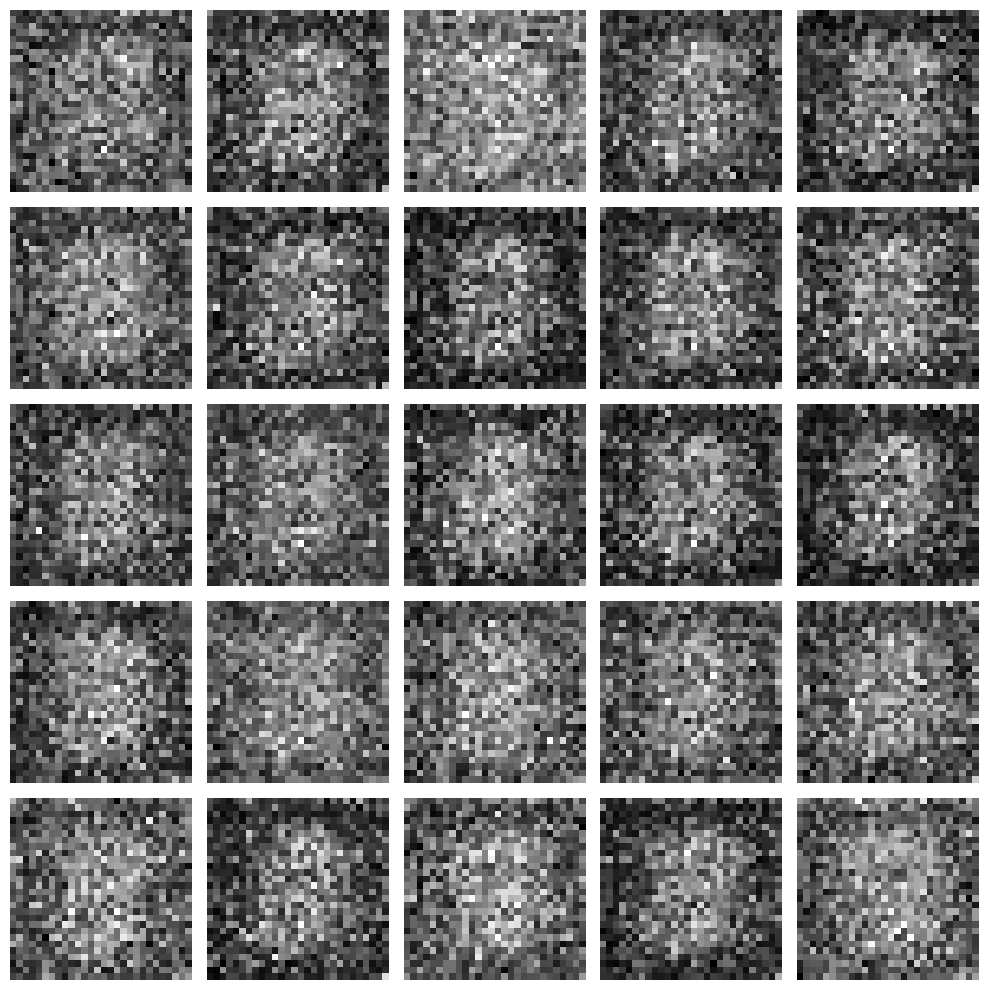

epoch: 1100, d_loss: 0.12207672744989395, g_loss: 2.1208643913269043
epoch: 1200, d_loss: 0.12292303144931793, g_loss: 2.114795446395874
epoch: 1300, d_loss: 0.12495240569114685, g_loss: 2.105503559112549
epoch: 1400, d_loss: 0.12711361050605774, g_loss: 2.0972611904144287
epoch: 1500, d_loss: 0.13035789132118225, g_loss: 2.0869455337524414
epoch: 1600, d_loss: 0.13511766493320465, g_loss: 2.0687296390533447
epoch: 1700, d_loss: 0.14001980423927307, g_loss: 2.053342819213867
epoch: 1800, d_loss: 0.14321690797805786, g_loss: 2.045684814453125
epoch: 1900, d_loss: 0.1448771208524704, g_loss: 2.043501853942871
epoch: 2000, d_loss: 0.14665010571479797, g_loss: 2.0412936210632324


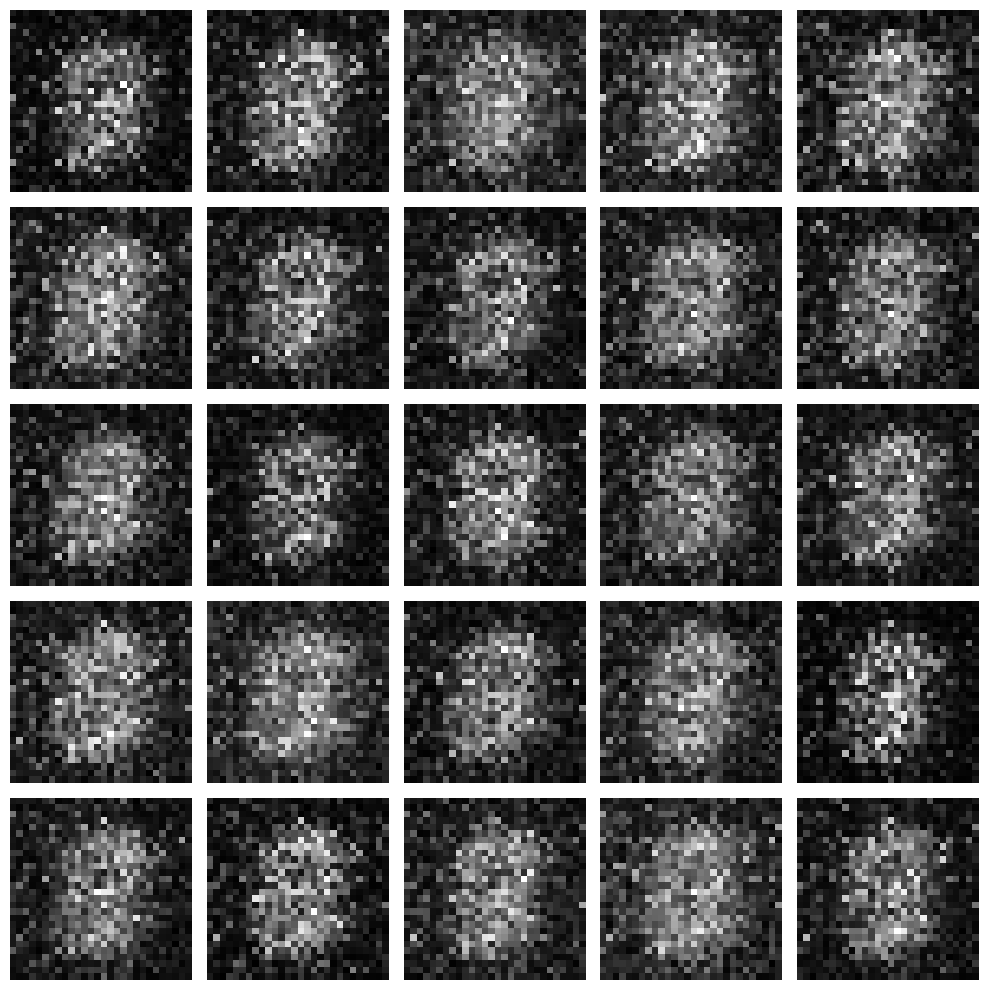

epoch: 2100, d_loss: 0.14850977063179016, g_loss: 2.0392074584960938
epoch: 2200, d_loss: 0.15155714750289917, g_loss: 2.03116512298584
epoch: 2300, d_loss: 0.15583007037639618, g_loss: 2.020159959793091
epoch: 2400, d_loss: 0.15986301004886627, g_loss: 2.0109992027282715
epoch: 2500, d_loss: 0.16480790078639984, g_loss: 2.000244379043579
epoch: 2600, d_loss: 0.16847582161426544, g_loss: 1.9934076070785522
epoch: 2700, d_loss: 0.17101600766181946, g_loss: 1.9900892972946167
epoch: 2800, d_loss: 0.17297258973121643, g_loss: 1.9880266189575195
epoch: 2900, d_loss: 0.17533159255981445, g_loss: 1.9839510917663574
epoch: 3000, d_loss: 0.17749151587486267, g_loss: 1.978814721107483


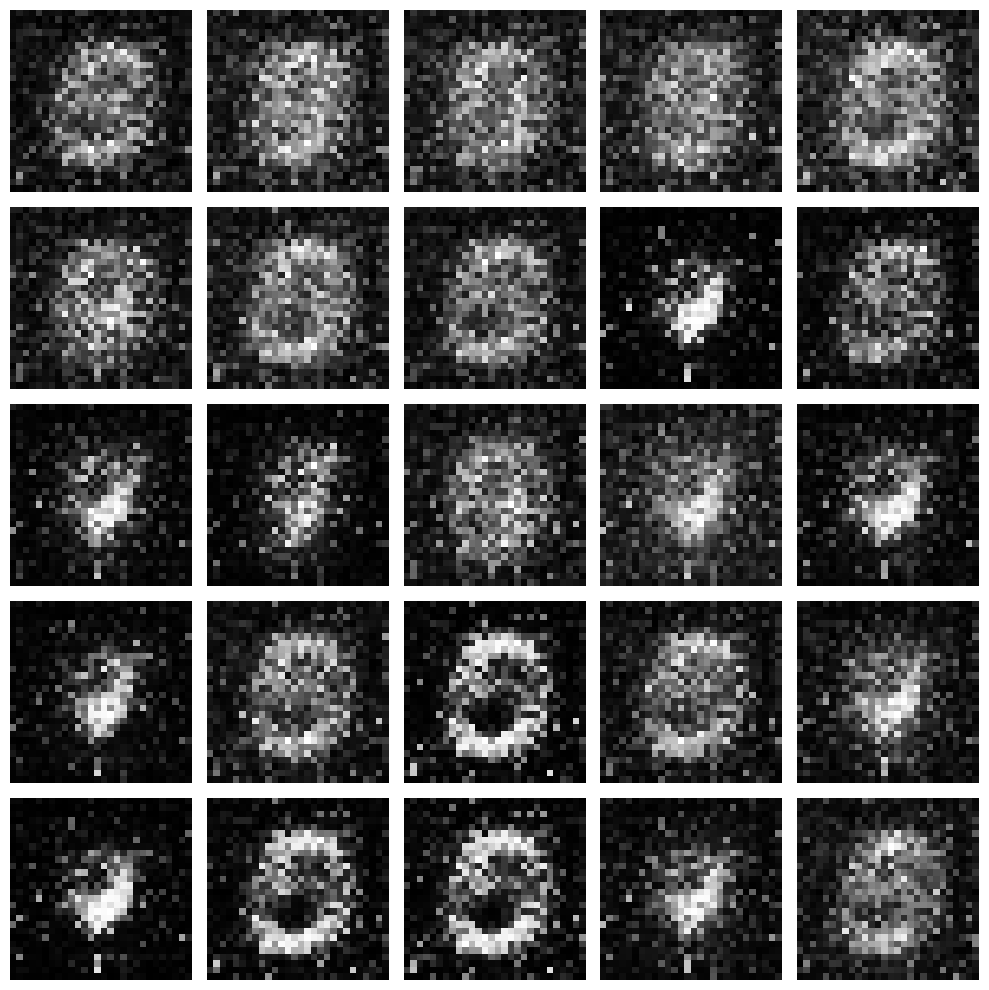

epoch: 3100, d_loss: 0.1805495023727417, g_loss: 1.9696688652038574
epoch: 3200, d_loss: 0.18325769901275635, g_loss: 1.9630885124206543
epoch: 3300, d_loss: 0.1868751347064972, g_loss: 1.952929973602295
epoch: 3400, d_loss: 0.19119173288345337, g_loss: 1.9426711797714233
epoch: 3500, d_loss: 0.19483503699302673, g_loss: 1.9348496198654175
epoch: 3600, d_loss: 0.2004760503768921, g_loss: 1.921188473701477
epoch: 3700, d_loss: 0.2041907161474228, g_loss: 1.9099408388137817
epoch: 3800, d_loss: 0.20794841647148132, g_loss: 1.9002622365951538
epoch: 3900, d_loss: 0.21028603613376617, g_loss: 1.8937498331069946
epoch: 4000, d_loss: 0.21122702956199646, g_loss: 1.8910208940505981


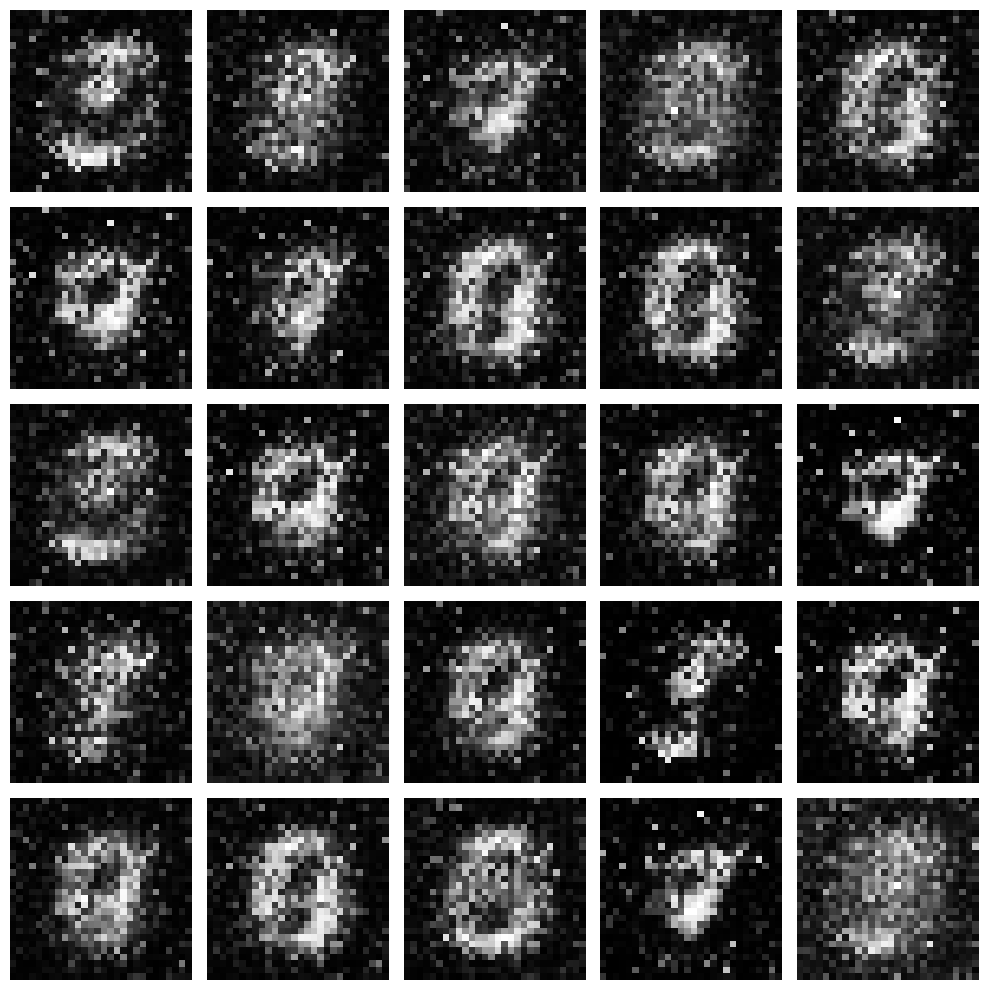

epoch: 4100, d_loss: 0.21175089478492737, g_loss: 1.8902573585510254
epoch: 4200, d_loss: 0.21239012479782104, g_loss: 1.8889305591583252
epoch: 4300, d_loss: 0.2132352888584137, g_loss: 1.8888676166534424
epoch: 4400, d_loss: 0.21404513716697693, g_loss: 1.8891078233718872
epoch: 4500, d_loss: 0.21479010581970215, g_loss: 1.8899118900299072
epoch: 4600, d_loss: 0.2157181203365326, g_loss: 1.891502022743225
epoch: 4700, d_loss: 0.2167932689189911, g_loss: 1.8905701637268066
epoch: 4800, d_loss: 0.21735046803951263, g_loss: 1.8911769390106201
epoch: 4900, d_loss: 0.21832428872585297, g_loss: 1.89114511013031
epoch: 5000, d_loss: 0.21902093291282654, g_loss: 1.8916957378387451


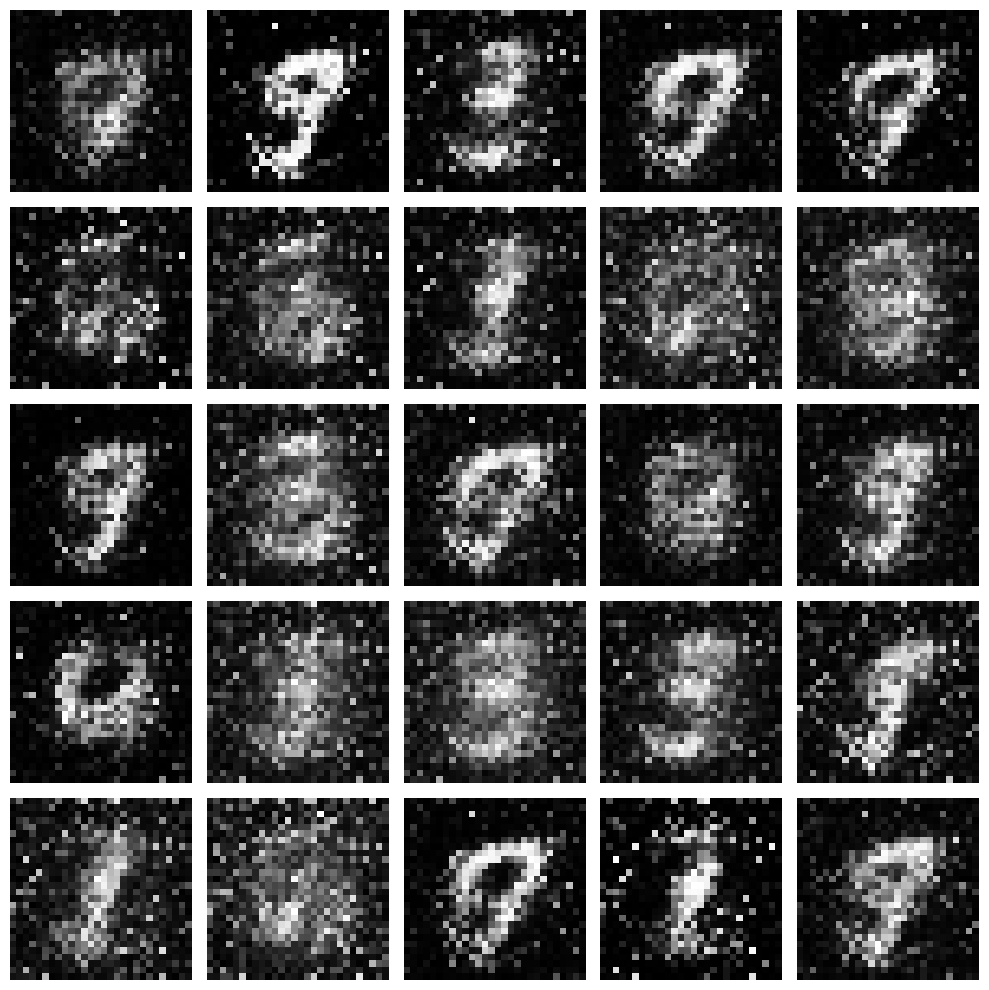

epoch: 5100, d_loss: 0.22029170393943787, g_loss: 1.8921698331832886
epoch: 5200, d_loss: 0.22122620046138763, g_loss: 1.893665075302124
epoch: 5300, d_loss: 0.2216758280992508, g_loss: 1.8959723711013794
epoch: 5400, d_loss: 0.22228318452835083, g_loss: 1.8966574668884277
epoch: 5500, d_loss: 0.22263503074645996, g_loss: 1.8985190391540527
epoch: 5600, d_loss: 0.22360637784004211, g_loss: 1.8974062204360962
epoch: 5700, d_loss: 0.22462281584739685, g_loss: 1.896990418434143
epoch: 5800, d_loss: 0.22560492157936096, g_loss: 1.8973277807235718
epoch: 5900, d_loss: 0.22734466195106506, g_loss: 1.895998239517212
epoch: 6000, d_loss: 0.2285873293876648, g_loss: 1.895971655845642


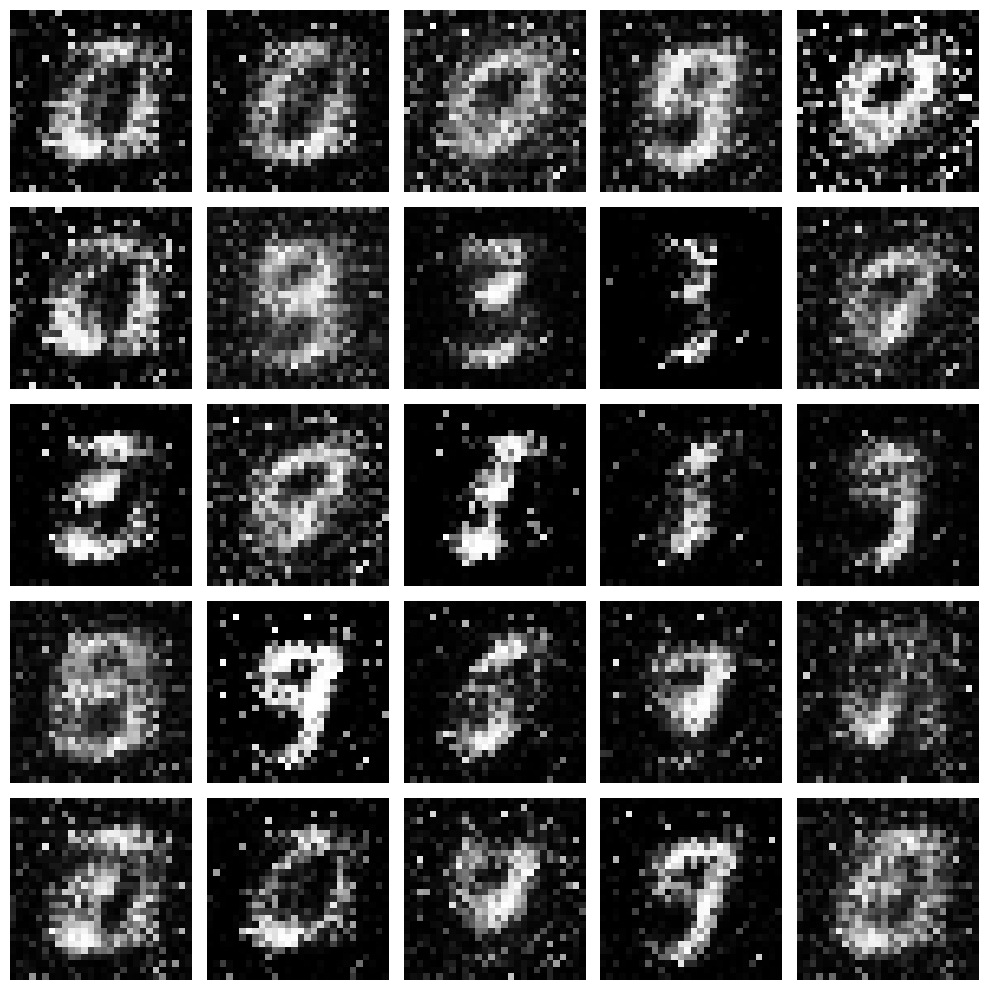

epoch: 6100, d_loss: 0.22946354746818542, g_loss: 1.897860050201416
epoch: 6200, d_loss: 0.2306612879037857, g_loss: 1.8975918292999268
epoch: 6300, d_loss: 0.2321145236492157, g_loss: 1.8980141878128052
epoch: 6400, d_loss: 0.23293961584568024, g_loss: 1.8999568223953247
epoch: 6500, d_loss: 0.2343446910381317, g_loss: 1.899721622467041
epoch: 6600, d_loss: 0.23543450236320496, g_loss: 1.8988875150680542
epoch: 6700, d_loss: 0.23586654663085938, g_loss: 1.8995318412780762
epoch: 6800, d_loss: 0.236678808927536, g_loss: 1.8996542692184448
epoch: 6900, d_loss: 0.23681345582008362, g_loss: 1.902443528175354
epoch: 7000, d_loss: 0.2372698187828064, g_loss: 1.9041552543640137


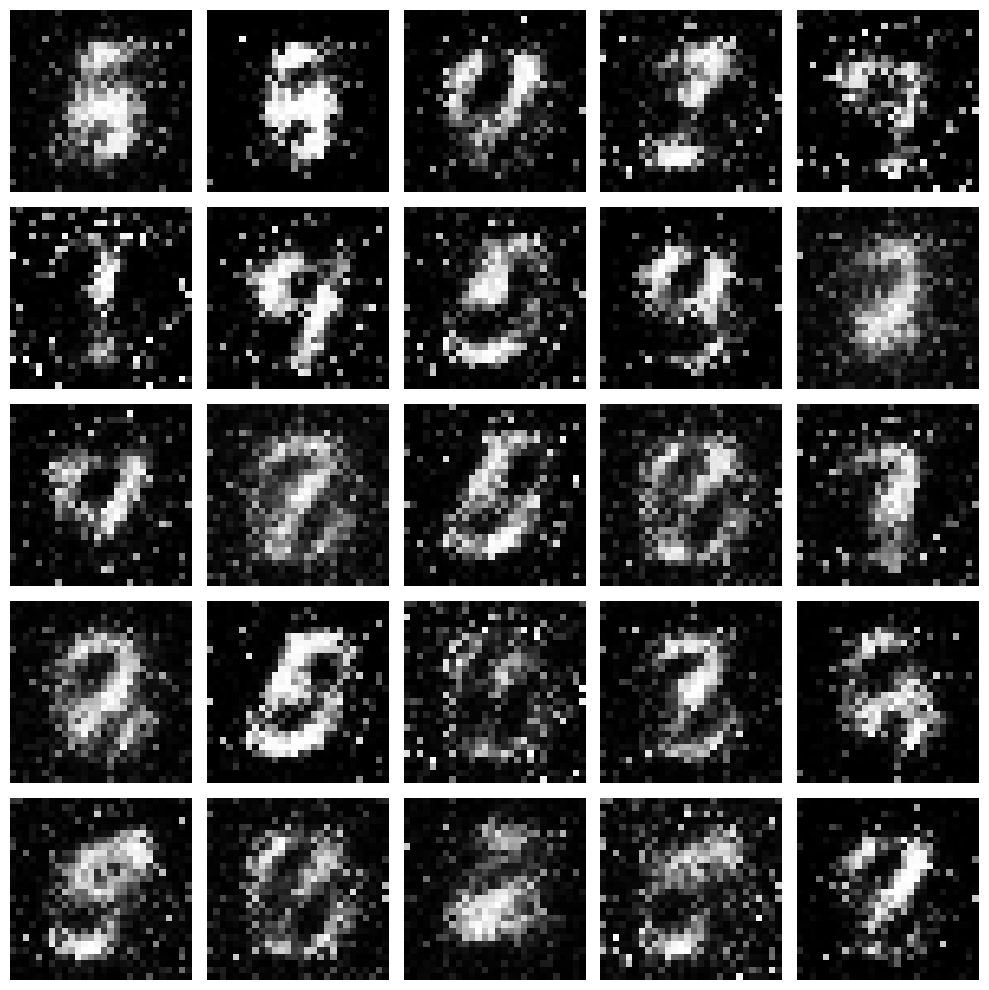

epoch: 7100, d_loss: 0.238149955868721, g_loss: 1.904191255569458
epoch: 7200, d_loss: 0.238894522190094, g_loss: 1.9045913219451904
epoch: 7300, d_loss: 0.23937439918518066, g_loss: 1.9055559635162354
epoch: 7400, d_loss: 0.2400415688753128, g_loss: 1.9069626331329346
epoch: 7500, d_loss: 0.24011753499507904, g_loss: 1.9094642400741577
epoch: 7600, d_loss: 0.24033810198307037, g_loss: 1.9118406772613525
epoch: 7700, d_loss: 0.24055041372776031, g_loss: 1.913806438446045
epoch: 7800, d_loss: 0.24069064855575562, g_loss: 1.9161436557769775
epoch: 7900, d_loss: 0.24079014360904694, g_loss: 1.918747067451477
epoch: 8000, d_loss: 0.24046242237091064, g_loss: 1.9229404926300049


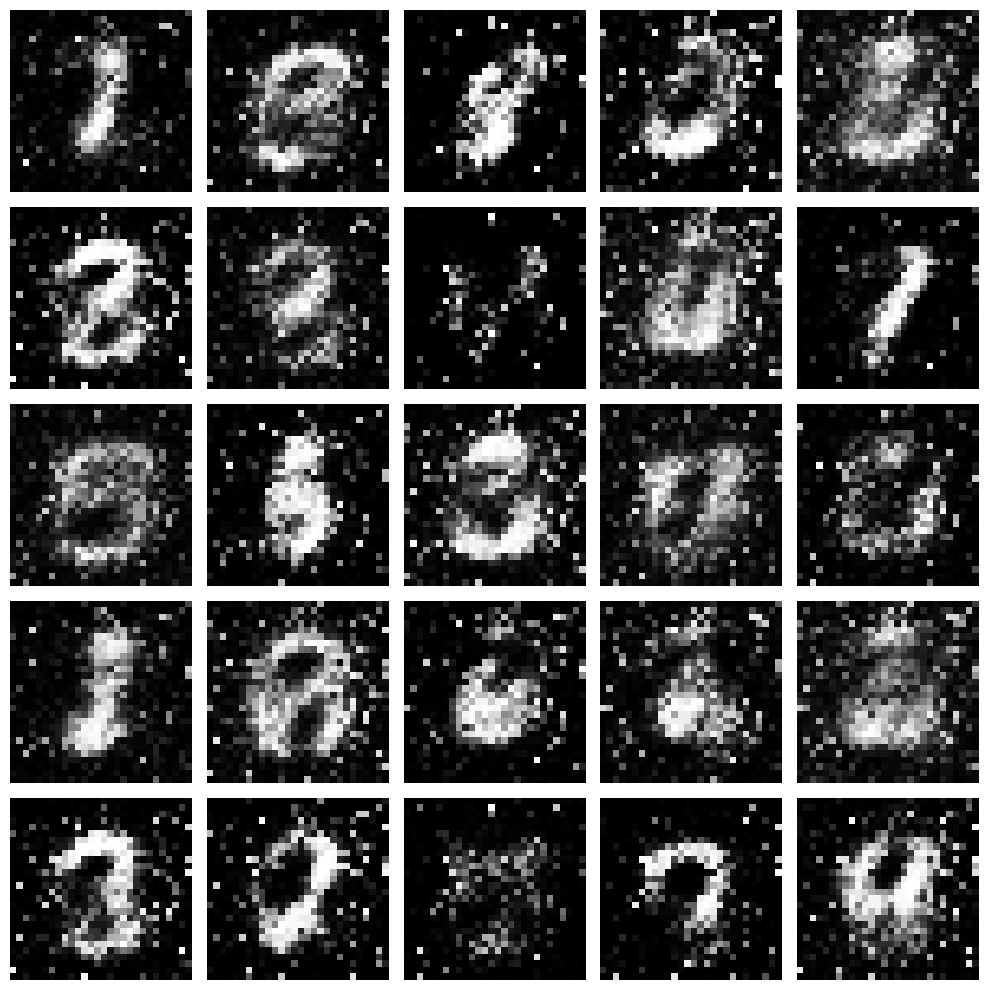

epoch: 8100, d_loss: 0.24037523567676544, g_loss: 1.9269813299179077
epoch: 8200, d_loss: 0.24029770493507385, g_loss: 1.931921362876892
epoch: 8300, d_loss: 0.24050390720367432, g_loss: 1.935997724533081
epoch: 8400, d_loss: 0.24041393399238586, g_loss: 1.9410407543182373
epoch: 8500, d_loss: 0.24116402864456177, g_loss: 1.942989706993103
epoch: 8600, d_loss: 0.2413884699344635, g_loss: 1.9457876682281494
epoch: 8700, d_loss: 0.24196764826774597, g_loss: 1.9466466903686523
epoch: 8800, d_loss: 0.24216467142105103, g_loss: 1.949556827545166
epoch: 8900, d_loss: 0.24247336387634277, g_loss: 1.951743721961975
epoch: 9000, d_loss: 0.2427884191274643, g_loss: 1.9531644582748413


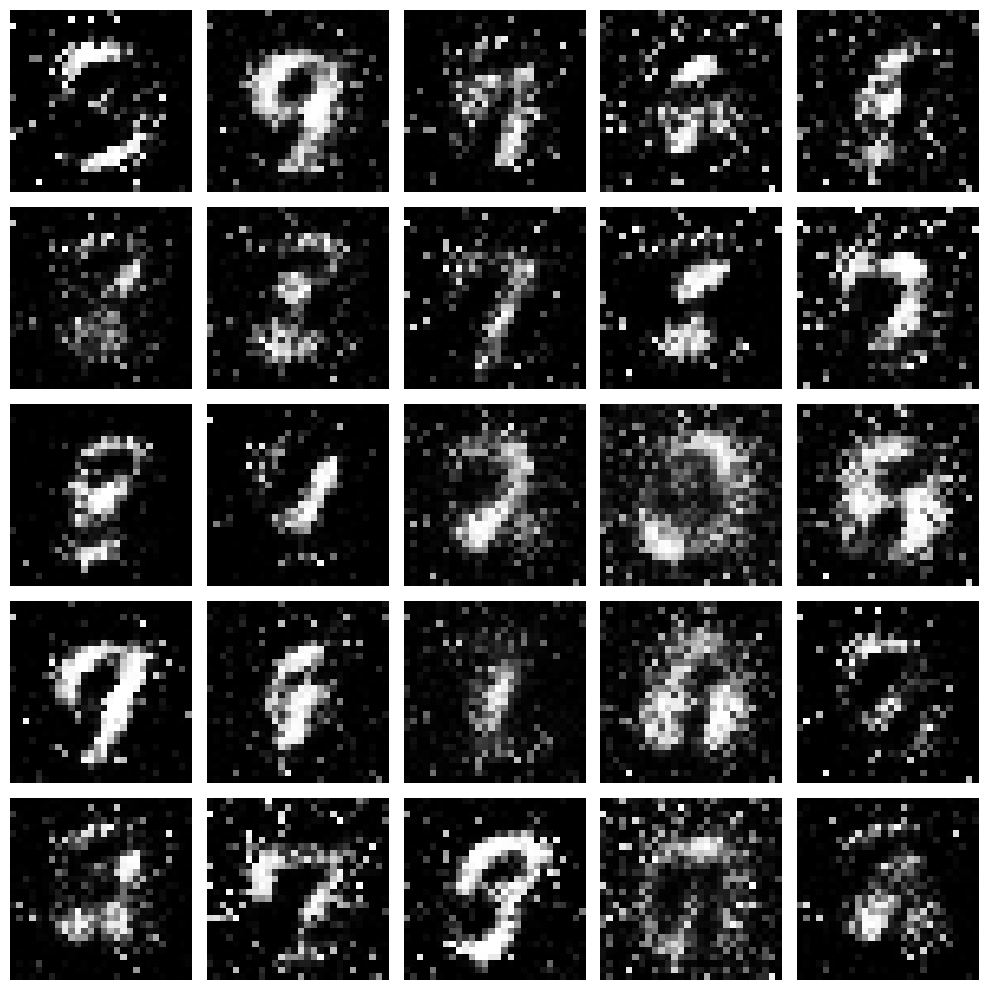

epoch: 9100, d_loss: 0.243046835064888, g_loss: 1.9546078443527222
epoch: 9200, d_loss: 0.24330520629882812, g_loss: 1.956252932548523
epoch: 9300, d_loss: 0.24364426732063293, g_loss: 1.957499623298645
epoch: 9400, d_loss: 0.24426090717315674, g_loss: 1.957993507385254
epoch: 9500, d_loss: 0.244369775056839, g_loss: 1.9601337909698486
epoch: 9600, d_loss: 0.24505412578582764, g_loss: 1.9605916738510132
epoch: 9700, d_loss: 0.24573639035224915, g_loss: 1.9609246253967285
epoch: 9800, d_loss: 0.24635593593120575, g_loss: 1.9617339372634888
epoch: 9900, d_loss: 0.2472328245639801, g_loss: 1.9618546962738037
epoch: 10000, d_loss: 0.2480076551437378, g_loss: 1.9627991914749146


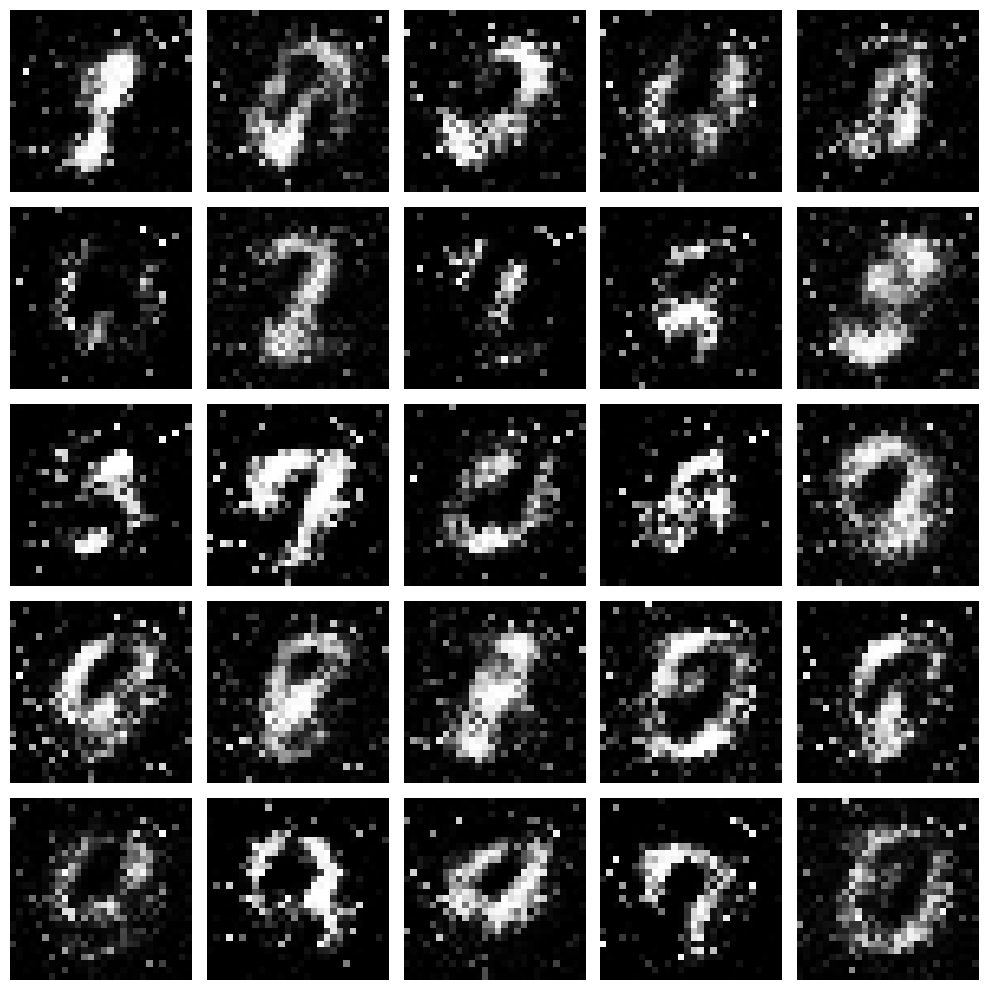

epoch: 10100, d_loss: 0.24891969561576843, g_loss: 1.9634947776794434
epoch: 10200, d_loss: 0.24990180134773254, g_loss: 1.9633467197418213
epoch: 10300, d_loss: 0.2507685422897339, g_loss: 1.9629734754562378
epoch: 10400, d_loss: 0.25137293338775635, g_loss: 1.962802529335022
epoch: 10500, d_loss: 0.25235509872436523, g_loss: 1.9619921445846558
epoch: 10600, d_loss: 0.253257691860199, g_loss: 1.9609932899475098
epoch: 10700, d_loss: 0.2540462017059326, g_loss: 1.95994234085083
epoch: 10800, d_loss: 0.25499463081359863, g_loss: 1.9585857391357422
epoch: 10900, d_loss: 0.25558826327323914, g_loss: 1.9582452774047852
epoch: 11000, d_loss: 0.2563328146934509, g_loss: 1.958065390586853


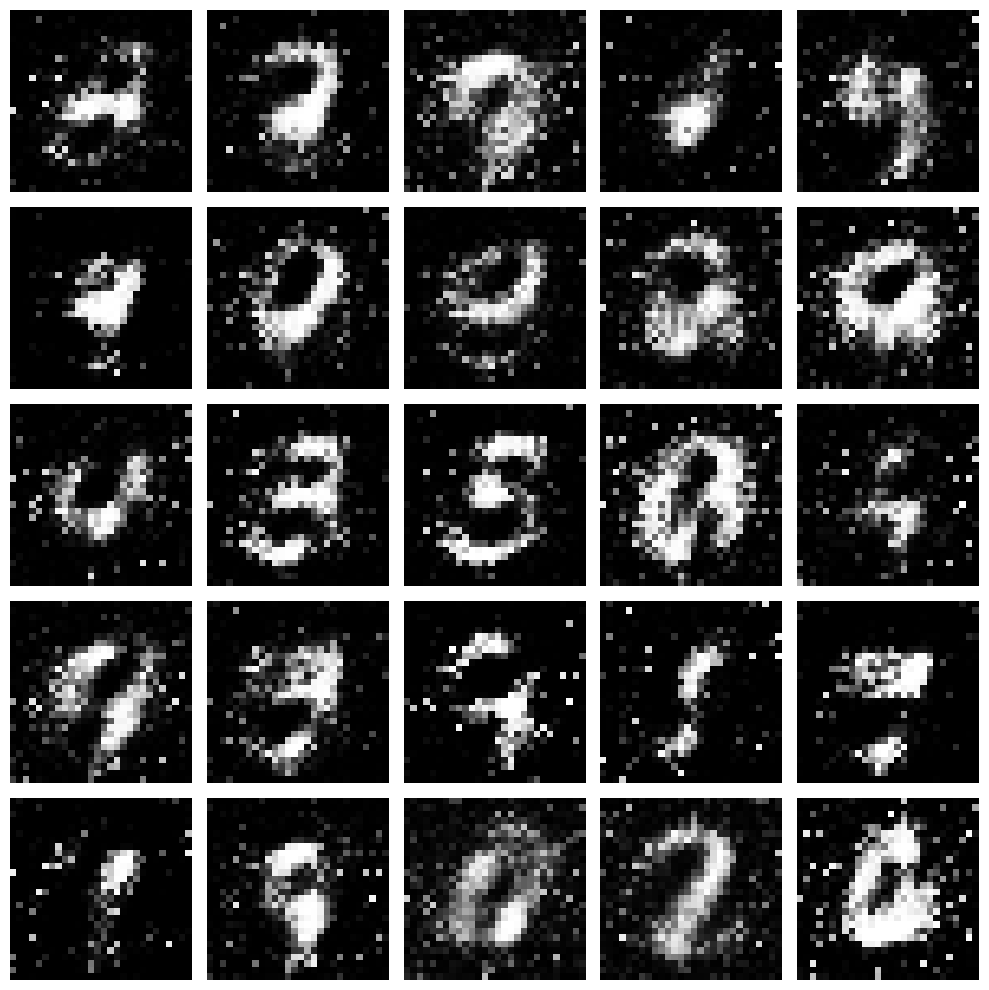

epoch: 11100, d_loss: 0.2571483254432678, g_loss: 1.9579057693481445
epoch: 11200, d_loss: 0.25761568546295166, g_loss: 1.9588518142700195
epoch: 11300, d_loss: 0.2581735849380493, g_loss: 1.9589581489562988
epoch: 11400, d_loss: 0.2588099241256714, g_loss: 1.9588384628295898
epoch: 11500, d_loss: 0.25934141874313354, g_loss: 1.9593065977096558
epoch: 11600, d_loss: 0.25990810990333557, g_loss: 1.9598538875579834
epoch: 11700, d_loss: 0.2602214813232422, g_loss: 1.9609440565109253
epoch: 11800, d_loss: 0.26065289974212646, g_loss: 1.9620360136032104
epoch: 11900, d_loss: 0.2606784403324127, g_loss: 1.9649336338043213
epoch: 12000, d_loss: 0.26071202754974365, g_loss: 1.9673320055007935


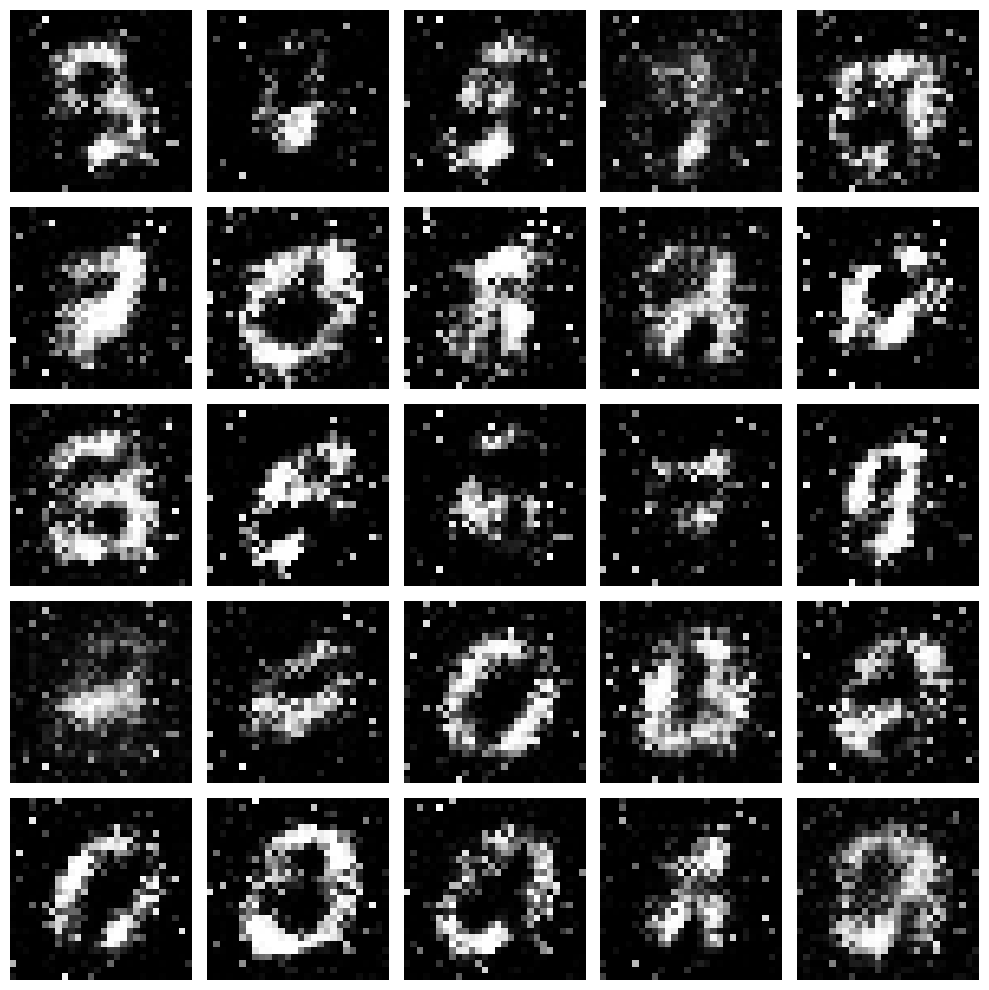

epoch: 12100, d_loss: 0.2611433267593384, g_loss: 1.9685877561569214
epoch: 12200, d_loss: 0.2610812485218048, g_loss: 1.971407175064087
epoch: 12300, d_loss: 0.2610870897769928, g_loss: 1.9739595651626587
epoch: 12400, d_loss: 0.2611183226108551, g_loss: 1.9765393733978271
epoch: 12500, d_loss: 0.26126834750175476, g_loss: 1.9785540103912354
epoch: 12600, d_loss: 0.2612783908843994, g_loss: 1.9813477993011475
epoch: 12700, d_loss: 0.2613753378391266, g_loss: 1.9834582805633545
epoch: 12800, d_loss: 0.26169729232788086, g_loss: 1.984856367111206
epoch: 12900, d_loss: 0.26214784383773804, g_loss: 1.985878348350525
epoch: 13000, d_loss: 0.2624915838241577, g_loss: 1.987520456314087


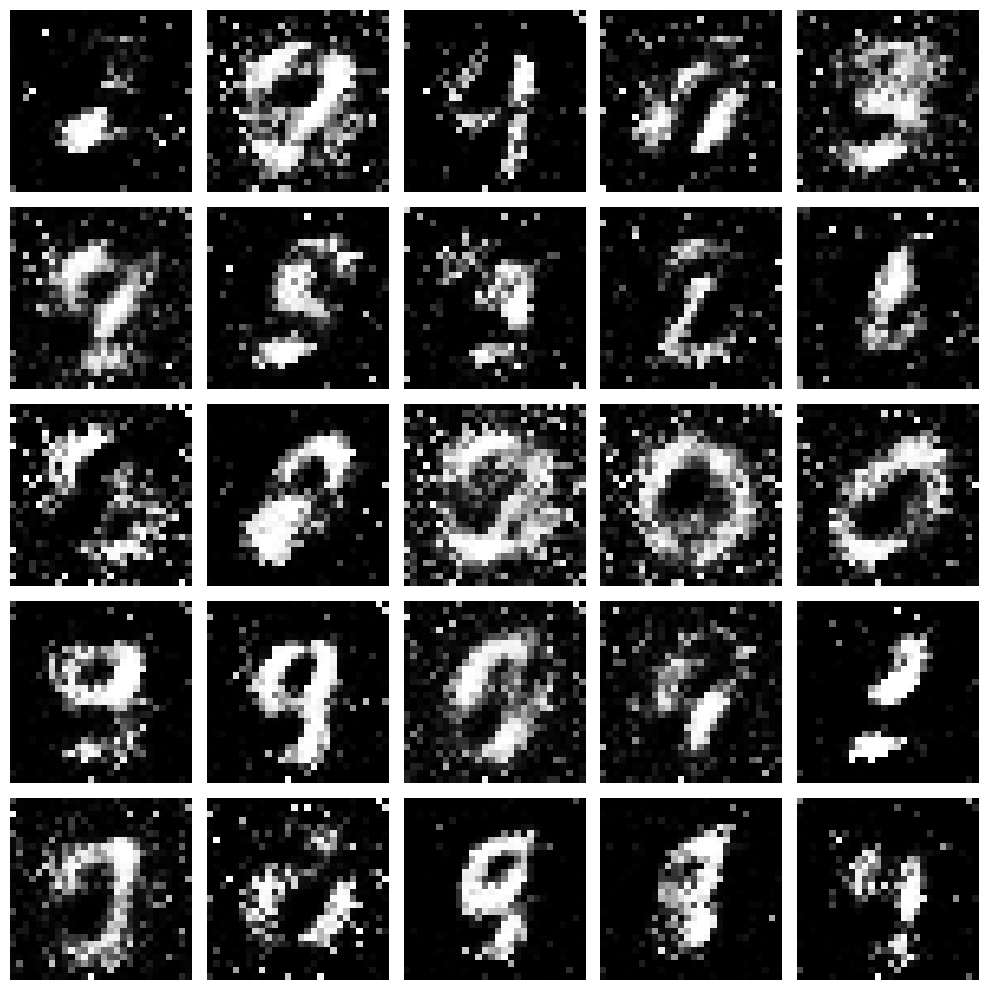

epoch: 13100, d_loss: 0.2630617618560791, g_loss: 1.9885411262512207
epoch: 13200, d_loss: 0.2634895443916321, g_loss: 1.9892191886901855
epoch: 13300, d_loss: 0.2636972665786743, g_loss: 1.9901084899902344
epoch: 13400, d_loss: 0.2641350030899048, g_loss: 1.9908138513565063
epoch: 13500, d_loss: 0.2645202577114105, g_loss: 1.9918413162231445
epoch: 13600, d_loss: 0.26499122381210327, g_loss: 1.9925897121429443
epoch: 13700, d_loss: 0.2652881145477295, g_loss: 1.993909239768982
epoch: 13800, d_loss: 0.2660099267959595, g_loss: 1.9948986768722534
epoch: 13900, d_loss: 0.2664753794670105, g_loss: 1.9959343671798706
epoch: 14000, d_loss: 0.2668916583061218, g_loss: 1.9968304634094238


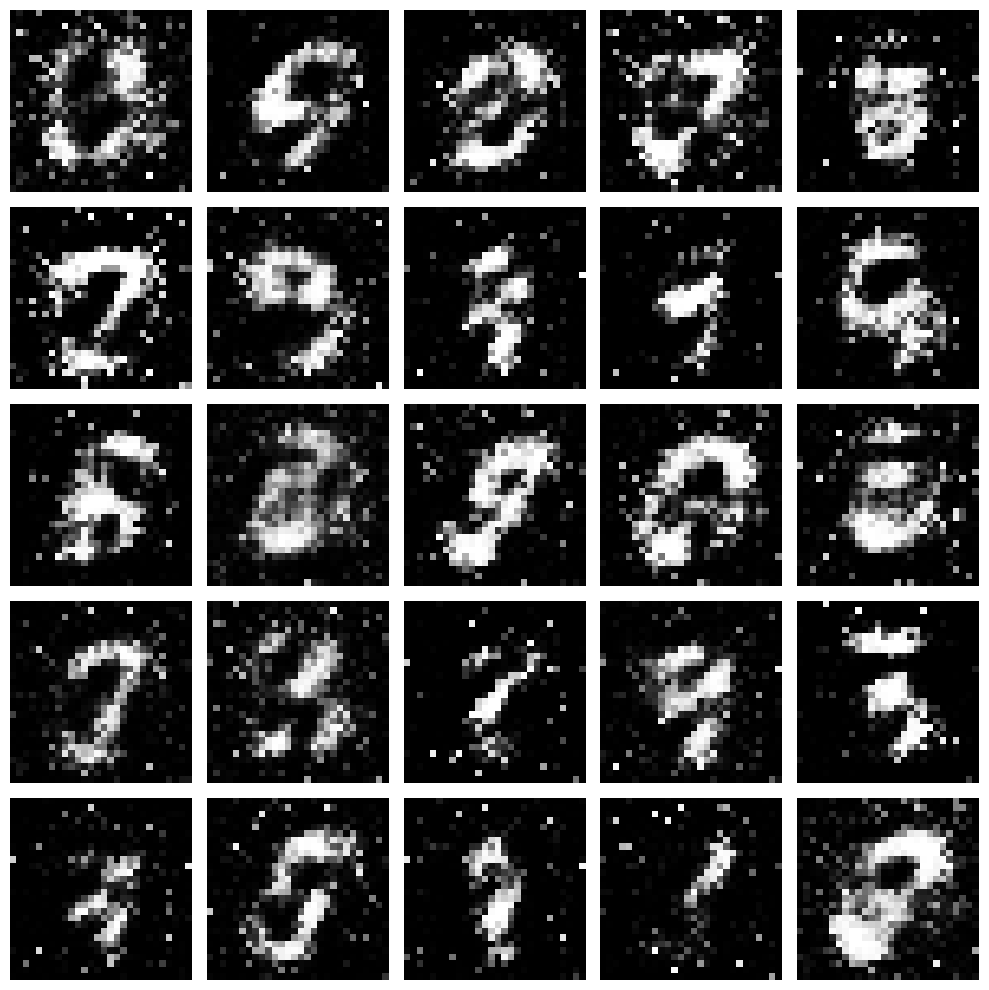

epoch: 14100, d_loss: 0.2674008011817932, g_loss: 1.9979753494262695
epoch: 14200, d_loss: 0.2681281566619873, g_loss: 1.9985475540161133
epoch: 14300, d_loss: 0.2687162458896637, g_loss: 1.998981237411499
epoch: 14400, d_loss: 0.26934337615966797, g_loss: 1.9994386434555054
epoch: 14500, d_loss: 0.2698790729045868, g_loss: 1.9996464252471924
epoch: 14600, d_loss: 0.27062559127807617, g_loss: 1.9996623992919922
epoch: 14700, d_loss: 0.271463006734848, g_loss: 1.9991955757141113
epoch: 14800, d_loss: 0.2720634937286377, g_loss: 1.9991921186447144
epoch: 14900, d_loss: 0.27285510301589966, g_loss: 1.9985185861587524
epoch: 15000, d_loss: 0.27362060546875, g_loss: 1.9975765943527222


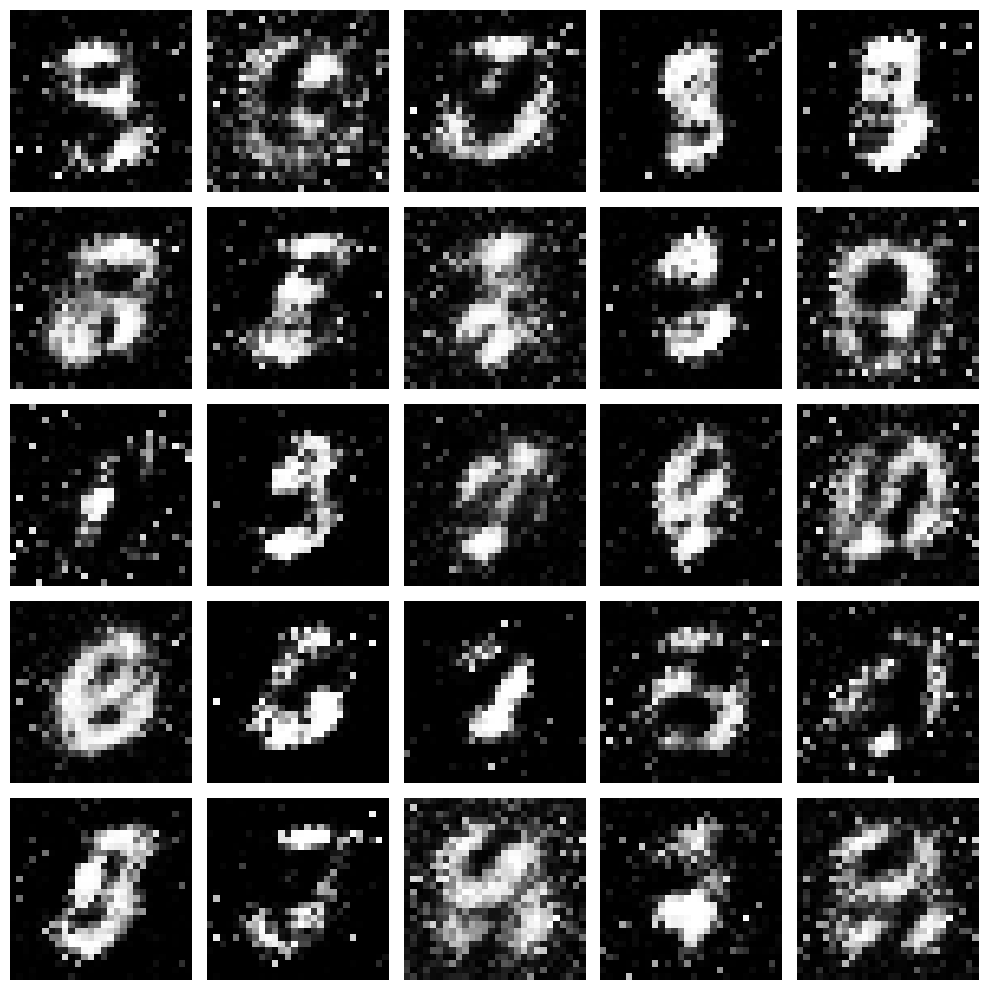

epoch: 15100, d_loss: 0.2745909094810486, g_loss: 1.9962857961654663
epoch: 15200, d_loss: 0.2752729058265686, g_loss: 1.9959156513214111
epoch: 15300, d_loss: 0.2758474349975586, g_loss: 1.9955296516418457
epoch: 15400, d_loss: 0.2763603925704956, g_loss: 1.9950339794158936
epoch: 15500, d_loss: 0.2769191265106201, g_loss: 1.99447762966156
epoch: 15600, d_loss: 0.27776622772216797, g_loss: 1.9934353828430176
epoch: 15700, d_loss: 0.27840620279312134, g_loss: 1.9927635192871094
epoch: 15800, d_loss: 0.279130756855011, g_loss: 1.9920521974563599
epoch: 15900, d_loss: 0.2795848846435547, g_loss: 1.9920393228530884
epoch: 16000, d_loss: 0.2803981900215149, g_loss: 1.9917469024658203


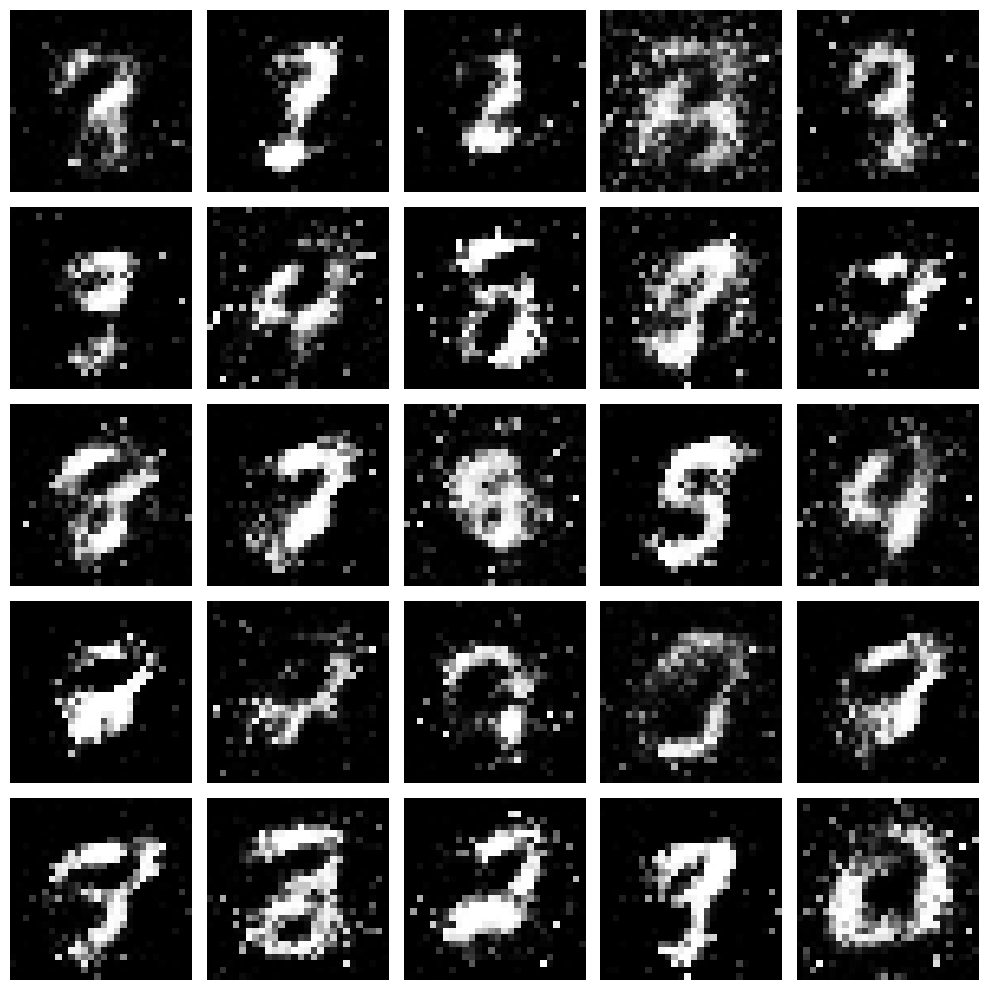

epoch: 16100, d_loss: 0.2814301550388336, g_loss: 1.9907495975494385
epoch: 16200, d_loss: 0.2822224497795105, g_loss: 1.9903100728988647
epoch: 16300, d_loss: 0.2832787334918976, g_loss: 1.9889951944351196
epoch: 16400, d_loss: 0.2841429114341736, g_loss: 1.9885594844818115
epoch: 16500, d_loss: 0.2852144241333008, g_loss: 1.9876540899276733
epoch: 16600, d_loss: 0.28592532873153687, g_loss: 1.9871389865875244
epoch: 16700, d_loss: 0.28704431653022766, g_loss: 1.985618233680725
epoch: 16800, d_loss: 0.28790515661239624, g_loss: 1.9848190546035767
epoch: 16900, d_loss: 0.2887605130672455, g_loss: 1.9839693307876587
epoch: 17000, d_loss: 0.28933754563331604, g_loss: 1.9839107990264893


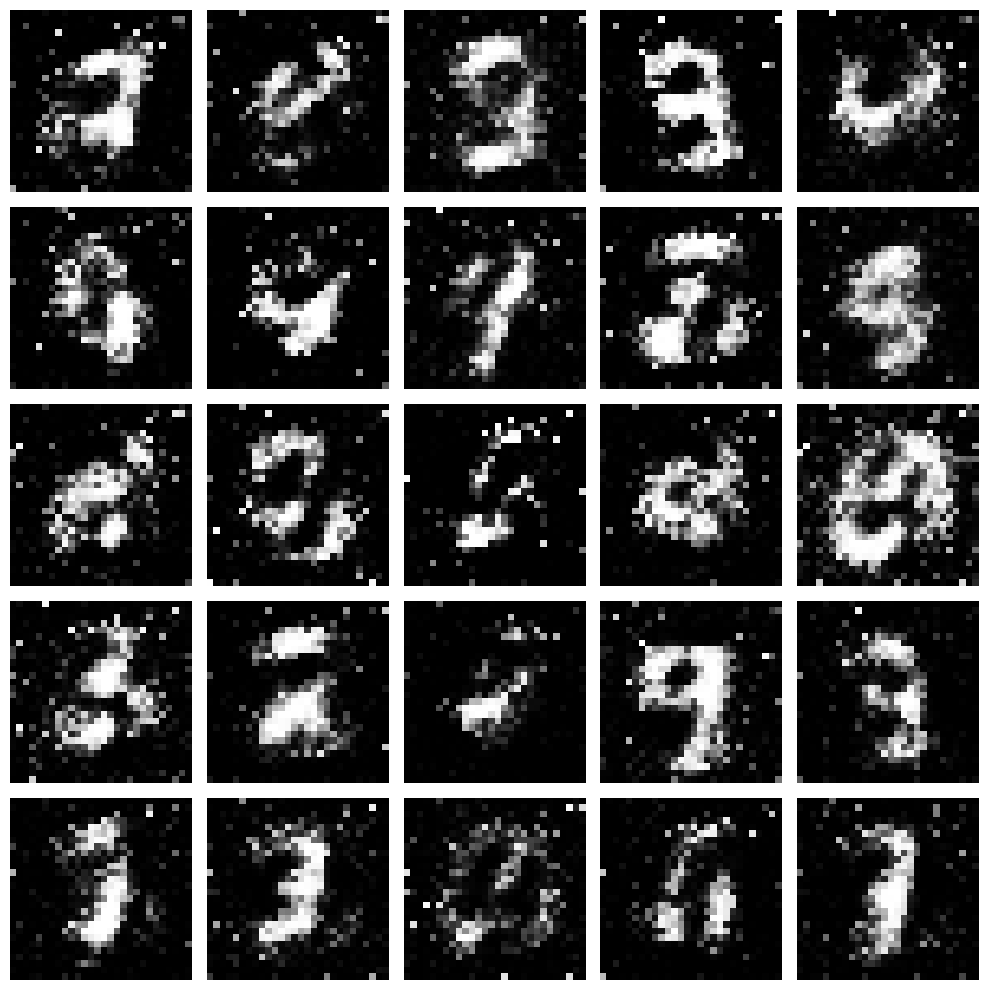

epoch: 17100, d_loss: 0.28994202613830566, g_loss: 1.9835894107818604
epoch: 17200, d_loss: 0.2906508445739746, g_loss: 1.9826773405075073
epoch: 17300, d_loss: 0.2911076843738556, g_loss: 1.9822410345077515
epoch: 17400, d_loss: 0.2916509509086609, g_loss: 1.9817999601364136
epoch: 17500, d_loss: 0.2923452854156494, g_loss: 1.9811710119247437
epoch: 17600, d_loss: 0.29293254017829895, g_loss: 1.9805771112442017
epoch: 17700, d_loss: 0.2935517430305481, g_loss: 1.9801504611968994
epoch: 17800, d_loss: 0.2941128611564636, g_loss: 1.979777455329895
epoch: 17900, d_loss: 0.29472655057907104, g_loss: 1.9791038036346436
epoch: 18000, d_loss: 0.29522377252578735, g_loss: 1.9787790775299072


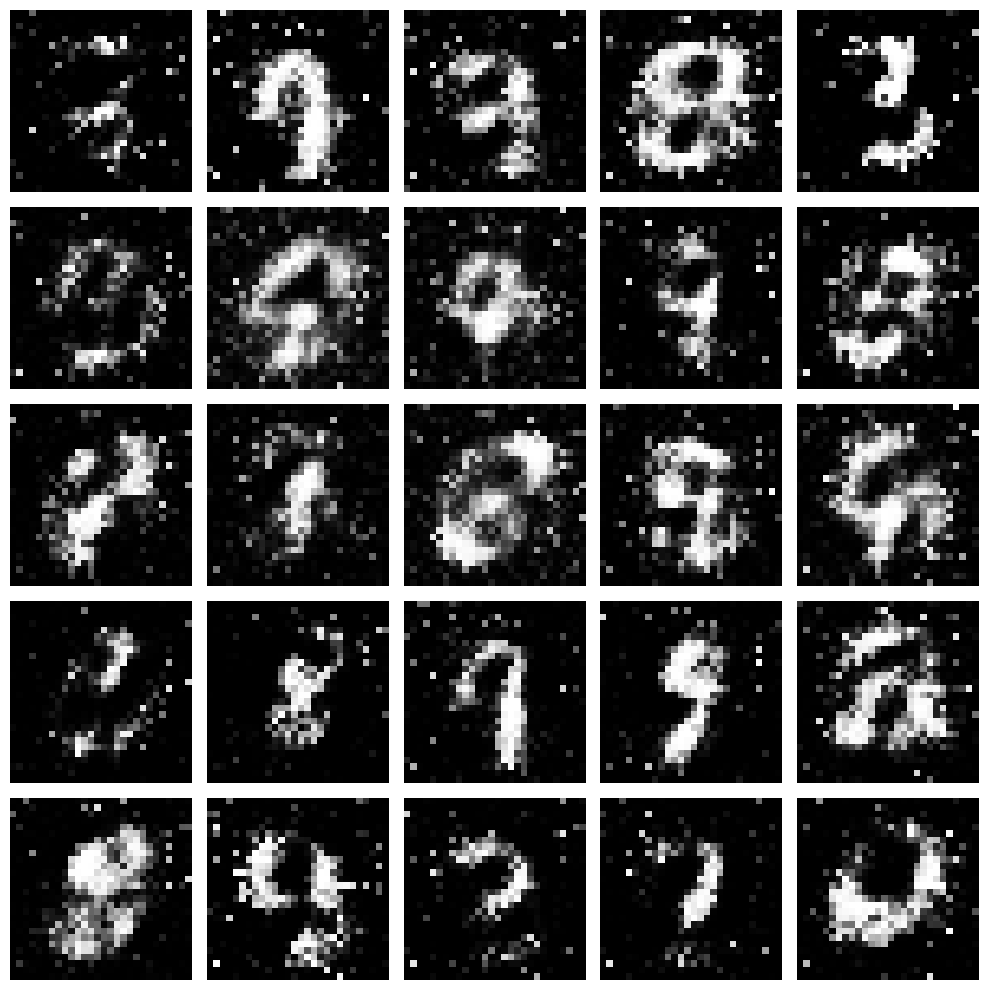

epoch: 18100, d_loss: 0.2959709167480469, g_loss: 1.9777913093566895
epoch: 18200, d_loss: 0.29642510414123535, g_loss: 1.977518916130066
epoch: 18300, d_loss: 0.29711124300956726, g_loss: 1.9768778085708618
epoch: 18400, d_loss: 0.2976764440536499, g_loss: 1.9763871431350708
epoch: 18500, d_loss: 0.29841893911361694, g_loss: 1.9753704071044922
epoch: 18600, d_loss: 0.29909196496009827, g_loss: 1.9744921922683716
epoch: 18700, d_loss: 0.2997931241989136, g_loss: 1.9735978841781616
epoch: 18800, d_loss: 0.30025434494018555, g_loss: 1.9734231233596802
epoch: 18900, d_loss: 0.3008654713630676, g_loss: 1.9726275205612183
epoch: 19000, d_loss: 0.30134427547454834, g_loss: 1.9721282720565796


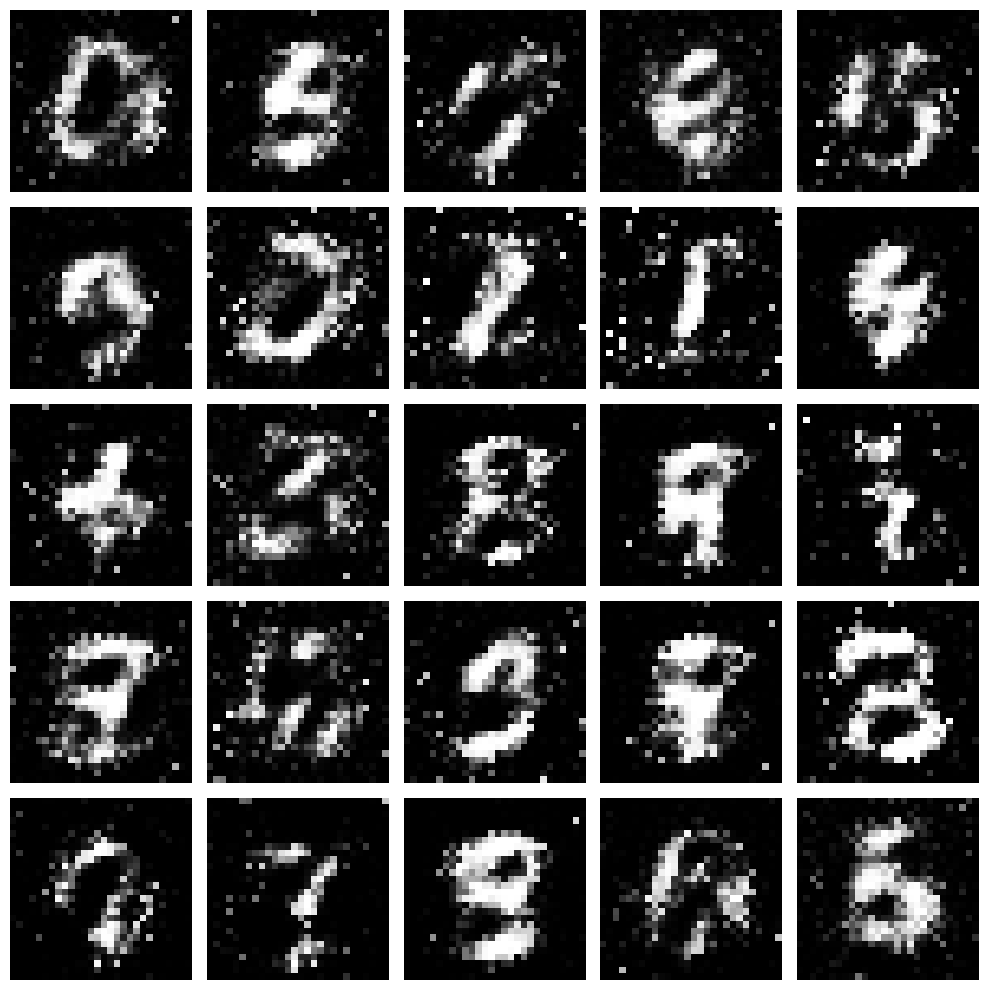

epoch: 19100, d_loss: 0.3021010756492615, g_loss: 1.9708665609359741
epoch: 19200, d_loss: 0.3027561902999878, g_loss: 1.9699453115463257
epoch: 19300, d_loss: 0.30366742610931396, g_loss: 1.9686206579208374
epoch: 19400, d_loss: 0.3043747544288635, g_loss: 1.9677760601043701
epoch: 19500, d_loss: 0.30494049191474915, g_loss: 1.967082142829895
epoch: 19600, d_loss: 0.305591344833374, g_loss: 1.9662147760391235
epoch: 19700, d_loss: 0.3060421347618103, g_loss: 1.9655201435089111
epoch: 19800, d_loss: 0.306587278842926, g_loss: 1.9647796154022217
epoch: 19900, d_loss: 0.30715224146842957, g_loss: 1.9640405178070068
epoch: 20000, d_loss: 0.3076372742652893, g_loss: 1.9634062051773071


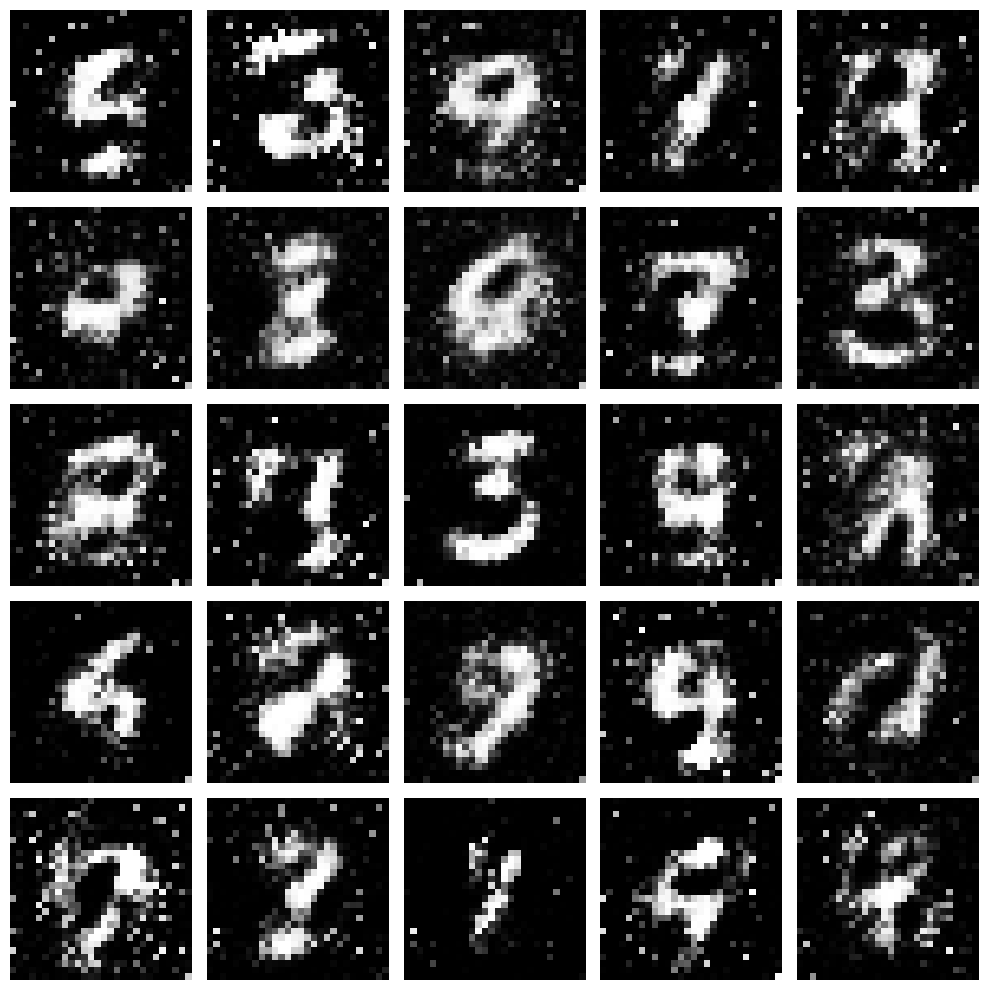

epoch: 20100, d_loss: 0.3082422614097595, g_loss: 1.9623894691467285
epoch: 20200, d_loss: 0.3087686002254486, g_loss: 1.9614953994750977
epoch: 20300, d_loss: 0.3093101382255554, g_loss: 1.9606242179870605
epoch: 20400, d_loss: 0.30988866090774536, g_loss: 1.9594826698303223
epoch: 20500, d_loss: 0.3104417026042938, g_loss: 1.9586083889007568
epoch: 20600, d_loss: 0.31095218658447266, g_loss: 1.95785653591156
epoch: 20700, d_loss: 0.31164807081222534, g_loss: 1.9568202495574951
epoch: 20800, d_loss: 0.3122280240058899, g_loss: 1.9560860395431519
epoch: 20900, d_loss: 0.31287893652915955, g_loss: 1.95510733127594
epoch: 21000, d_loss: 0.3133193850517273, g_loss: 1.9546971321105957


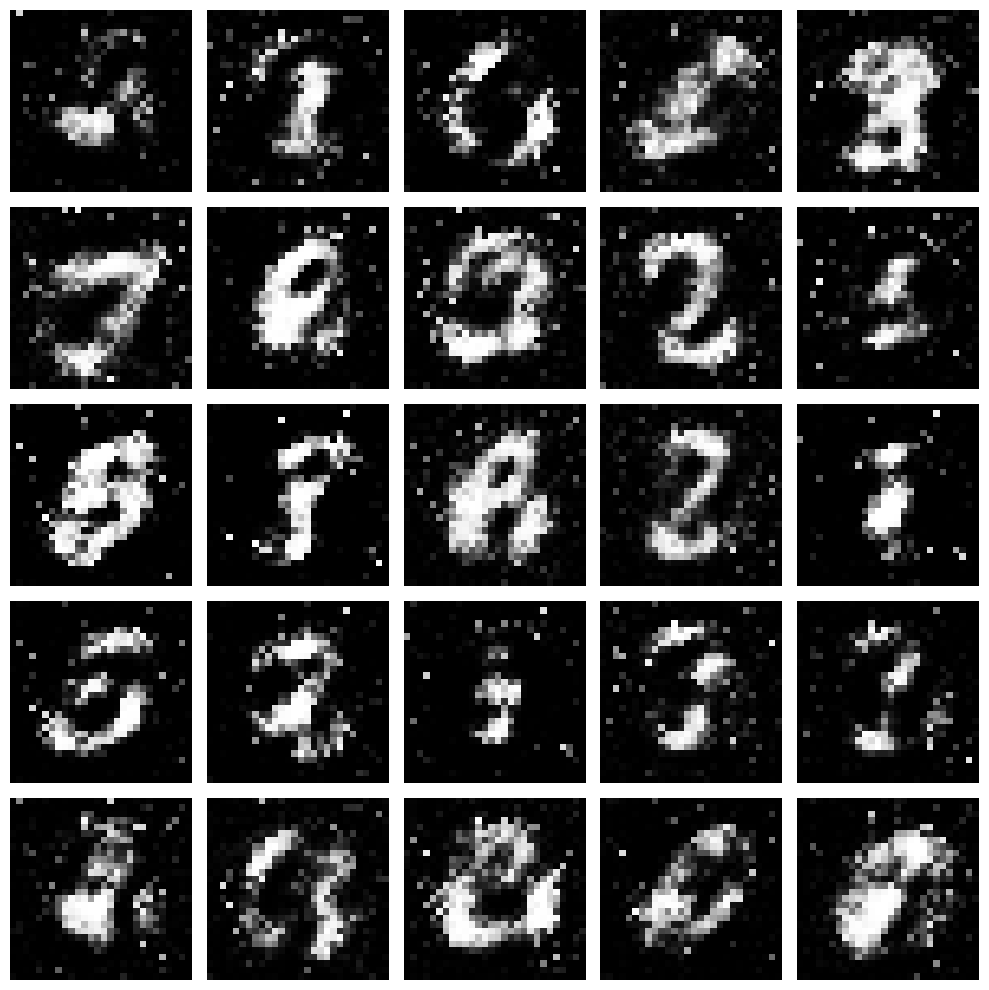

epoch: 21100, d_loss: 0.31386005878448486, g_loss: 1.954102635383606
epoch: 21200, d_loss: 0.3146575689315796, g_loss: 1.9527995586395264
epoch: 21300, d_loss: 0.3151240944862366, g_loss: 1.9521501064300537
epoch: 21400, d_loss: 0.3157727122306824, g_loss: 1.951230525970459
epoch: 21500, d_loss: 0.3164129853248596, g_loss: 1.9501543045043945
epoch: 21600, d_loss: 0.31711825728416443, g_loss: 1.9490805864334106
epoch: 21700, d_loss: 0.31787142157554626, g_loss: 1.9480135440826416
epoch: 21800, d_loss: 0.31845295429229736, g_loss: 1.9472899436950684
epoch: 21900, d_loss: 0.3191719651222229, g_loss: 1.946146011352539
epoch: 22000, d_loss: 0.31990936398506165, g_loss: 1.9448918104171753


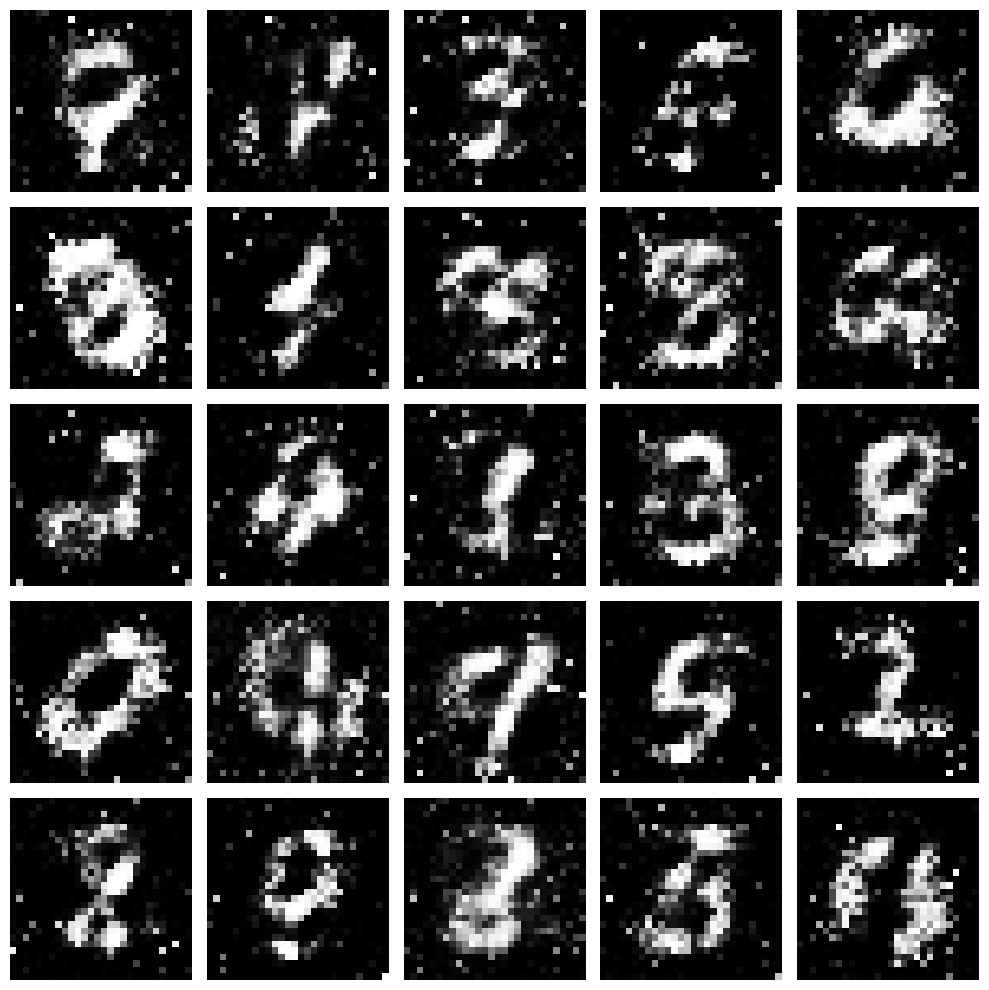

epoch: 22100, d_loss: 0.3205936551094055, g_loss: 1.9437397718429565
epoch: 22200, d_loss: 0.3212236166000366, g_loss: 1.9428374767303467
epoch: 22300, d_loss: 0.32195472717285156, g_loss: 1.9415050745010376
epoch: 22400, d_loss: 0.3225935101509094, g_loss: 1.940565824508667
epoch: 22500, d_loss: 0.3233387768268585, g_loss: 1.939375400543213
epoch: 22600, d_loss: 0.3241020441055298, g_loss: 1.9381260871887207
epoch: 22700, d_loss: 0.3248850107192993, g_loss: 1.9368342161178589
epoch: 22800, d_loss: 0.3254539370536804, g_loss: 1.935754656791687
epoch: 22900, d_loss: 0.3259718418121338, g_loss: 1.9349602460861206
epoch: 23000, d_loss: 0.3266729414463043, g_loss: 1.9339821338653564


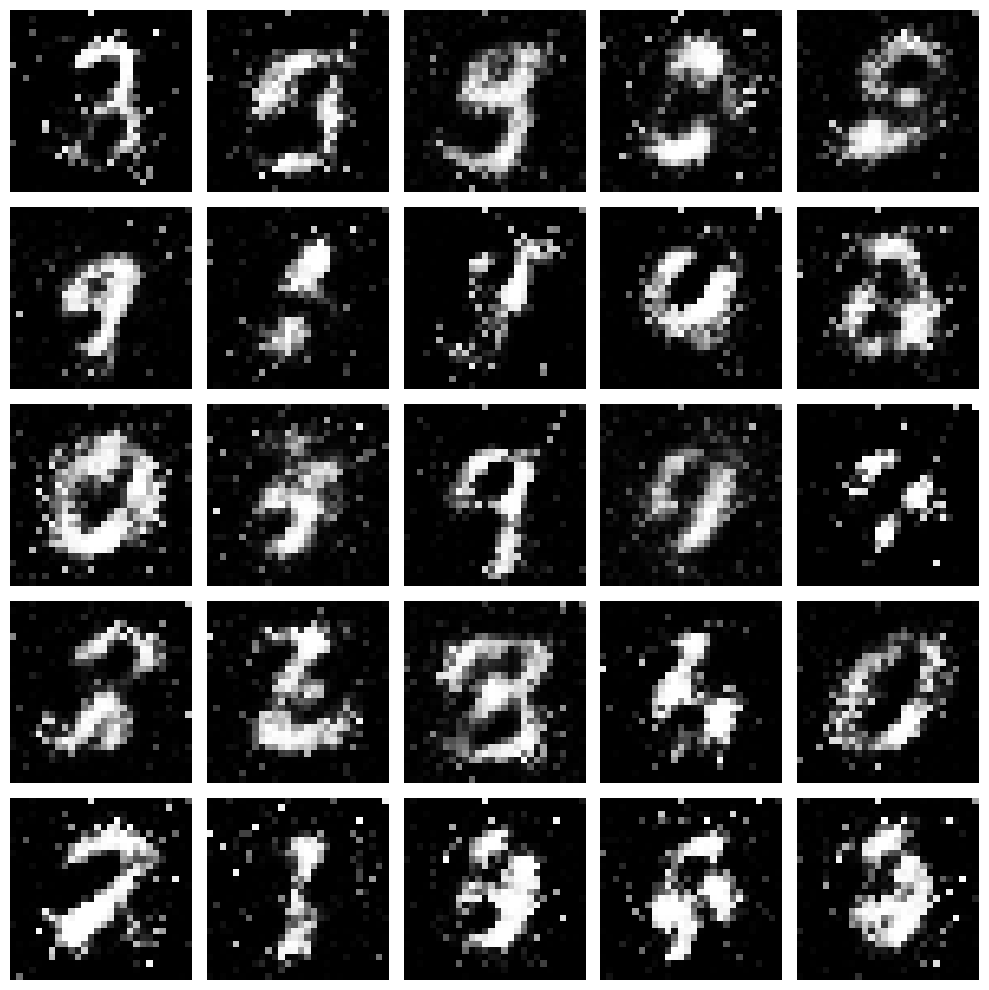

epoch: 23100, d_loss: 0.3273979425430298, g_loss: 1.932822823524475
epoch: 23200, d_loss: 0.32790011167526245, g_loss: 1.9319069385528564
epoch: 23300, d_loss: 0.3283849060535431, g_loss: 1.931175947189331
epoch: 23400, d_loss: 0.32903724908828735, g_loss: 1.9302736520767212
epoch: 23500, d_loss: 0.3297651410102844, g_loss: 1.929139494895935
epoch: 23600, d_loss: 0.3304915130138397, g_loss: 1.9279274940490723
epoch: 23700, d_loss: 0.3312843441963196, g_loss: 1.926681637763977
epoch: 23800, d_loss: 0.33203113079071045, g_loss: 1.925573468208313
epoch: 23900, d_loss: 0.3326987028121948, g_loss: 1.9244308471679688
epoch: 24000, d_loss: 0.3332175016403198, g_loss: 1.9237641096115112


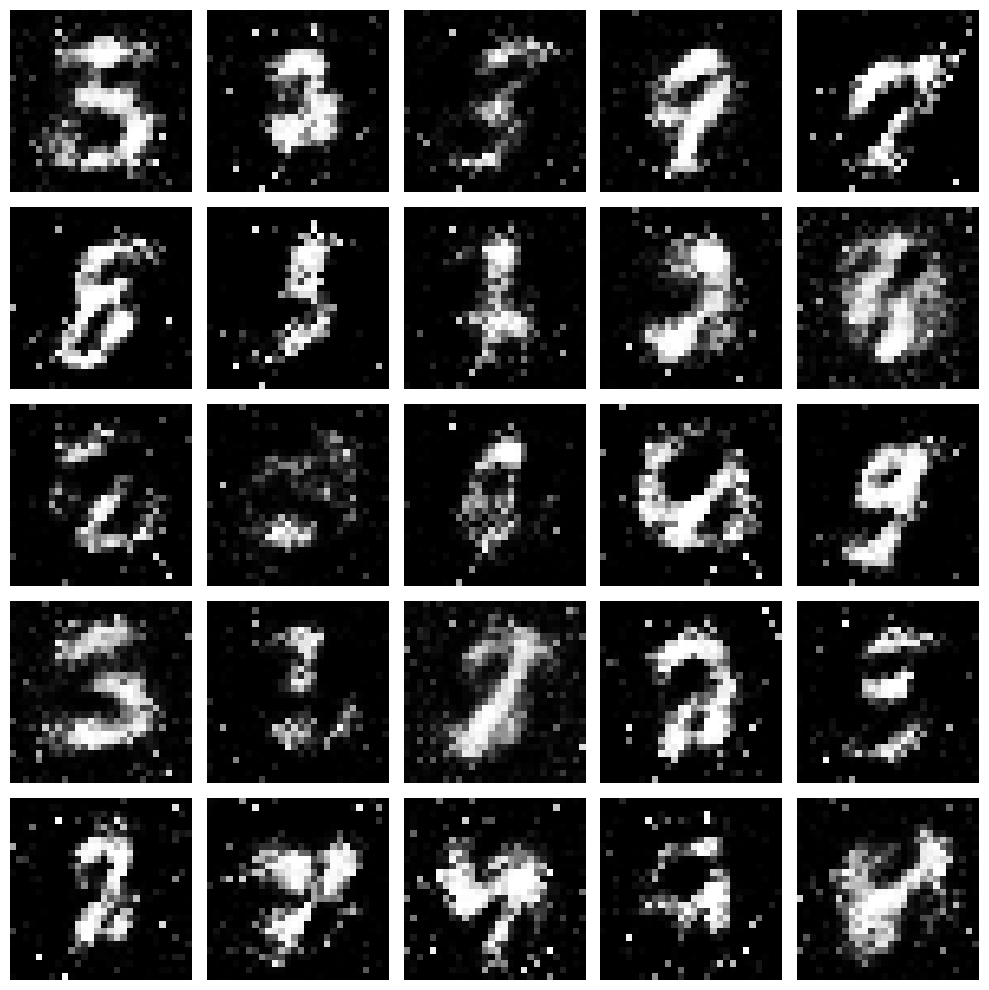

epoch: 24100, d_loss: 0.3337830901145935, g_loss: 1.9228907823562622
epoch: 24200, d_loss: 0.3342864513397217, g_loss: 1.9221476316452026
epoch: 24300, d_loss: 0.3347645401954651, g_loss: 1.9214324951171875
epoch: 24400, d_loss: 0.3352794647216797, g_loss: 1.9206515550613403
epoch: 24500, d_loss: 0.33592188358306885, g_loss: 1.9194573163986206
epoch: 24600, d_loss: 0.33649390935897827, g_loss: 1.9183175563812256
epoch: 24700, d_loss: 0.3369945287704468, g_loss: 1.9174604415893555
epoch: 24800, d_loss: 0.3376586437225342, g_loss: 1.9162206649780273
epoch: 24900, d_loss: 0.3383325934410095, g_loss: 1.9151313304901123
epoch: 25000, d_loss: 0.338930606842041, g_loss: 1.9142433404922485


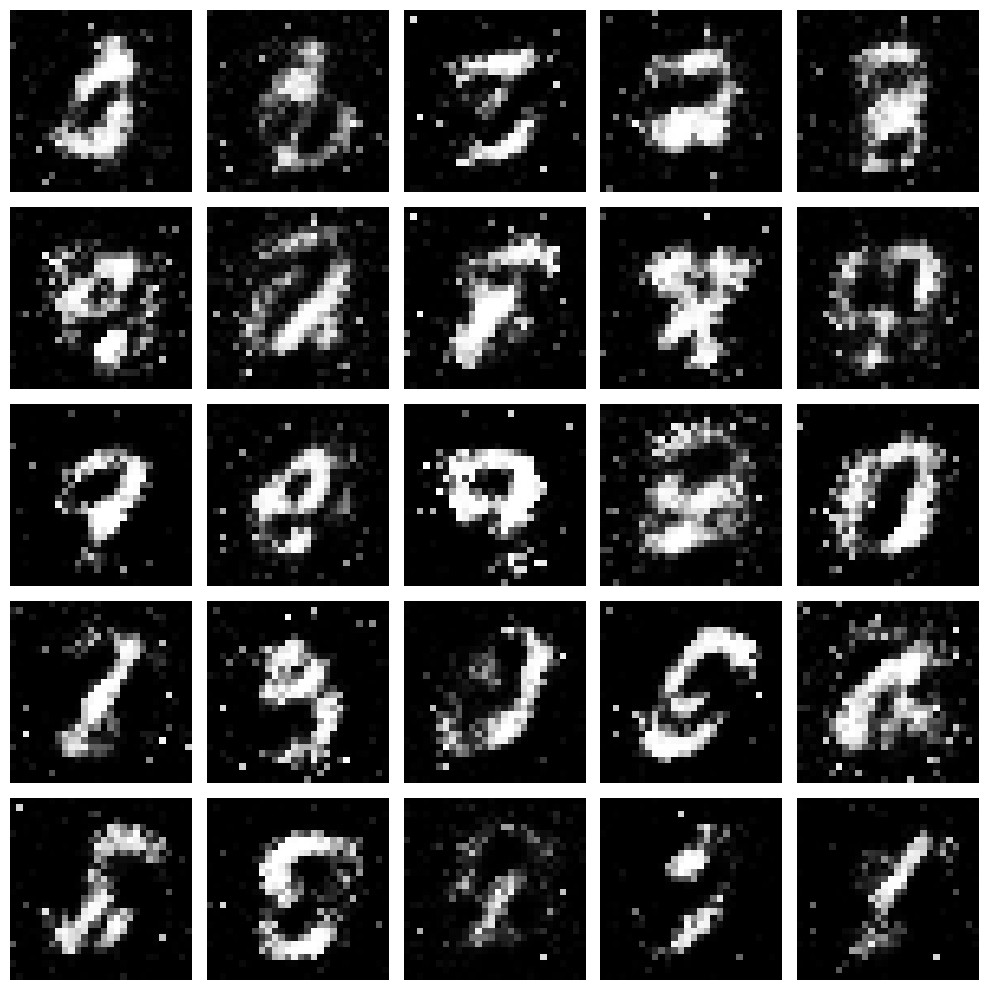

epoch: 25100, d_loss: 0.33961719274520874, g_loss: 1.9132059812545776
epoch: 25200, d_loss: 0.34023669362068176, g_loss: 1.9122545719146729
epoch: 25300, d_loss: 0.34079086780548096, g_loss: 1.9112610816955566
epoch: 25400, d_loss: 0.34125399589538574, g_loss: 1.9106897115707397
epoch: 25500, d_loss: 0.3418942093849182, g_loss: 1.9096688032150269
epoch: 25600, d_loss: 0.34256699681282043, g_loss: 1.9084162712097168
epoch: 25700, d_loss: 0.3431239128112793, g_loss: 1.9073269367218018
epoch: 25800, d_loss: 0.34364986419677734, g_loss: 1.9063880443572998
epoch: 25900, d_loss: 0.34420210123062134, g_loss: 1.9054912328720093
epoch: 26000, d_loss: 0.34488198161125183, g_loss: 1.9042248725891113


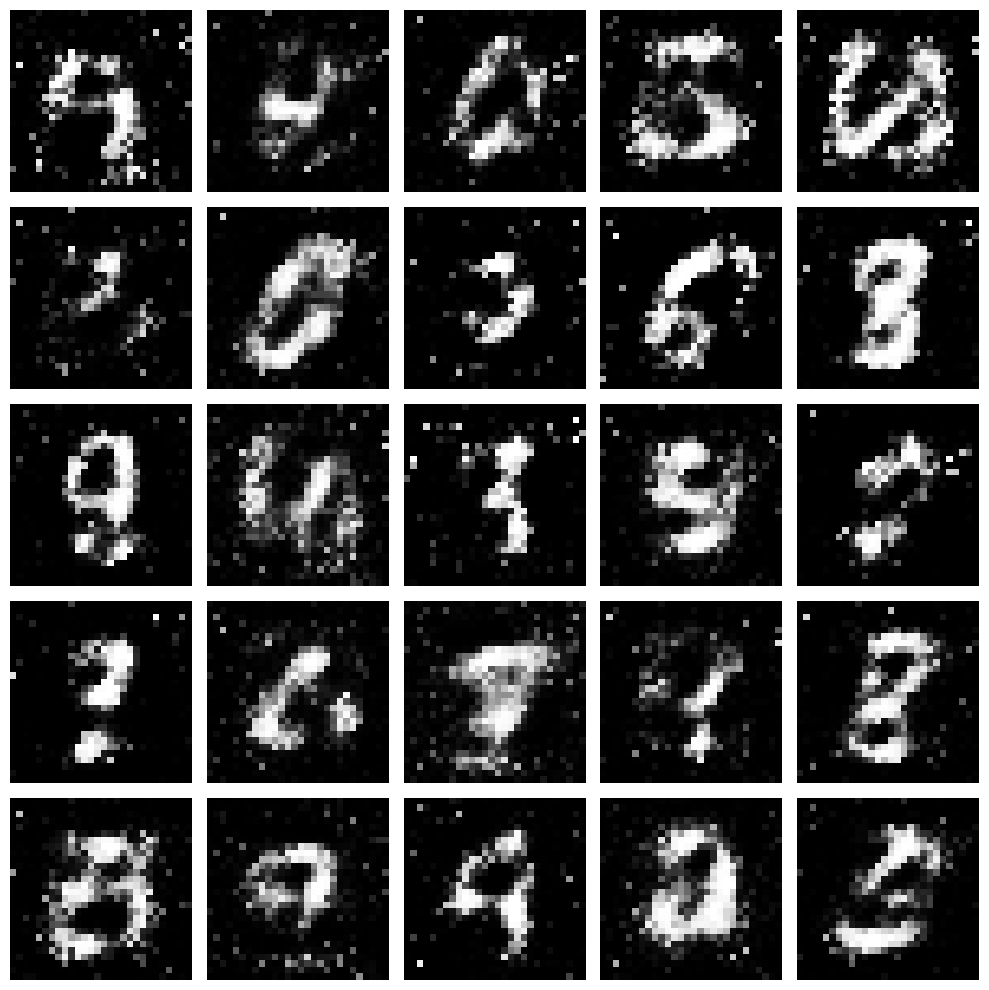

epoch: 26100, d_loss: 0.34538912773132324, g_loss: 1.903351902961731
epoch: 26200, d_loss: 0.3460022807121277, g_loss: 1.9021592140197754
epoch: 26300, d_loss: 0.3465302884578705, g_loss: 1.9011425971984863
epoch: 26400, d_loss: 0.34724897146224976, g_loss: 1.8998357057571411
epoch: 26500, d_loss: 0.3478081226348877, g_loss: 1.898935317993164
epoch: 26600, d_loss: 0.34847766160964966, g_loss: 1.8977789878845215
epoch: 26700, d_loss: 0.3489585518836975, g_loss: 1.8969544172286987
epoch: 26800, d_loss: 0.34956416487693787, g_loss: 1.8958654403686523
epoch: 26900, d_loss: 0.35001808404922485, g_loss: 1.8948239088058472
epoch: 27000, d_loss: 0.35065221786499023, g_loss: 1.8934708833694458


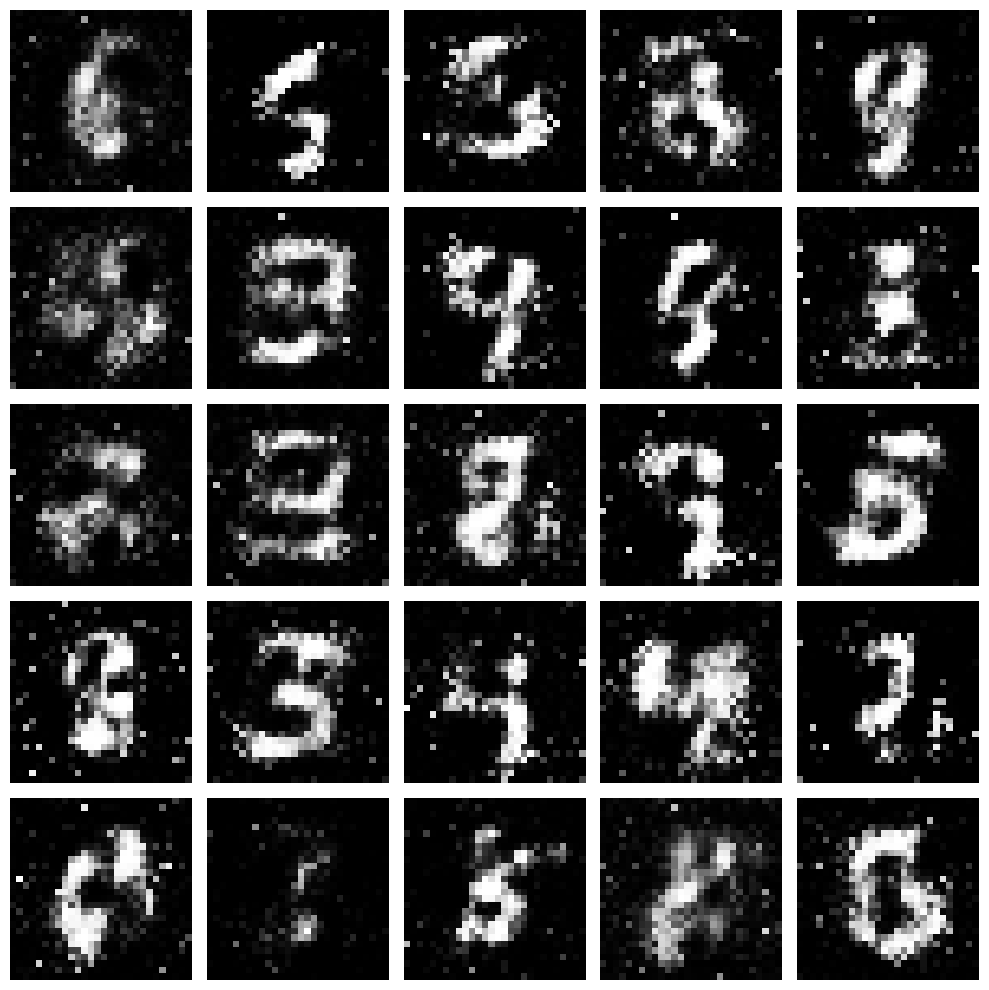

epoch: 27100, d_loss: 0.3511081337928772, g_loss: 1.89255690574646
epoch: 27200, d_loss: 0.3516242504119873, g_loss: 1.8915326595306396
epoch: 27300, d_loss: 0.35206127166748047, g_loss: 1.8905541896820068
epoch: 27400, d_loss: 0.3525788187980652, g_loss: 1.8894649744033813
epoch: 27500, d_loss: 0.35312938690185547, g_loss: 1.8883633613586426
epoch: 27600, d_loss: 0.3535856604576111, g_loss: 1.8874565362930298
epoch: 27700, d_loss: 0.3540034294128418, g_loss: 1.8864668607711792
epoch: 27800, d_loss: 0.35450661182403564, g_loss: 1.8853951692581177
epoch: 27900, d_loss: 0.35494816303253174, g_loss: 1.8844929933547974
epoch: 28000, d_loss: 0.35544416308403015, g_loss: 1.8835184574127197


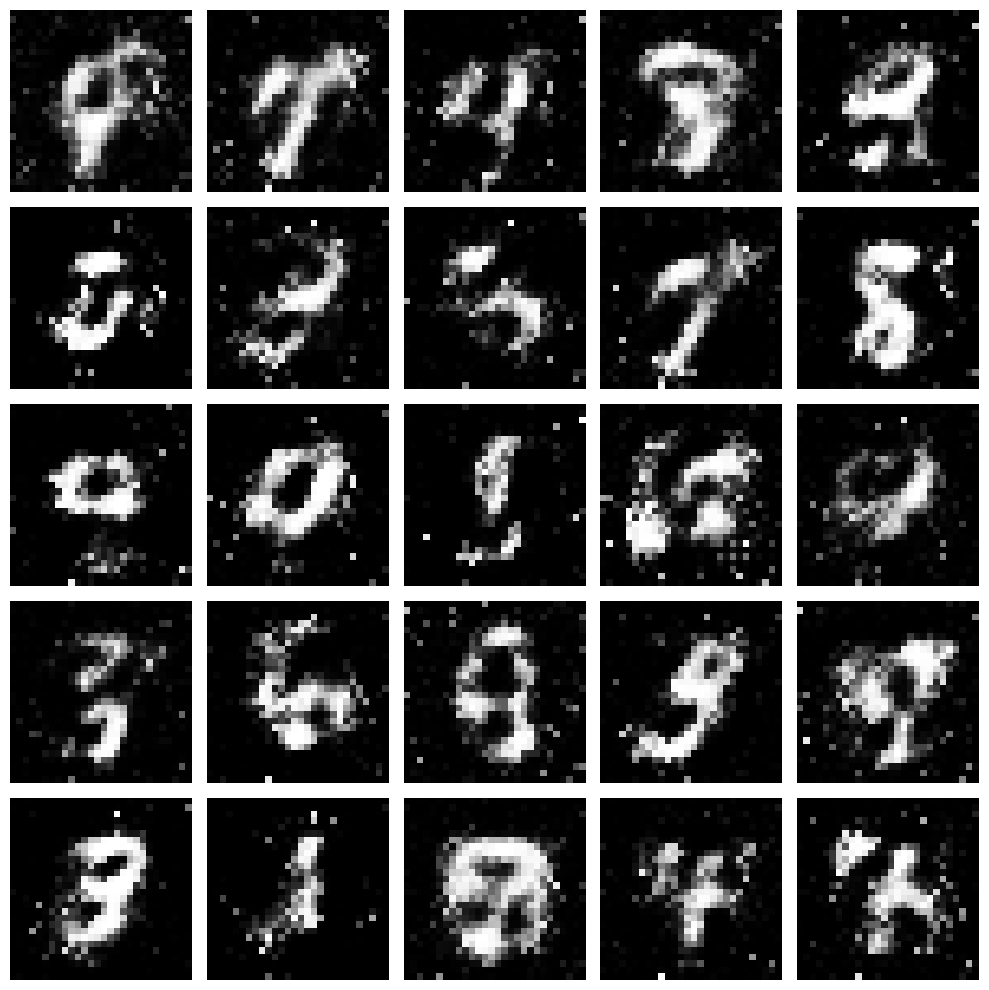

epoch: 28100, d_loss: 0.3559011220932007, g_loss: 1.8823343515396118
epoch: 28200, d_loss: 0.3564590513706207, g_loss: 1.8810384273529053
epoch: 28300, d_loss: 0.3568738102912903, g_loss: 1.8800448179244995
epoch: 28400, d_loss: 0.35729044675827026, g_loss: 1.8790860176086426
epoch: 28500, d_loss: 0.35776835680007935, g_loss: 1.8780325651168823
epoch: 28600, d_loss: 0.35817214846611023, g_loss: 1.8770583868026733
epoch: 28700, d_loss: 0.3585664629936218, g_loss: 1.876089096069336
epoch: 28800, d_loss: 0.35904839634895325, g_loss: 1.874961256980896
epoch: 28900, d_loss: 0.3595447838306427, g_loss: 1.8737848997116089
epoch: 29000, d_loss: 0.36001452803611755, g_loss: 1.8727364540100098


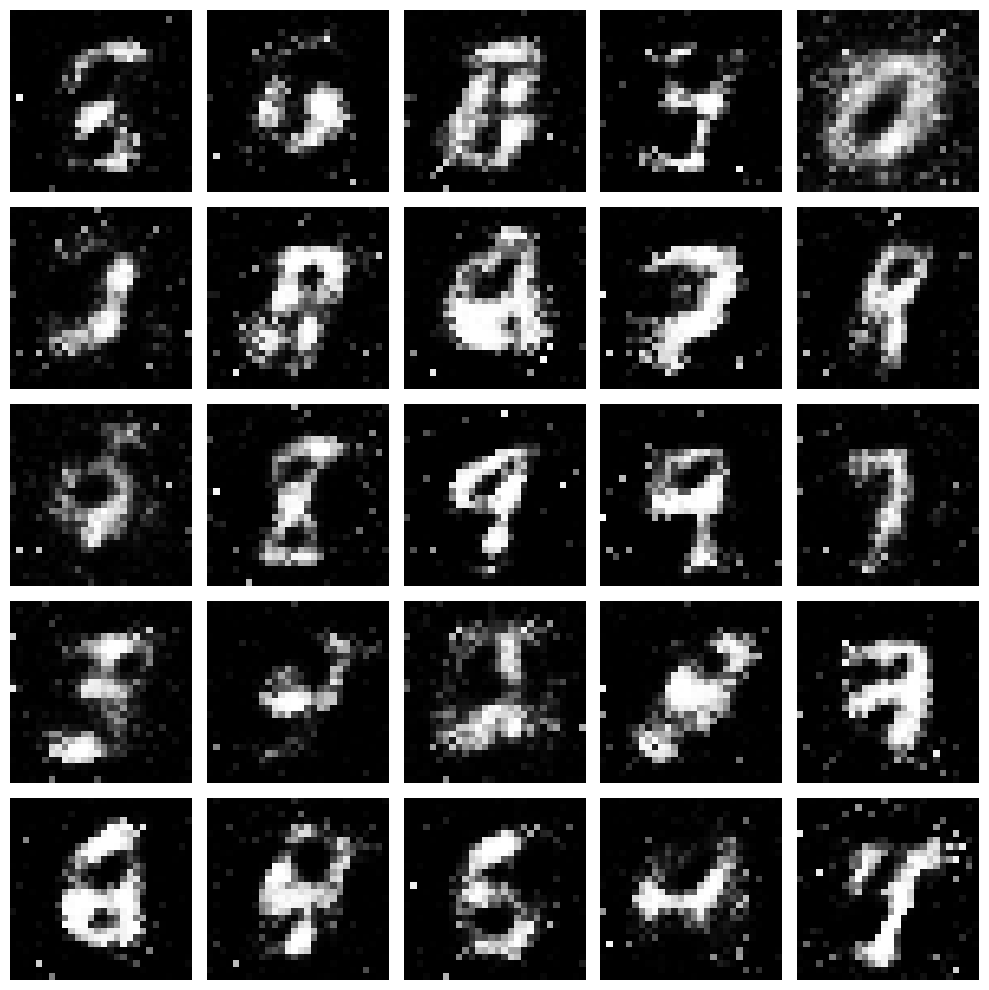

epoch: 29100, d_loss: 0.36049631237983704, g_loss: 1.871657133102417
epoch: 29200, d_loss: 0.36089301109313965, g_loss: 1.8707796335220337
epoch: 29300, d_loss: 0.36139926314353943, g_loss: 1.8697453737258911
epoch: 29400, d_loss: 0.36173731088638306, g_loss: 1.8690458536148071
epoch: 29500, d_loss: 0.362392395734787, g_loss: 1.8677337169647217
epoch: 29600, d_loss: 0.3628355860710144, g_loss: 1.8667864799499512
epoch: 29700, d_loss: 0.3634229302406311, g_loss: 1.8655589818954468
epoch: 29800, d_loss: 0.3638983368873596, g_loss: 1.8644062280654907
epoch: 29900, d_loss: 0.36437004804611206, g_loss: 1.8632992506027222
epoch: 30000, d_loss: 0.3648473024368286, g_loss: 1.8622019290924072


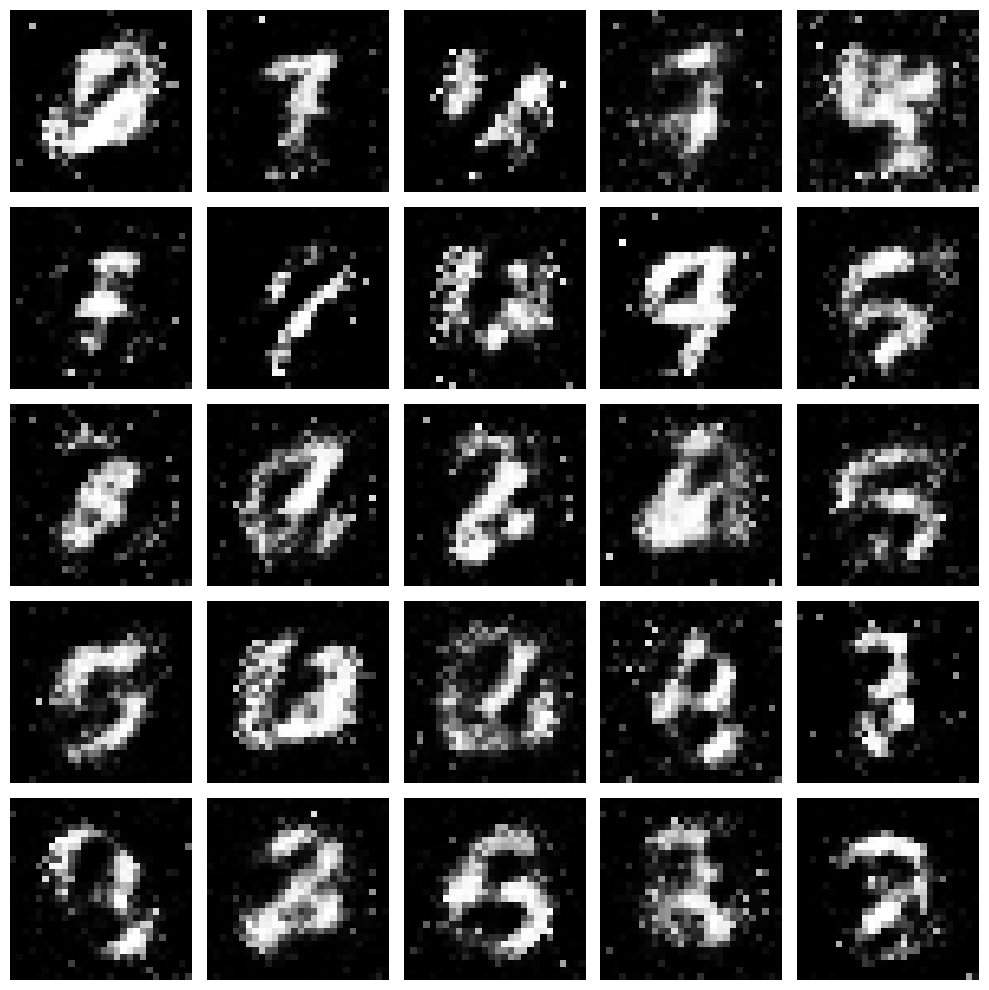

epoch: 30100, d_loss: 0.3654140532016754, g_loss: 1.8610179424285889
epoch: 30200, d_loss: 0.3659125566482544, g_loss: 1.8600130081176758
epoch: 30300, d_loss: 0.36646541953086853, g_loss: 1.8590097427368164
epoch: 30400, d_loss: 0.3669845461845398, g_loss: 1.8580058813095093
epoch: 30500, d_loss: 0.3674253821372986, g_loss: 1.856970191001892
epoch: 30600, d_loss: 0.3677871823310852, g_loss: 1.8562839031219482
epoch: 30700, d_loss: 0.3683958053588867, g_loss: 1.855191707611084
epoch: 30800, d_loss: 0.3688877522945404, g_loss: 1.8541984558105469
epoch: 30900, d_loss: 0.3694078326225281, g_loss: 1.8531874418258667
epoch: 31000, d_loss: 0.37000006437301636, g_loss: 1.8519221544265747


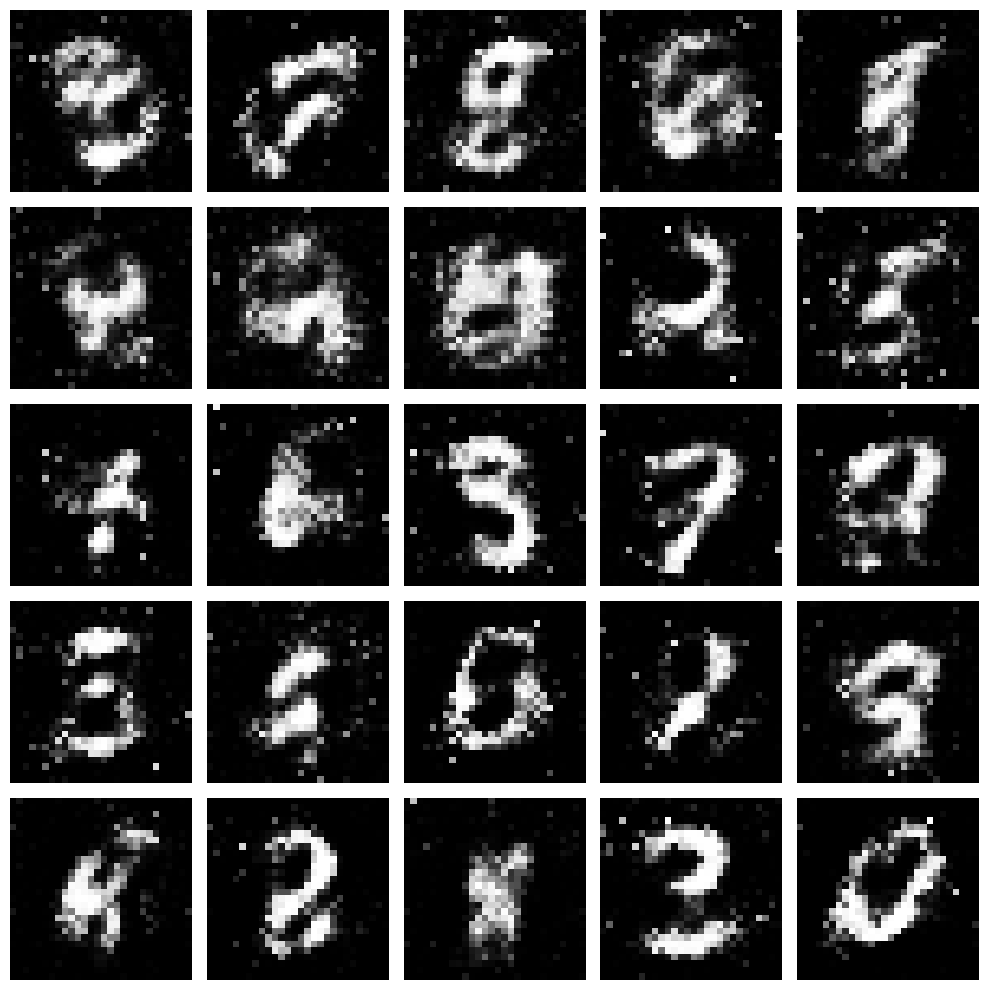

epoch: 31100, d_loss: 0.3704705834388733, g_loss: 1.8509161472320557
epoch: 31200, d_loss: 0.37110185623168945, g_loss: 1.8498040437698364
epoch: 31300, d_loss: 0.37163951992988586, g_loss: 1.8486851453781128
epoch: 31400, d_loss: 0.372110515832901, g_loss: 1.8476539850234985
epoch: 31500, d_loss: 0.372663676738739, g_loss: 1.8465882539749146
epoch: 31600, d_loss: 0.37322667241096497, g_loss: 1.8454042673110962
epoch: 31700, d_loss: 0.37378910183906555, g_loss: 1.8442469835281372
epoch: 31800, d_loss: 0.3743588924407959, g_loss: 1.8430287837982178
epoch: 31900, d_loss: 0.3748261332511902, g_loss: 1.8419857025146484
epoch: 32000, d_loss: 0.3753681480884552, g_loss: 1.8408069610595703


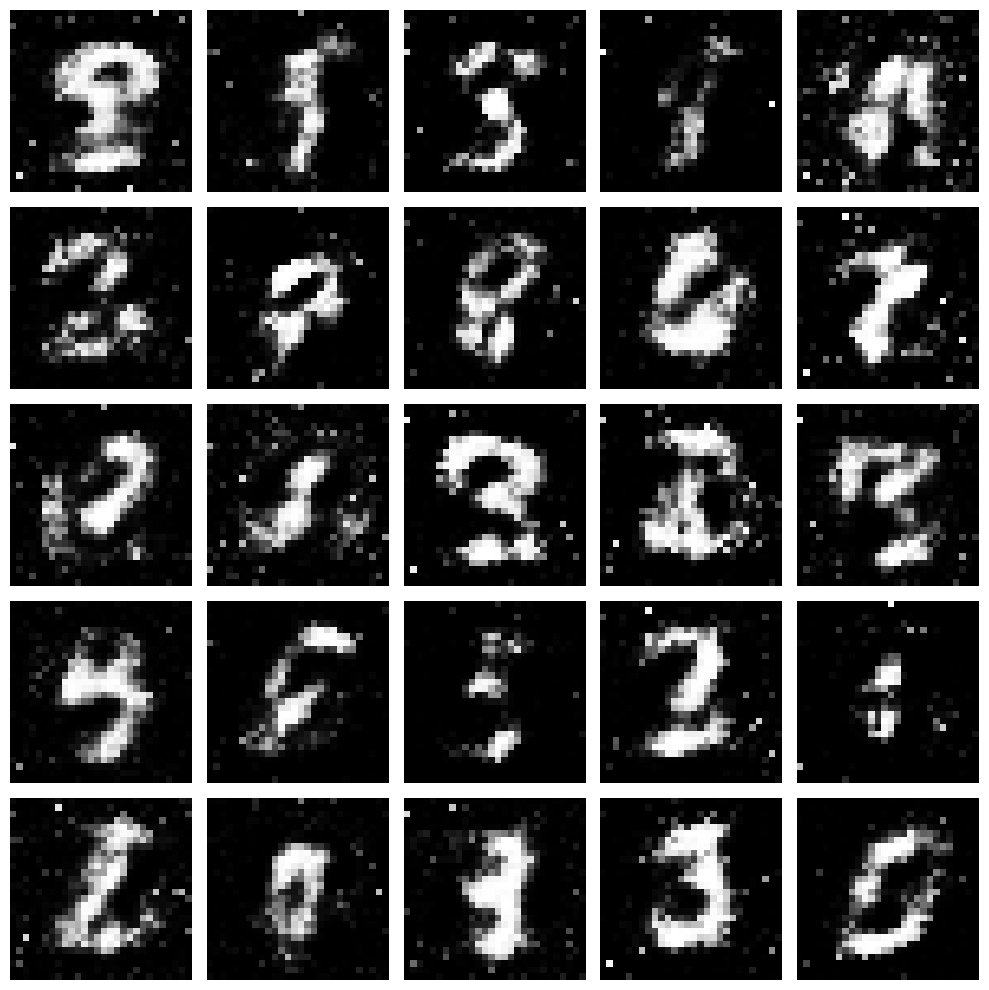

epoch: 32100, d_loss: 0.3758167028427124, g_loss: 1.8397033214569092
epoch: 32200, d_loss: 0.3764376938343048, g_loss: 1.8384853601455688
epoch: 32300, d_loss: 0.37686610221862793, g_loss: 1.8375842571258545
epoch: 32400, d_loss: 0.3774239122867584, g_loss: 1.8363844156265259
epoch: 32500, d_loss: 0.3779070973396301, g_loss: 1.835339069366455
epoch: 32600, d_loss: 0.3784002959728241, g_loss: 1.8343580961227417
epoch: 32700, d_loss: 0.37873443961143494, g_loss: 1.8334628343582153
epoch: 32800, d_loss: 0.3792561888694763, g_loss: 1.8322895765304565
epoch: 32900, d_loss: 0.3797319829463959, g_loss: 1.8312197923660278
epoch: 33000, d_loss: 0.38015174865722656, g_loss: 1.8302249908447266


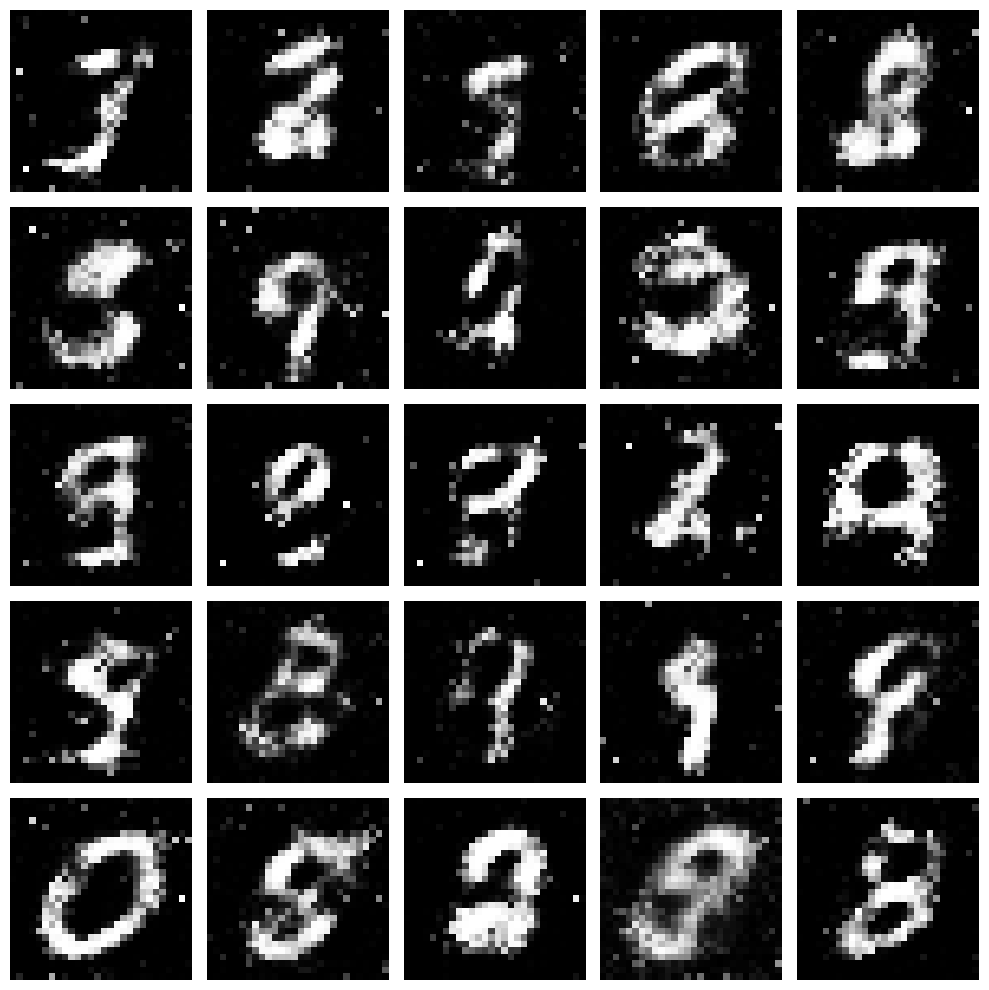

epoch: 33100, d_loss: 0.3806161880493164, g_loss: 1.8292419910430908
epoch: 33200, d_loss: 0.3810484707355499, g_loss: 1.8283125162124634
epoch: 33300, d_loss: 0.381508469581604, g_loss: 1.8272972106933594
epoch: 33400, d_loss: 0.38184088468551636, g_loss: 1.8264447450637817
epoch: 33500, d_loss: 0.38233473896980286, g_loss: 1.825425386428833
epoch: 33600, d_loss: 0.38273346424102783, g_loss: 1.8245652914047241
epoch: 33700, d_loss: 0.3832120895385742, g_loss: 1.8235636949539185
epoch: 33800, d_loss: 0.38356223702430725, g_loss: 1.8226696252822876
epoch: 33900, d_loss: 0.3839876055717468, g_loss: 1.8217724561691284
epoch: 34000, d_loss: 0.38441038131713867, g_loss: 1.8207889795303345


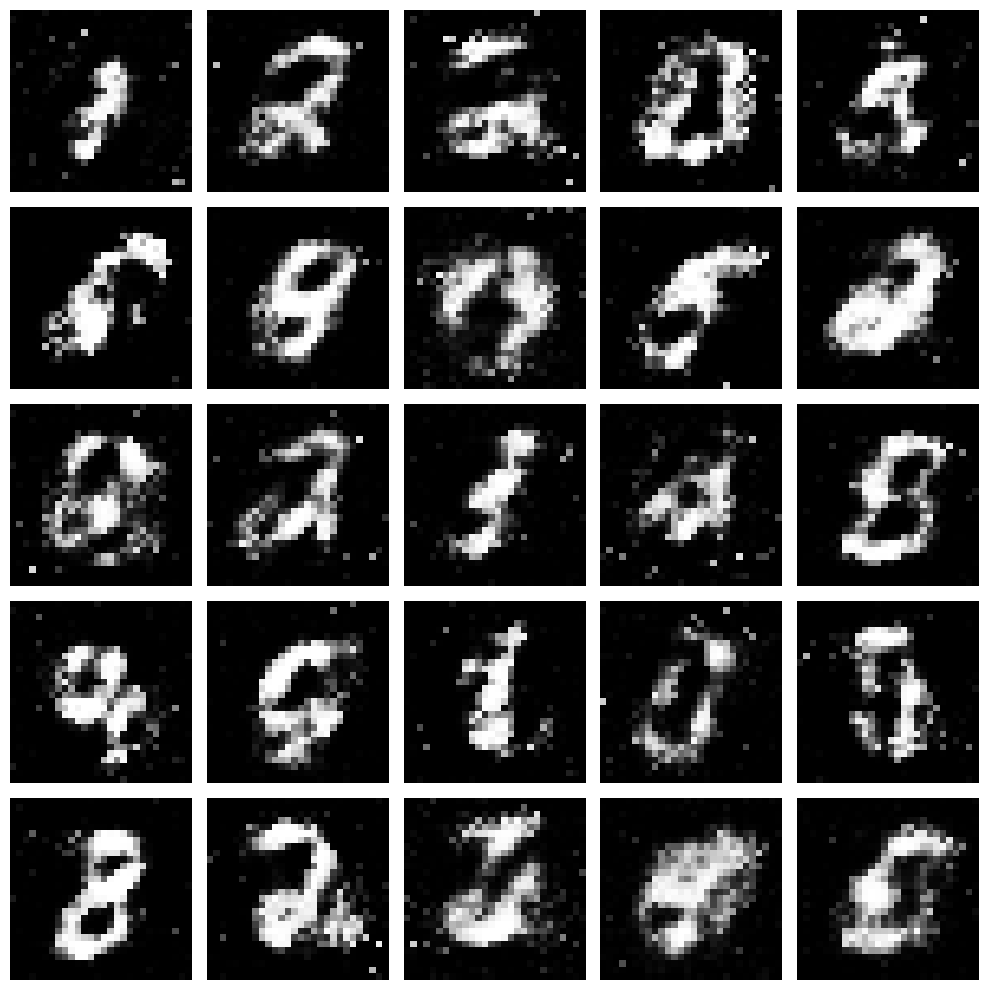

epoch: 34100, d_loss: 0.38489145040512085, g_loss: 1.8197814226150513
epoch: 34200, d_loss: 0.38538962602615356, g_loss: 1.8187309503555298
epoch: 34300, d_loss: 0.3857394754886627, g_loss: 1.8179796934127808
epoch: 34400, d_loss: 0.38611310720443726, g_loss: 1.8170217275619507
epoch: 34500, d_loss: 0.3865324854850769, g_loss: 1.816006064414978
epoch: 34600, d_loss: 0.3869056701660156, g_loss: 1.81503164768219
epoch: 34700, d_loss: 0.38721126317977905, g_loss: 1.8141299486160278
epoch: 34800, d_loss: 0.3877109885215759, g_loss: 1.8130327463150024
epoch: 34900, d_loss: 0.38806241750717163, g_loss: 1.812207818031311
epoch: 35000, d_loss: 0.3884051442146301, g_loss: 1.811303973197937


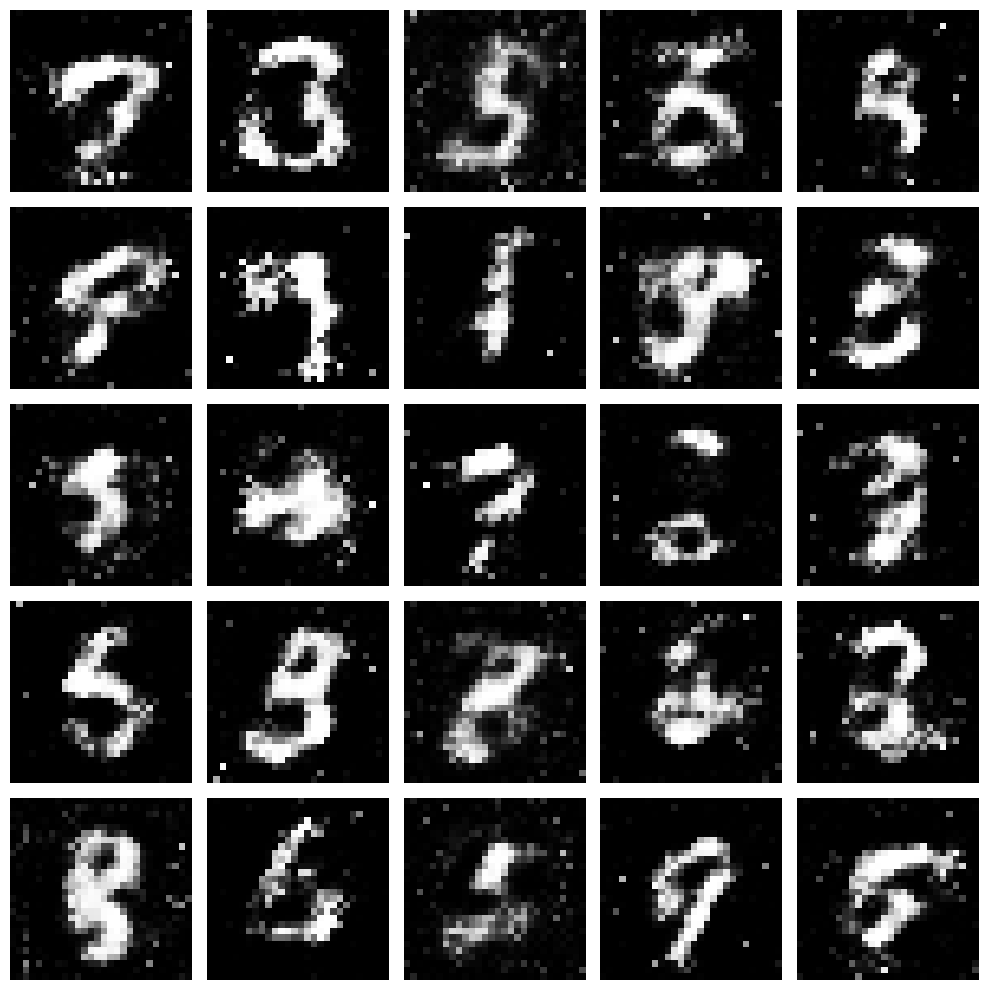

epoch: 35100, d_loss: 0.3888702094554901, g_loss: 1.810172438621521
epoch: 35200, d_loss: 0.38914036750793457, g_loss: 1.8093762397766113
epoch: 35300, d_loss: 0.3896039128303528, g_loss: 1.8082882165908813
epoch: 35400, d_loss: 0.38989877700805664, g_loss: 1.8074500560760498
epoch: 35500, d_loss: 0.390305757522583, g_loss: 1.8064764738082886
epoch: 35600, d_loss: 0.39066317677497864, g_loss: 1.805574893951416
epoch: 35700, d_loss: 0.3910733759403229, g_loss: 1.804524540901184
epoch: 35800, d_loss: 0.3915283977985382, g_loss: 1.803470492362976
epoch: 35900, d_loss: 0.39188462495803833, g_loss: 1.8025741577148438
epoch: 36000, d_loss: 0.3923172354698181, g_loss: 1.8016417026519775


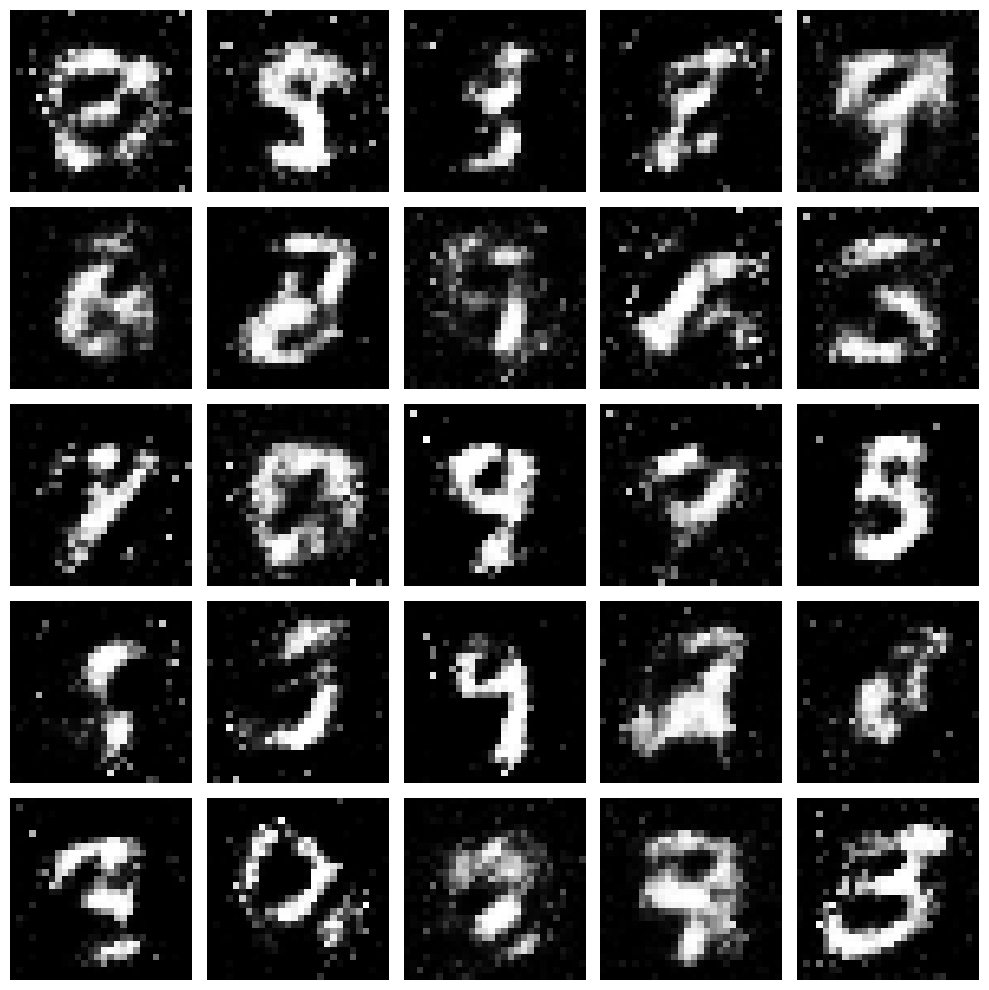

epoch: 36100, d_loss: 0.3927849531173706, g_loss: 1.8006314039230347
epoch: 36200, d_loss: 0.3932666778564453, g_loss: 1.7995890378952026
epoch: 36300, d_loss: 0.3936310410499573, g_loss: 1.798685073852539
epoch: 36400, d_loss: 0.39402931928634644, g_loss: 1.7977045774459839
epoch: 36500, d_loss: 0.39451470971107483, g_loss: 1.796722412109375
epoch: 36600, d_loss: 0.3948836326599121, g_loss: 1.795851707458496
epoch: 36700, d_loss: 0.3953266739845276, g_loss: 1.7948435544967651
epoch: 36800, d_loss: 0.3957059979438782, g_loss: 1.7939926385879517
epoch: 36900, d_loss: 0.3961496353149414, g_loss: 1.7929837703704834
epoch: 37000, d_loss: 0.3965844213962555, g_loss: 1.7920283079147339


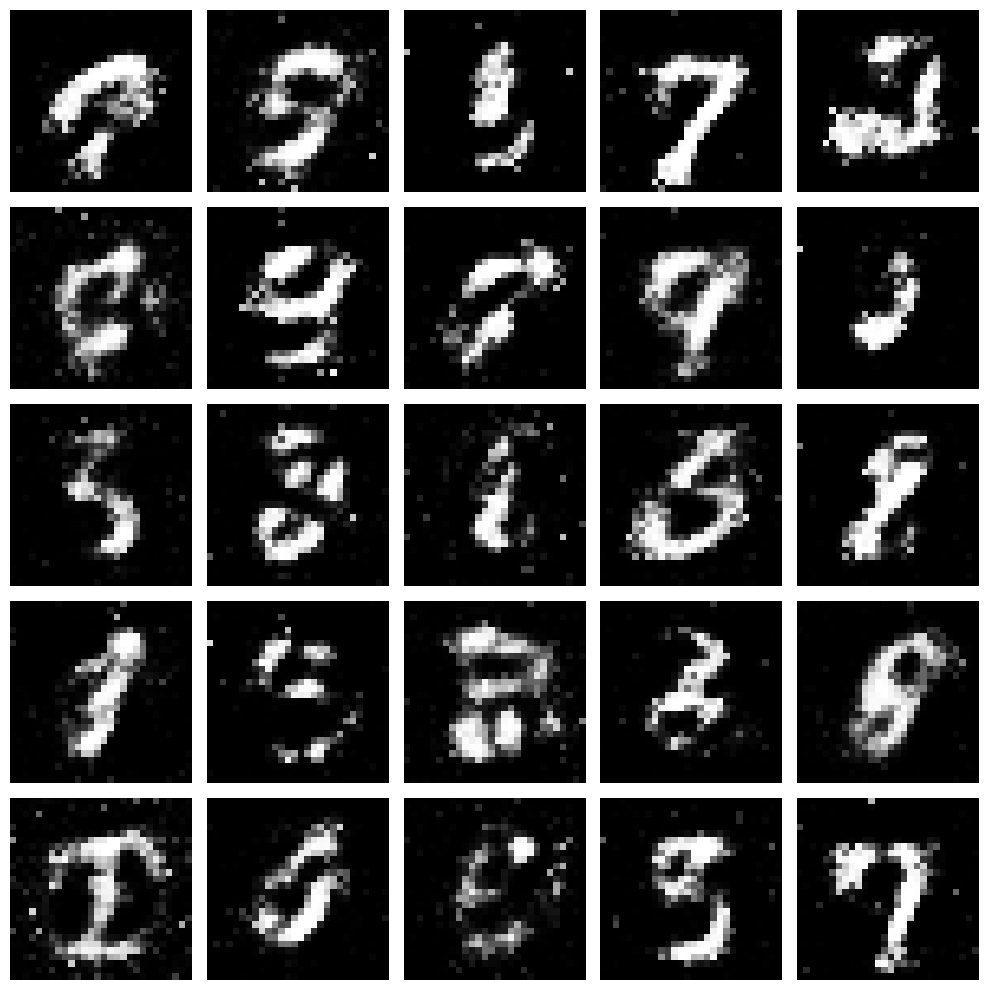

epoch: 37100, d_loss: 0.3969728350639343, g_loss: 1.7910889387130737
epoch: 37200, d_loss: 0.39740675687789917, g_loss: 1.7900669574737549
epoch: 37300, d_loss: 0.3978447914123535, g_loss: 1.7889925241470337
epoch: 37400, d_loss: 0.398190975189209, g_loss: 1.7881850004196167
epoch: 37500, d_loss: 0.39861589670181274, g_loss: 1.787198543548584
epoch: 37600, d_loss: 0.39903926849365234, g_loss: 1.786210060119629
epoch: 37700, d_loss: 0.3994370102882385, g_loss: 1.7851994037628174
epoch: 37800, d_loss: 0.3998177647590637, g_loss: 1.784187912940979
epoch: 37900, d_loss: 0.40023940801620483, g_loss: 1.7831342220306396
epoch: 38000, d_loss: 0.4006293714046478, g_loss: 1.7821406126022339


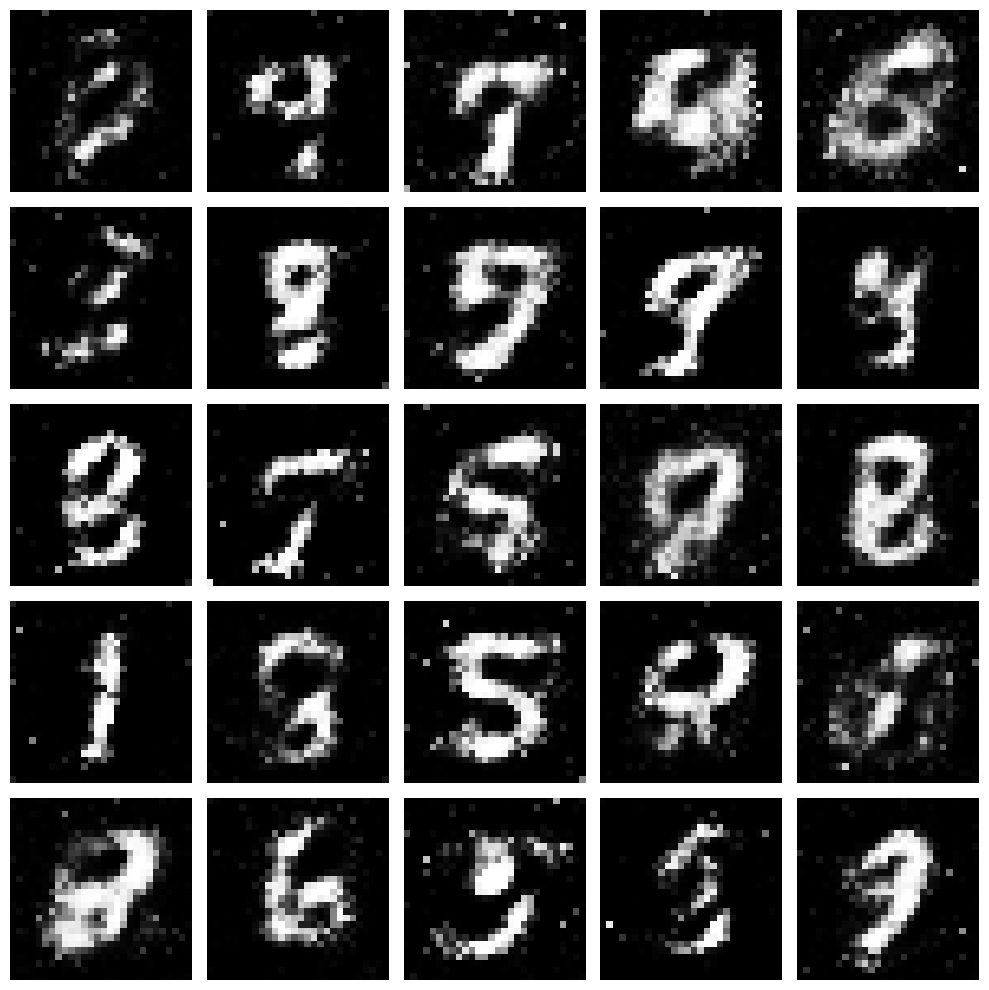

epoch: 38100, d_loss: 0.4009944498538971, g_loss: 1.7812409400939941
epoch: 38200, d_loss: 0.40139877796173096, g_loss: 1.7802677154541016
epoch: 38300, d_loss: 0.40171512961387634, g_loss: 1.7793350219726562
epoch: 38400, d_loss: 0.40214794874191284, g_loss: 1.77833092212677
epoch: 38500, d_loss: 0.4025977849960327, g_loss: 1.7773524522781372
epoch: 38600, d_loss: 0.4028606116771698, g_loss: 1.7765977382659912
epoch: 38700, d_loss: 0.4032828211784363, g_loss: 1.7755588293075562
epoch: 38800, d_loss: 0.40371081233024597, g_loss: 1.774567723274231
epoch: 38900, d_loss: 0.4041294455528259, g_loss: 1.7735708951950073
epoch: 39000, d_loss: 0.40449434518814087, g_loss: 1.7726402282714844


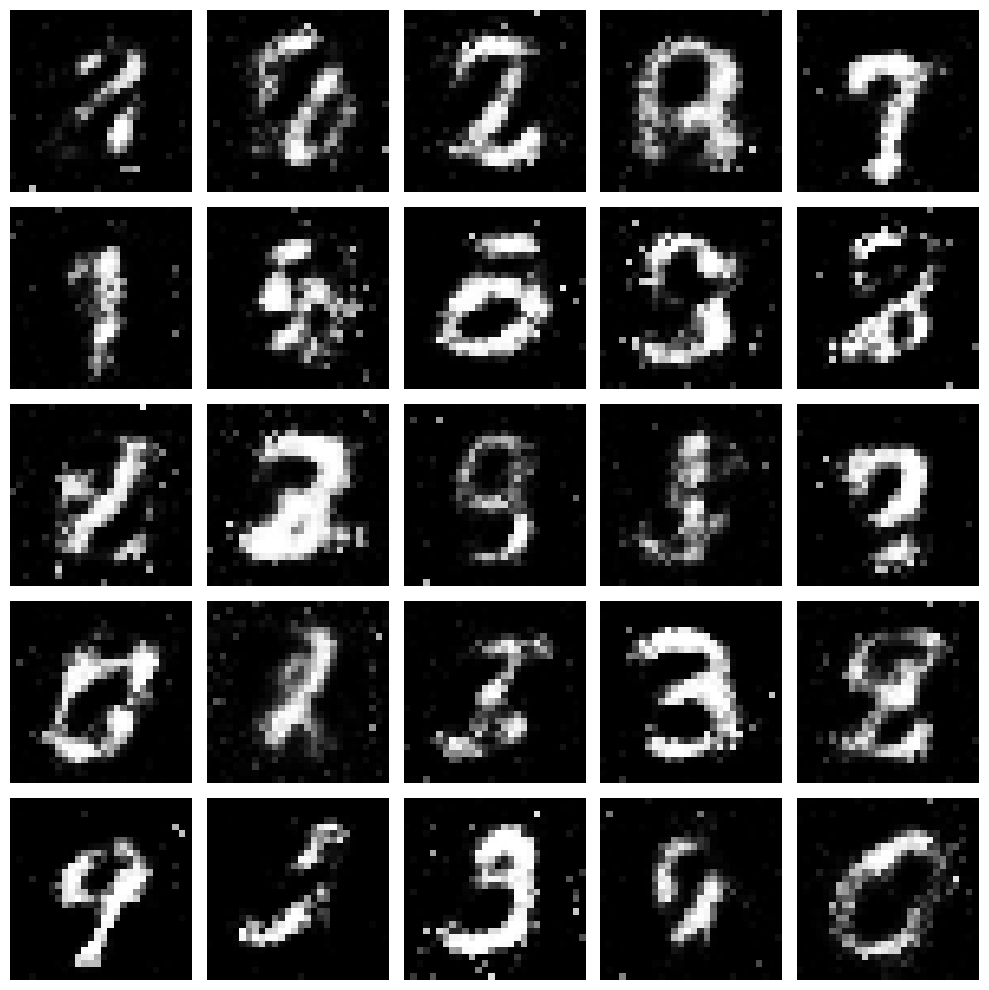

epoch: 39100, d_loss: 0.4048892557621002, g_loss: 1.7716444730758667
epoch: 39200, d_loss: 0.4053215980529785, g_loss: 1.770568609237671
epoch: 39300, d_loss: 0.4057195782661438, g_loss: 1.7695913314819336
epoch: 39400, d_loss: 0.4061133861541748, g_loss: 1.7685985565185547
epoch: 39500, d_loss: 0.4065379500389099, g_loss: 1.7675697803497314
epoch: 39600, d_loss: 0.40691012144088745, g_loss: 1.7666720151901245
epoch: 39700, d_loss: 0.40733855962753296, g_loss: 1.7656588554382324
epoch: 39800, d_loss: 0.40777522325515747, g_loss: 1.7645442485809326
epoch: 39900, d_loss: 0.408089816570282, g_loss: 1.7636240720748901
epoch: 40000, d_loss: 0.4085724949836731, g_loss: 1.7624949216842651


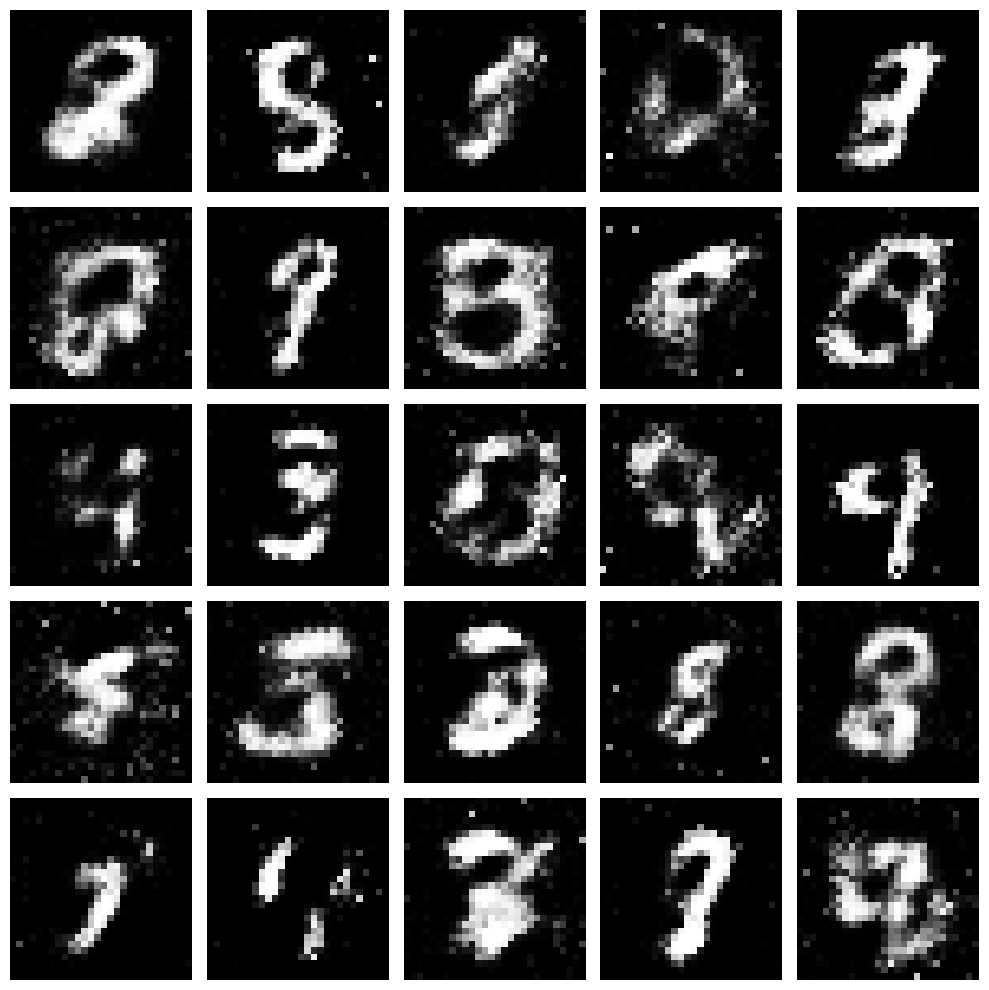

epoch: 40100, d_loss: 0.40899261832237244, g_loss: 1.7614364624023438
epoch: 40200, d_loss: 0.40944308042526245, g_loss: 1.7603036165237427
epoch: 40300, d_loss: 0.40983521938323975, g_loss: 1.7592597007751465
epoch: 40400, d_loss: 0.41026389598846436, g_loss: 1.7582205533981323
epoch: 40500, d_loss: 0.41058820486068726, g_loss: 1.7573212385177612
epoch: 40600, d_loss: 0.411049485206604, g_loss: 1.7562319040298462
epoch: 40700, d_loss: 0.4114552140235901, g_loss: 1.7552205324172974
epoch: 40800, d_loss: 0.41181451082229614, g_loss: 1.7542473077774048
epoch: 40900, d_loss: 0.4122466444969177, g_loss: 1.7532764673233032
epoch: 41000, d_loss: 0.41270846128463745, g_loss: 1.752212405204773


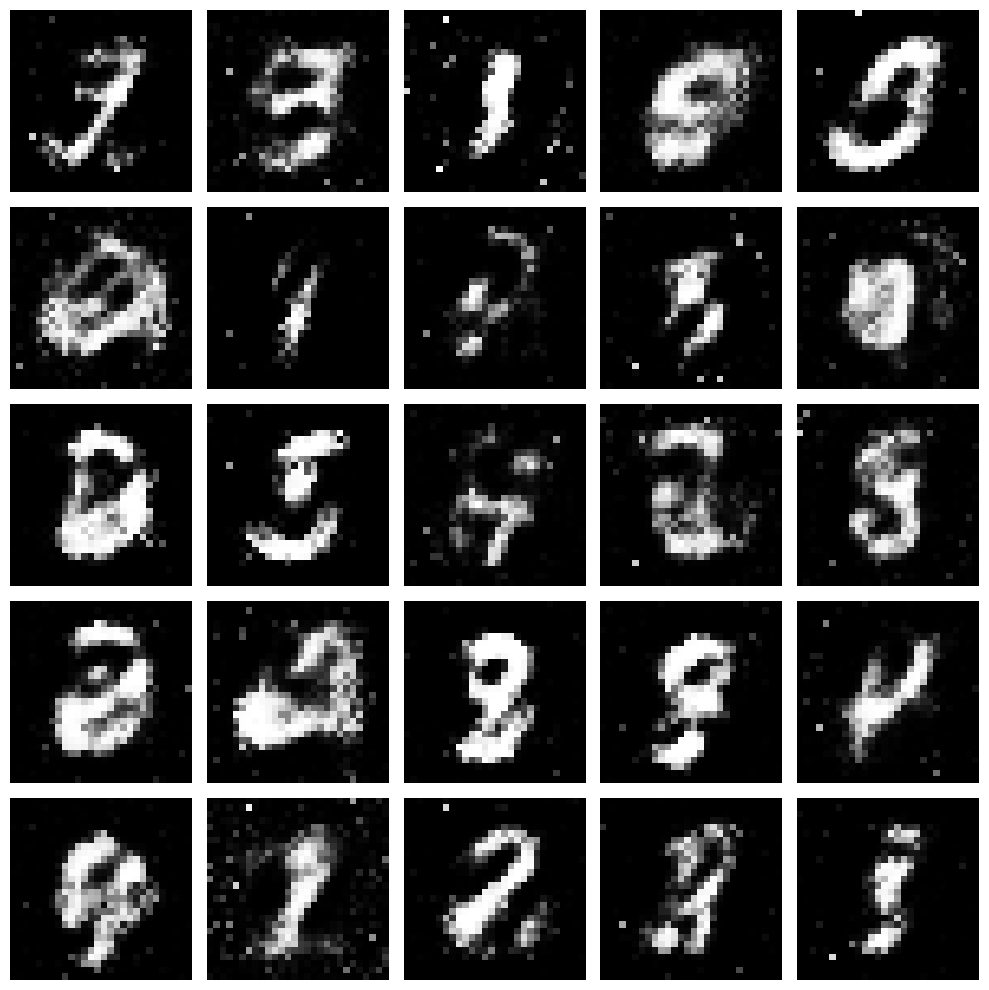

epoch: 41100, d_loss: 0.41304612159729004, g_loss: 1.751362681388855
epoch: 41200, d_loss: 0.4134010970592499, g_loss: 1.7505052089691162
epoch: 41300, d_loss: 0.41383203864097595, g_loss: 1.7494925260543823
epoch: 41400, d_loss: 0.4141993820667267, g_loss: 1.748543381690979
epoch: 41500, d_loss: 0.4145425260066986, g_loss: 1.7476556301116943
epoch: 41600, d_loss: 0.41496145725250244, g_loss: 1.7466769218444824
epoch: 41700, d_loss: 0.41532933712005615, g_loss: 1.745749592781067
epoch: 41800, d_loss: 0.41569358110427856, g_loss: 1.744827151298523
epoch: 41900, d_loss: 0.4160776138305664, g_loss: 1.7438384294509888
epoch: 42000, d_loss: 0.4164314866065979, g_loss: 1.7429147958755493


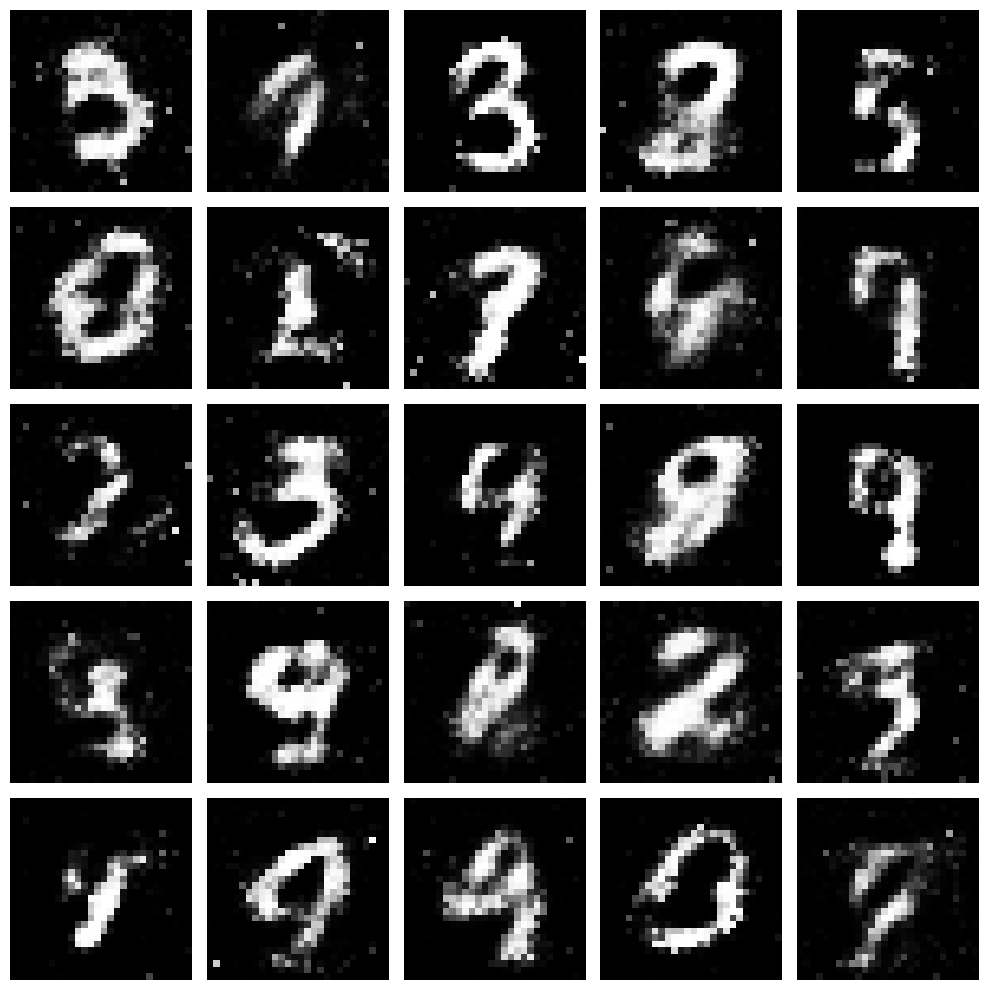

epoch: 42100, d_loss: 0.41685593128204346, g_loss: 1.7419155836105347
epoch: 42200, d_loss: 0.417194128036499, g_loss: 1.7410739660263062
epoch: 42300, d_loss: 0.4175506830215454, g_loss: 1.740198016166687
epoch: 42400, d_loss: 0.4179058074951172, g_loss: 1.7393250465393066
epoch: 42500, d_loss: 0.41826000809669495, g_loss: 1.738468050956726
epoch: 42600, d_loss: 0.41867795586586, g_loss: 1.7374939918518066
epoch: 42700, d_loss: 0.4190153479576111, g_loss: 1.7366114854812622
epoch: 42800, d_loss: 0.4193168878555298, g_loss: 1.7357711791992188
epoch: 42900, d_loss: 0.4197224974632263, g_loss: 1.7348018884658813
epoch: 43000, d_loss: 0.42004480957984924, g_loss: 1.7339656352996826


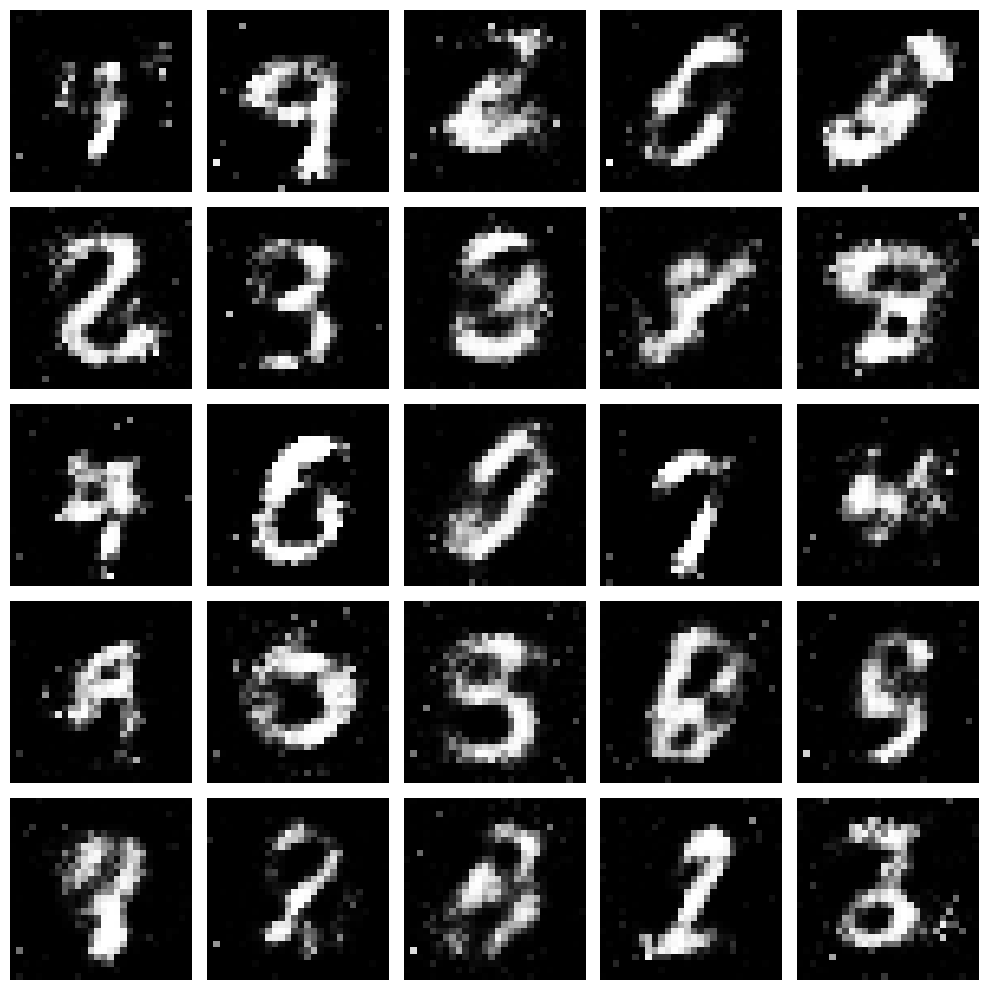

epoch: 43100, d_loss: 0.42041078209877014, g_loss: 1.733047366142273
epoch: 43200, d_loss: 0.4207543134689331, g_loss: 1.732175350189209
epoch: 43300, d_loss: 0.421100914478302, g_loss: 1.7312670946121216
epoch: 43400, d_loss: 0.4214697480201721, g_loss: 1.7303498983383179
epoch: 43500, d_loss: 0.42181065678596497, g_loss: 1.7294353246688843
epoch: 43600, d_loss: 0.4221670627593994, g_loss: 1.7285277843475342
epoch: 43700, d_loss: 0.42255061864852905, g_loss: 1.7275702953338623
epoch: 43800, d_loss: 0.4229191541671753, g_loss: 1.7266384363174438
epoch: 43900, d_loss: 0.4232301414012909, g_loss: 1.7257840633392334
epoch: 44000, d_loss: 0.423568457365036, g_loss: 1.7249209880828857


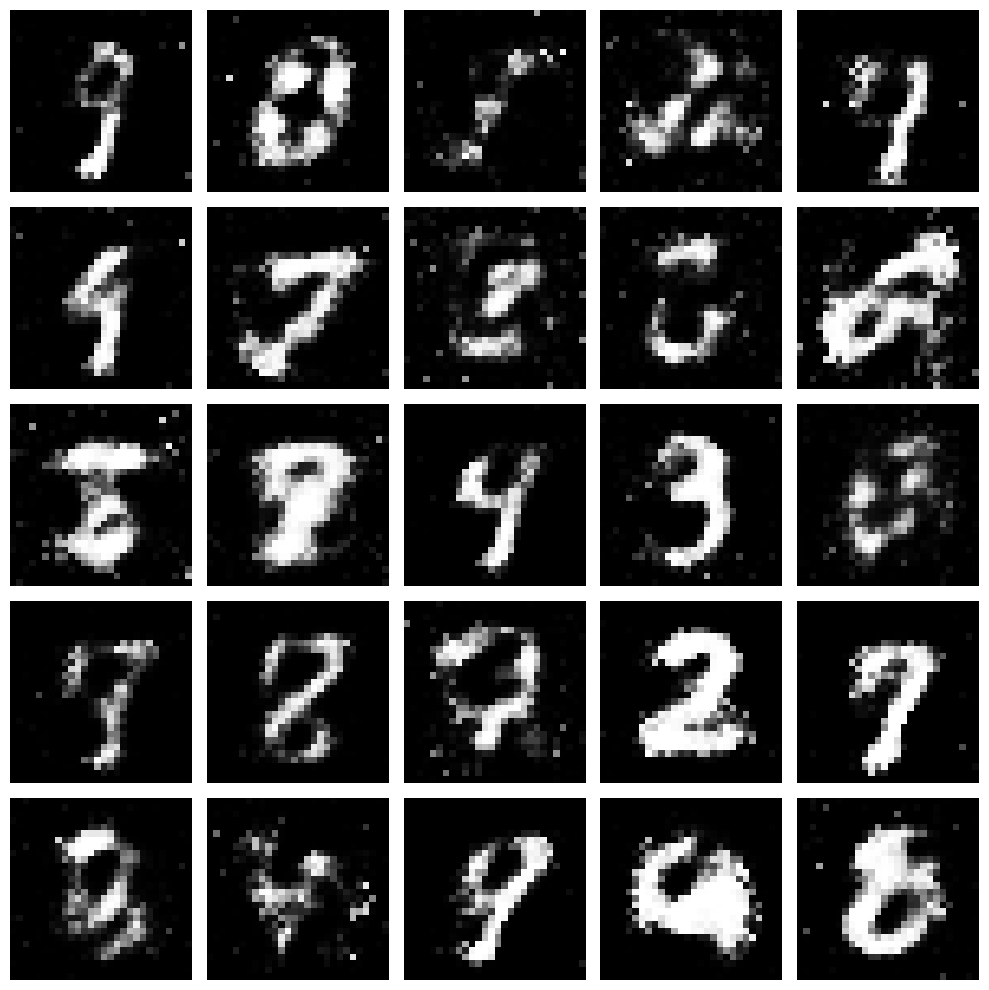

epoch: 44100, d_loss: 0.42397618293762207, g_loss: 1.7238775491714478
epoch: 44200, d_loss: 0.4242623448371887, g_loss: 1.7229853868484497
epoch: 44300, d_loss: 0.4246097207069397, g_loss: 1.7221412658691406
epoch: 44400, d_loss: 0.42500853538513184, g_loss: 1.7211421728134155
epoch: 44500, d_loss: 0.4252926707267761, g_loss: 1.7203298807144165
epoch: 44600, d_loss: 0.4256613552570343, g_loss: 1.7193571329116821
epoch: 44700, d_loss: 0.42595386505126953, g_loss: 1.7184991836547852
epoch: 44800, d_loss: 0.4263155460357666, g_loss: 1.7175339460372925
epoch: 44900, d_loss: 0.426653653383255, g_loss: 1.7165989875793457
epoch: 45000, d_loss: 0.4269523620605469, g_loss: 1.7157585620880127


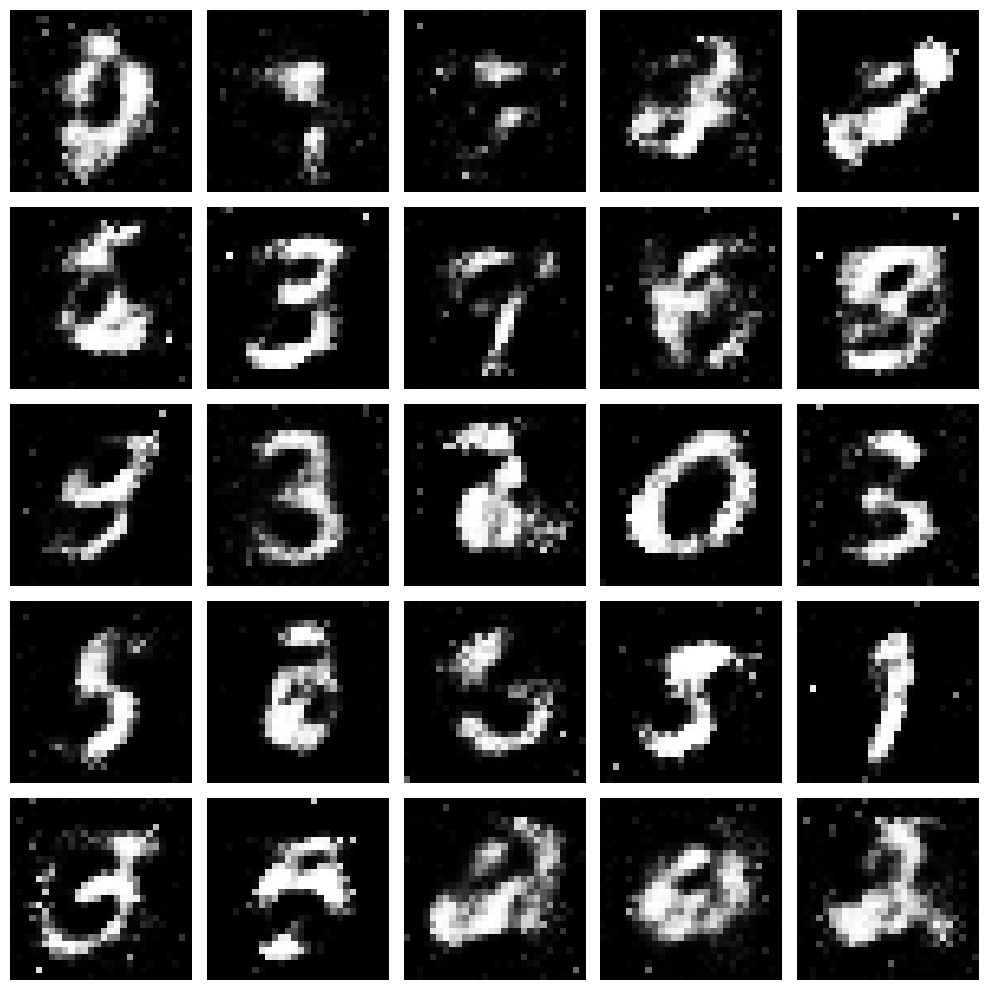

epoch: 45100, d_loss: 0.4272981286048889, g_loss: 1.7148138284683228
epoch: 45200, d_loss: 0.42761358618736267, g_loss: 1.713929295539856
epoch: 45300, d_loss: 0.4279598593711853, g_loss: 1.7129911184310913
epoch: 45400, d_loss: 0.4282376170158386, g_loss: 1.7121391296386719
epoch: 45500, d_loss: 0.4285631775856018, g_loss: 1.7112135887145996
epoch: 45600, d_loss: 0.42886659502983093, g_loss: 1.710357904434204
epoch: 45700, d_loss: 0.4291446805000305, g_loss: 1.7095602750778198
epoch: 45800, d_loss: 0.4294816255569458, g_loss: 1.708685040473938
epoch: 45900, d_loss: 0.4297908544540405, g_loss: 1.7077809572219849
epoch: 46000, d_loss: 0.4300825595855713, g_loss: 1.7069340944290161


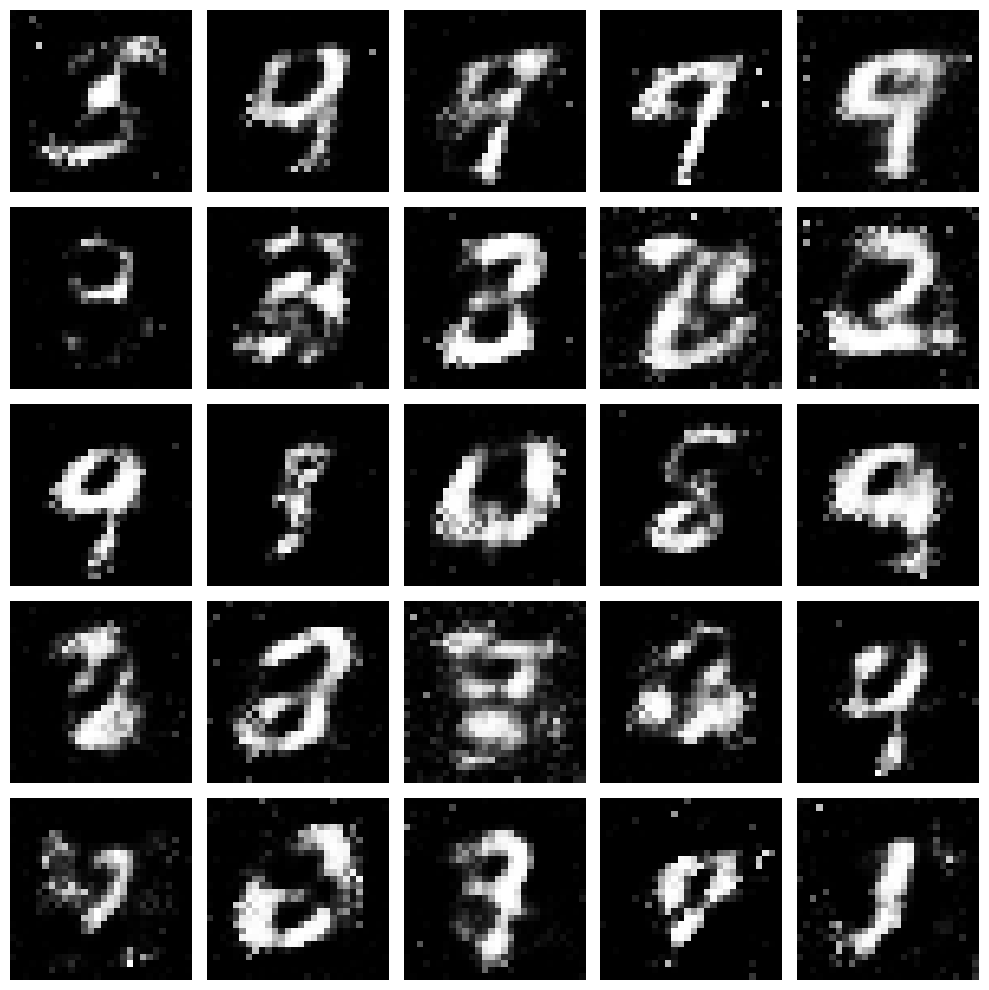

epoch: 46100, d_loss: 0.4304187297821045, g_loss: 1.7060521841049194
epoch: 46200, d_loss: 0.4307401776313782, g_loss: 1.7051811218261719
epoch: 46300, d_loss: 0.43106889724731445, g_loss: 1.7042930126190186
epoch: 46400, d_loss: 0.4313739836215973, g_loss: 1.7034140825271606
epoch: 46500, d_loss: 0.43172723054885864, g_loss: 1.7025266885757446
epoch: 46600, d_loss: 0.43204623460769653, g_loss: 1.701633095741272
epoch: 46700, d_loss: 0.4323374032974243, g_loss: 1.7008044719696045
epoch: 46800, d_loss: 0.43274223804473877, g_loss: 1.699792504310608
epoch: 46900, d_loss: 0.43296295404434204, g_loss: 1.6990644931793213
epoch: 47000, d_loss: 0.43334469199180603, g_loss: 1.6981185674667358


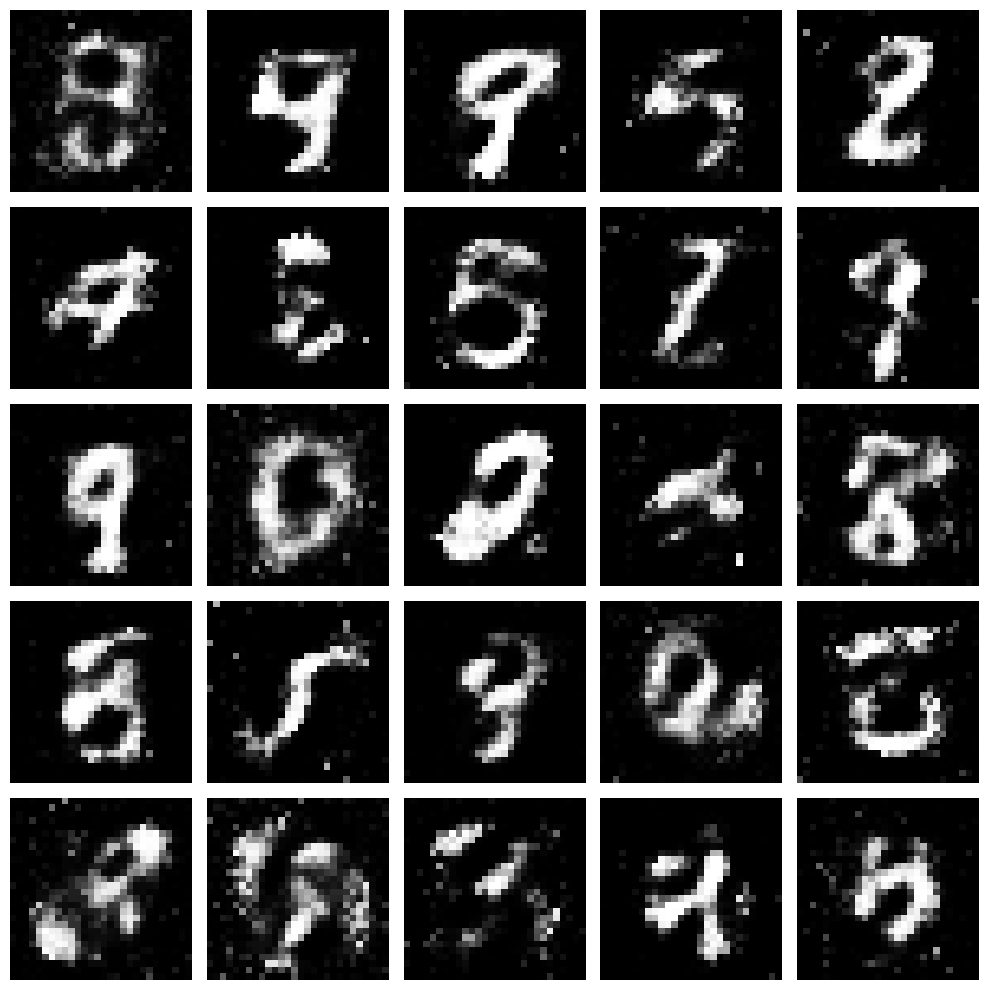

epoch: 47100, d_loss: 0.4336877763271332, g_loss: 1.6971896886825562
epoch: 47200, d_loss: 0.4339958429336548, g_loss: 1.6963417530059814
epoch: 47300, d_loss: 0.4342867136001587, g_loss: 1.6955156326293945
epoch: 47400, d_loss: 0.4346402883529663, g_loss: 1.694575548171997
epoch: 47500, d_loss: 0.43494558334350586, g_loss: 1.6937180757522583
epoch: 47600, d_loss: 0.43529272079467773, g_loss: 1.6928175687789917
epoch: 47700, d_loss: 0.4355960488319397, g_loss: 1.6920143365859985
epoch: 47800, d_loss: 0.43591147661209106, g_loss: 1.6911070346832275
epoch: 47900, d_loss: 0.43621814250946045, g_loss: 1.6901906728744507
epoch: 48000, d_loss: 0.43654584884643555, g_loss: 1.6893150806427002


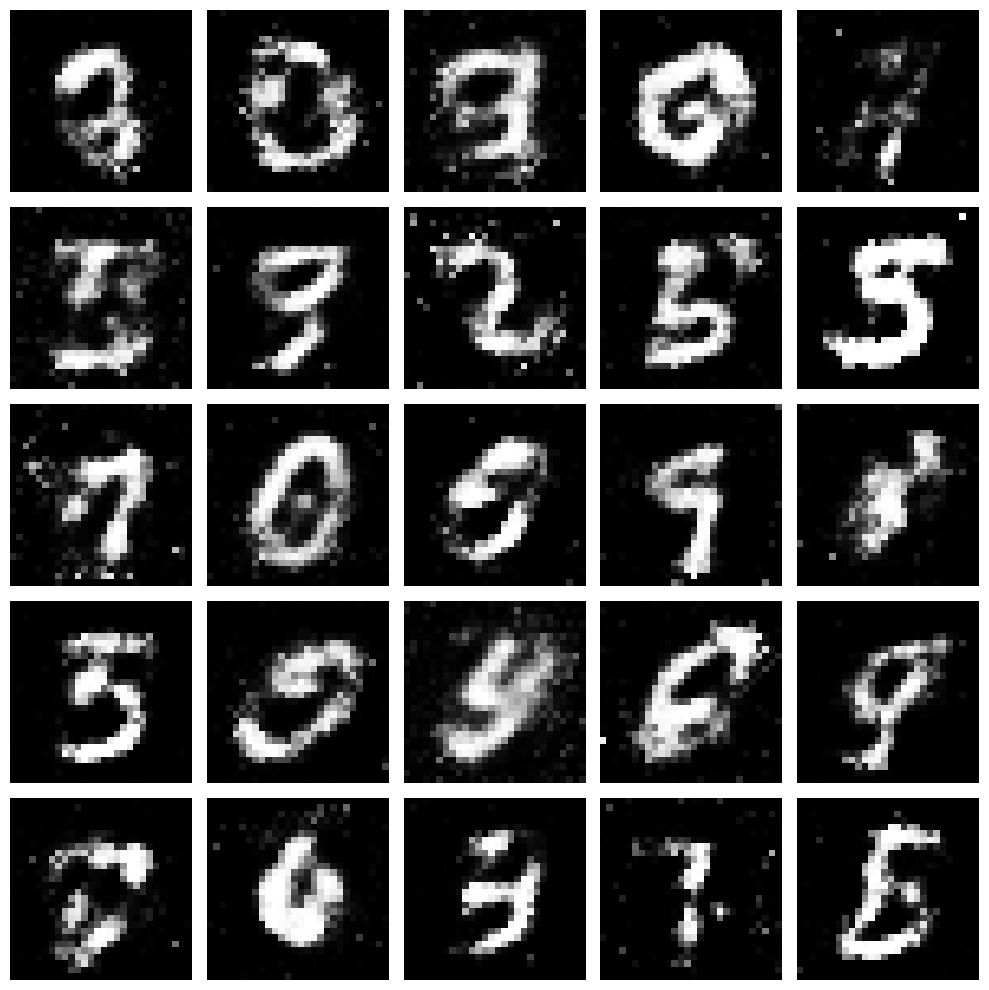

epoch: 48100, d_loss: 0.4368557929992676, g_loss: 1.6884539127349854
epoch: 48200, d_loss: 0.4371887743473053, g_loss: 1.6875689029693604
epoch: 48300, d_loss: 0.4374557435512543, g_loss: 1.6867632865905762
epoch: 48400, d_loss: 0.43776220083236694, g_loss: 1.6859216690063477
epoch: 48500, d_loss: 0.4380428194999695, g_loss: 1.6850519180297852
epoch: 48600, d_loss: 0.43838411569595337, g_loss: 1.684144139289856
epoch: 48700, d_loss: 0.4386513829231262, g_loss: 1.683294415473938
epoch: 48800, d_loss: 0.4389718770980835, g_loss: 1.6824580430984497
epoch: 48900, d_loss: 0.43926823139190674, g_loss: 1.6816035509109497
epoch: 49000, d_loss: 0.43952369689941406, g_loss: 1.6808115243911743


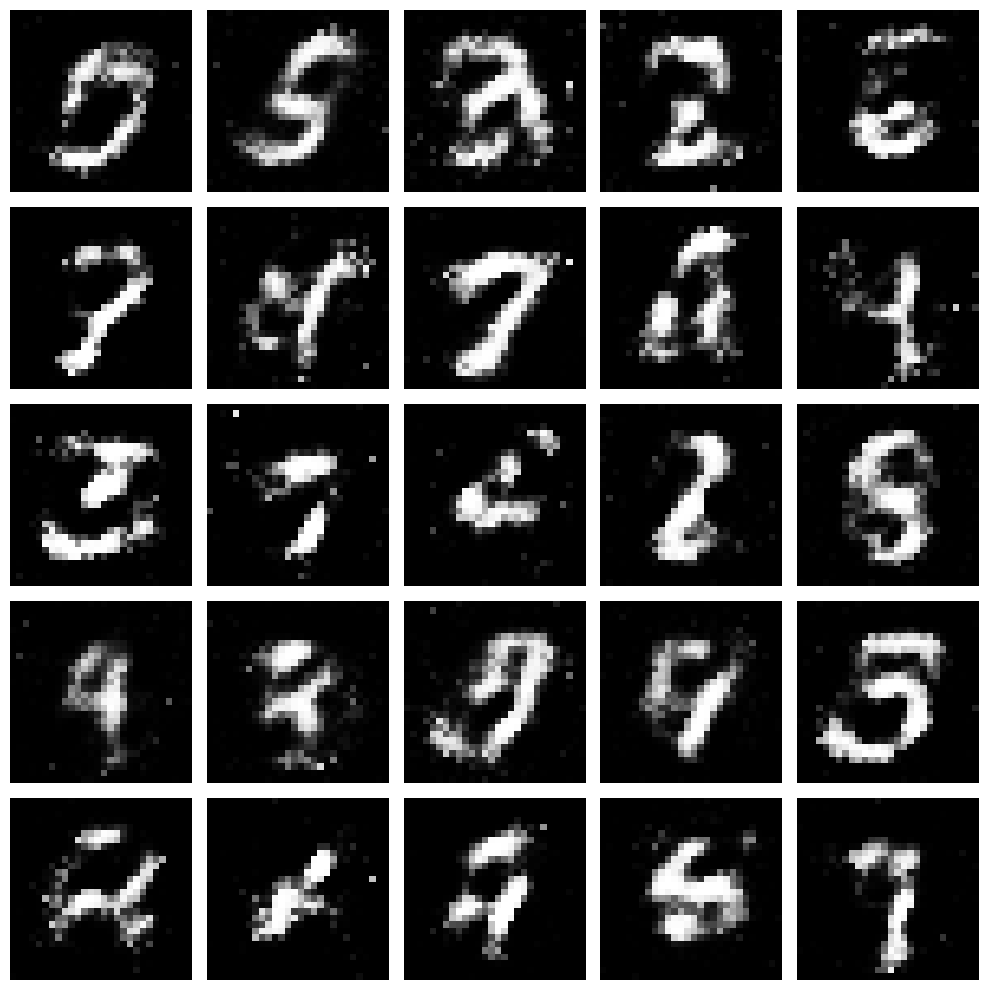

epoch: 49100, d_loss: 0.4398452937602997, g_loss: 1.6799464225769043
epoch: 49200, d_loss: 0.44008535146713257, g_loss: 1.6791882514953613
epoch: 49300, d_loss: 0.4404255151748657, g_loss: 1.6782805919647217
epoch: 49400, d_loss: 0.4406770169734955, g_loss: 1.6774706840515137
epoch: 49500, d_loss: 0.4409385621547699, g_loss: 1.676731824874878
epoch: 49600, d_loss: 0.441261887550354, g_loss: 1.67586350440979
epoch: 49700, d_loss: 0.44151780009269714, g_loss: 1.6750766038894653
epoch: 49800, d_loss: 0.4417857825756073, g_loss: 1.6743053197860718
epoch: 49900, d_loss: 0.4420718550682068, g_loss: 1.6734800338745117
epoch: 50000, d_loss: 0.4423601031303406, g_loss: 1.672634243965149


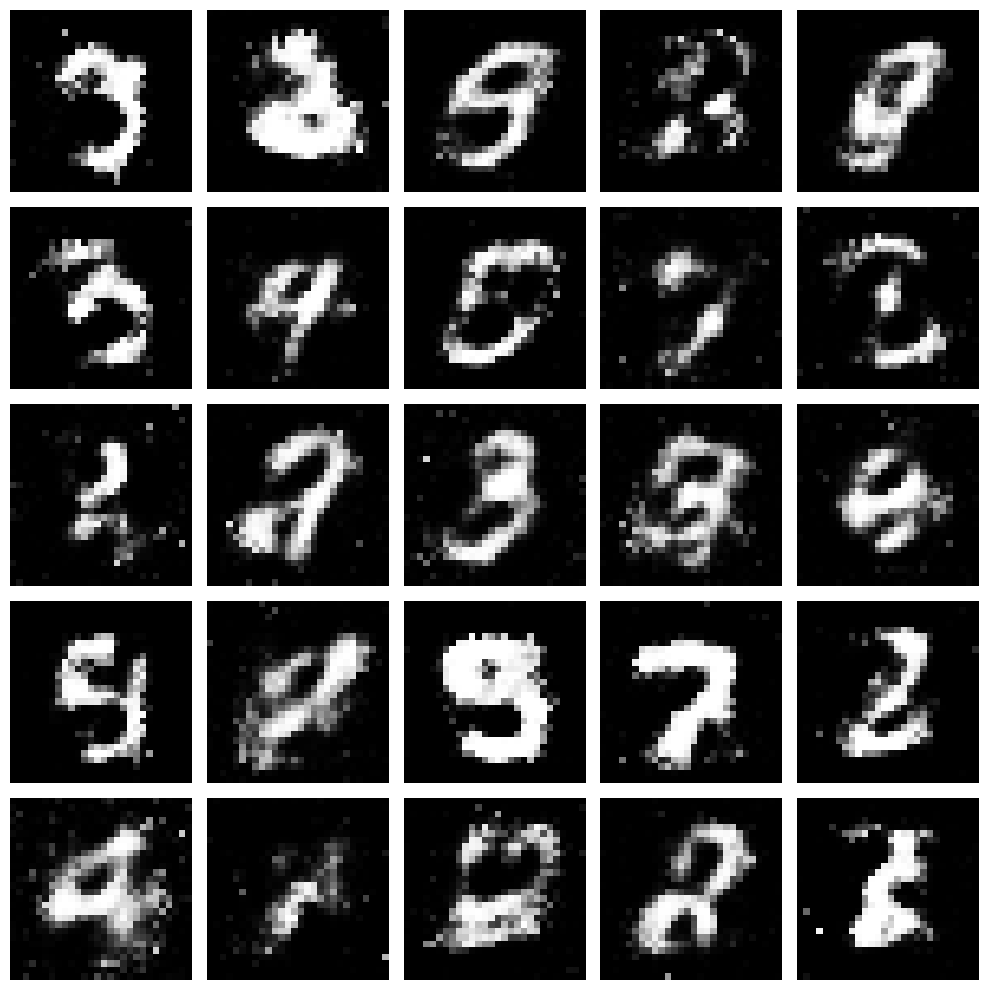

epoch: 50100, d_loss: 0.4426174759864807, g_loss: 1.671796202659607
epoch: 50200, d_loss: 0.44292765855789185, g_loss: 1.6709213256835938
epoch: 50300, d_loss: 0.4431920349597931, g_loss: 1.6700998544692993
epoch: 50400, d_loss: 0.4434167742729187, g_loss: 1.6693322658538818
epoch: 50500, d_loss: 0.4437445402145386, g_loss: 1.6684263944625854
epoch: 50600, d_loss: 0.4439910054206848, g_loss: 1.6676074266433716
epoch: 50700, d_loss: 0.4442727565765381, g_loss: 1.6667779684066772
epoch: 50800, d_loss: 0.4445694088935852, g_loss: 1.6660172939300537
epoch: 50900, d_loss: 0.4448363184928894, g_loss: 1.6652050018310547
epoch: 51000, d_loss: 0.4451061487197876, g_loss: 1.6644343137741089


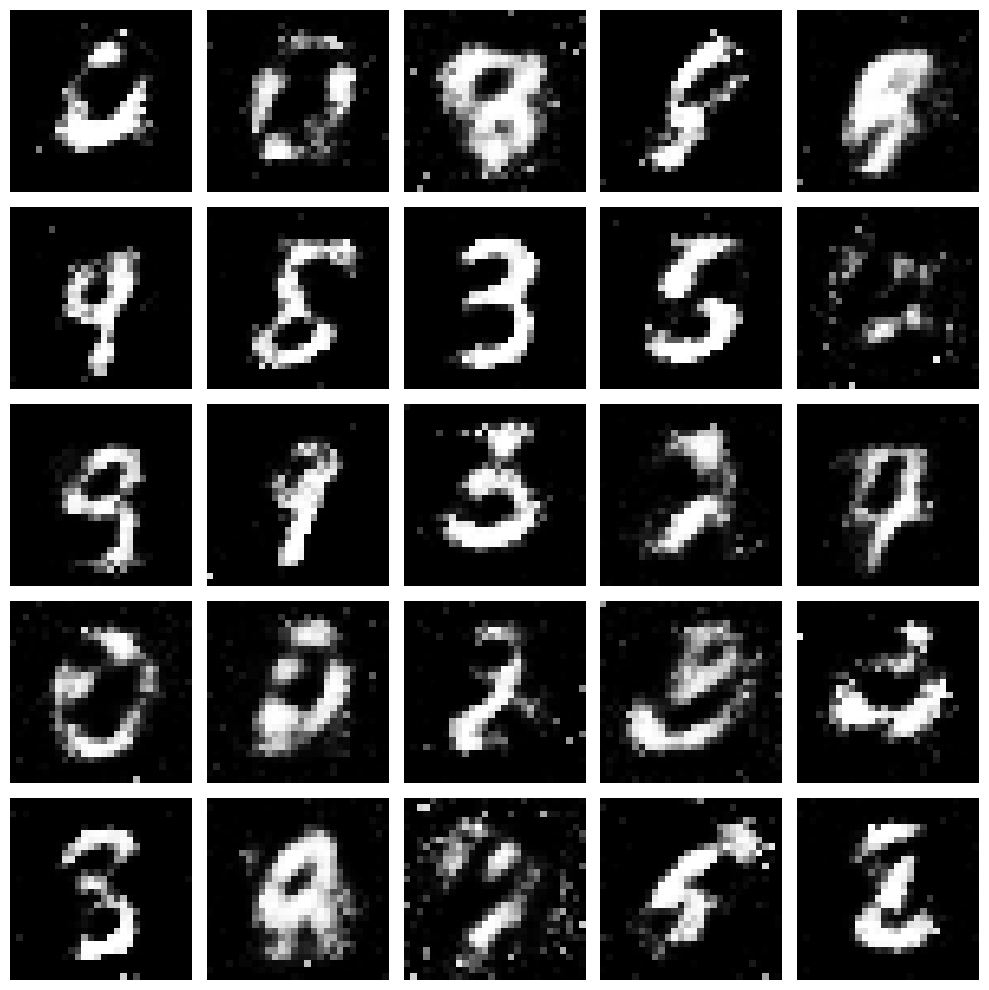

epoch: 51100, d_loss: 0.44538652896881104, g_loss: 1.6636474132537842
epoch: 51200, d_loss: 0.4456843435764313, g_loss: 1.662787675857544
epoch: 51300, d_loss: 0.44592440128326416, g_loss: 1.662005066871643
epoch: 51400, d_loss: 0.44622987508773804, g_loss: 1.6611236333847046
epoch: 51500, d_loss: 0.446493923664093, g_loss: 1.6603281497955322
epoch: 51600, d_loss: 0.4467770457267761, g_loss: 1.6595059633255005
epoch: 51700, d_loss: 0.4470343589782715, g_loss: 1.6586990356445312
epoch: 51800, d_loss: 0.44726231694221497, g_loss: 1.6579675674438477
epoch: 51900, d_loss: 0.4475517272949219, g_loss: 1.6571382284164429
epoch: 52000, d_loss: 0.4477897882461548, g_loss: 1.6564056873321533


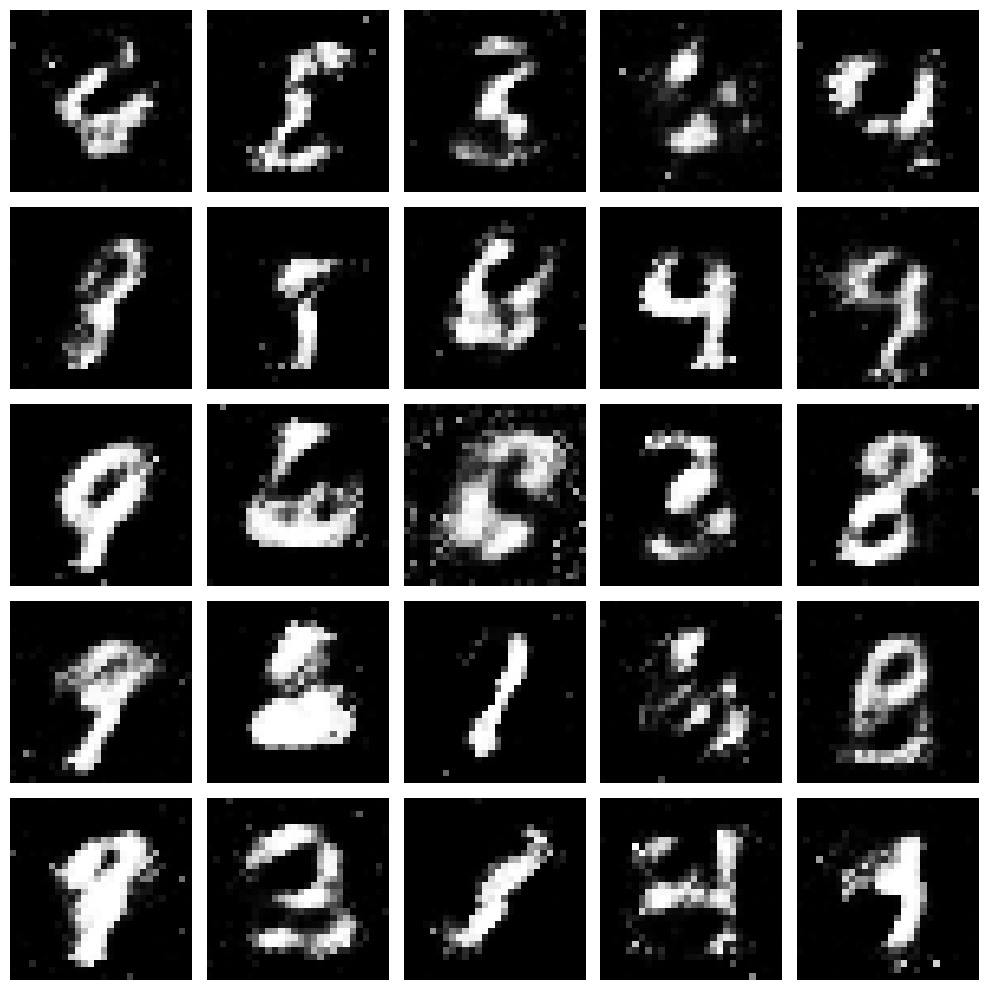

epoch: 52100, d_loss: 0.4480716586112976, g_loss: 1.6556038856506348
epoch: 52200, d_loss: 0.44833120703697205, g_loss: 1.6548017263412476
epoch: 52300, d_loss: 0.4485950469970703, g_loss: 1.653958797454834
epoch: 52400, d_loss: 0.448864221572876, g_loss: 1.6531658172607422
epoch: 52500, d_loss: 0.449139267206192, g_loss: 1.652372121810913
epoch: 52600, d_loss: 0.44939738512039185, g_loss: 1.651602864265442
epoch: 52700, d_loss: 0.44965022802352905, g_loss: 1.6508727073669434
epoch: 52800, d_loss: 0.4499037563800812, g_loss: 1.6501120328903198
epoch: 52900, d_loss: 0.45015931129455566, g_loss: 1.6493842601776123
epoch: 53000, d_loss: 0.4504204988479614, g_loss: 1.6486600637435913


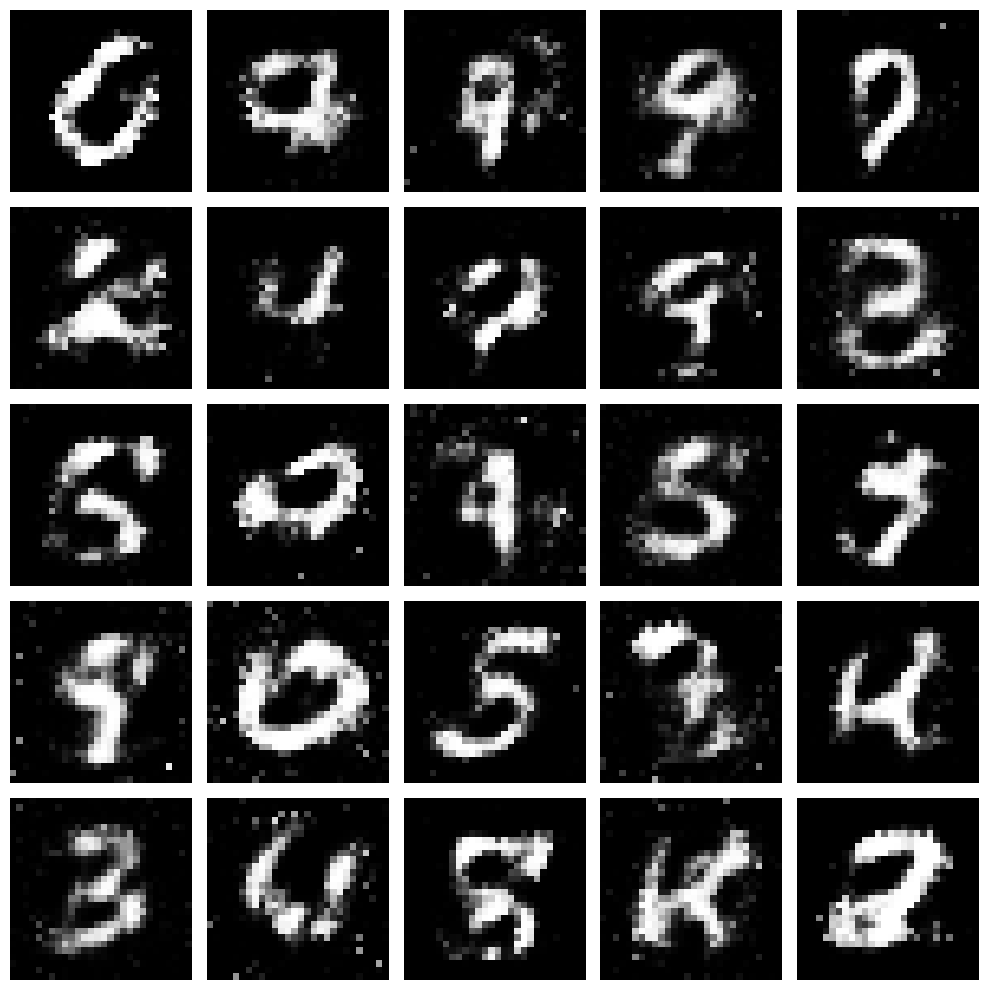

epoch: 53100, d_loss: 0.45068421959877014, g_loss: 1.647875428199768
epoch: 53200, d_loss: 0.45093482732772827, g_loss: 1.6471247673034668
epoch: 53300, d_loss: 0.45121583342552185, g_loss: 1.6463379859924316
epoch: 53400, d_loss: 0.45142191648483276, g_loss: 1.6456384658813477
epoch: 53500, d_loss: 0.4517086446285248, g_loss: 1.6448311805725098
epoch: 53600, d_loss: 0.45195138454437256, g_loss: 1.6441010236740112
epoch: 53700, d_loss: 0.4521874189376831, g_loss: 1.6433353424072266
epoch: 53800, d_loss: 0.4524570107460022, g_loss: 1.6425362825393677
epoch: 53900, d_loss: 0.45270034670829773, g_loss: 1.6417975425720215
epoch: 54000, d_loss: 0.4529605507850647, g_loss: 1.641031265258789


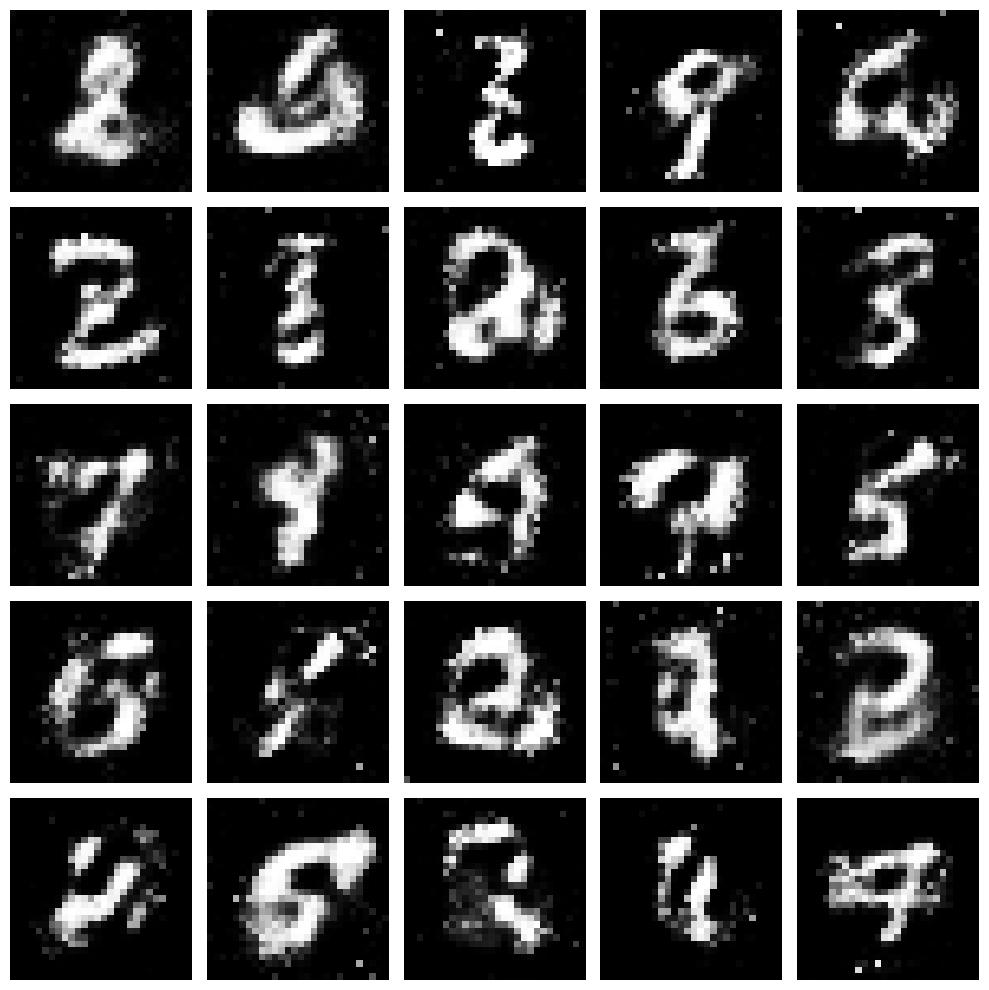

epoch: 54100, d_loss: 0.4531916081905365, g_loss: 1.640317678451538
epoch: 54200, d_loss: 0.45346808433532715, g_loss: 1.6395354270935059
epoch: 54300, d_loss: 0.4537050724029541, g_loss: 1.6388229131698608
epoch: 54400, d_loss: 0.45396870374679565, g_loss: 1.6380233764648438
epoch: 54500, d_loss: 0.4542081952095032, g_loss: 1.6372987031936646
epoch: 54600, d_loss: 0.454488605260849, g_loss: 1.6365115642547607
epoch: 54700, d_loss: 0.4547118544578552, g_loss: 1.6357643604278564
epoch: 54800, d_loss: 0.45497292280197144, g_loss: 1.6349923610687256
epoch: 54900, d_loss: 0.45522046089172363, g_loss: 1.634244680404663
epoch: 55000, d_loss: 0.4554640054702759, g_loss: 1.6334900856018066


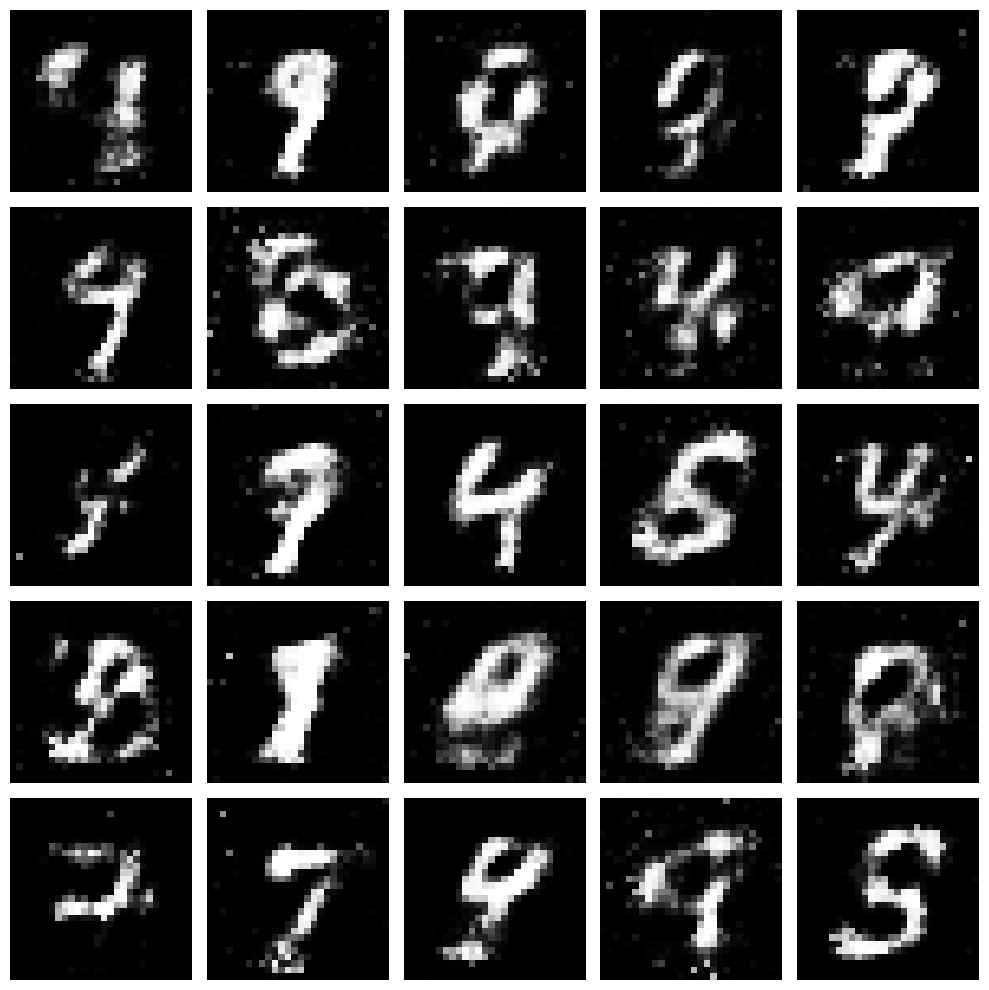

epoch: 55100, d_loss: 0.4557303786277771, g_loss: 1.6326911449432373
epoch: 55200, d_loss: 0.45596176385879517, g_loss: 1.6319565773010254
epoch: 55300, d_loss: 0.45618748664855957, g_loss: 1.6312323808670044
epoch: 55400, d_loss: 0.4564458727836609, g_loss: 1.6304938793182373
epoch: 55500, d_loss: 0.4566749036312103, g_loss: 1.6297513246536255
epoch: 55600, d_loss: 0.4569419026374817, g_loss: 1.628972053527832
epoch: 55700, d_loss: 0.45716434717178345, g_loss: 1.6282620429992676
epoch: 55800, d_loss: 0.4574160575866699, g_loss: 1.6275217533111572
epoch: 55900, d_loss: 0.4576358199119568, g_loss: 1.626800537109375
epoch: 56000, d_loss: 0.4578781723976135, g_loss: 1.6260794401168823


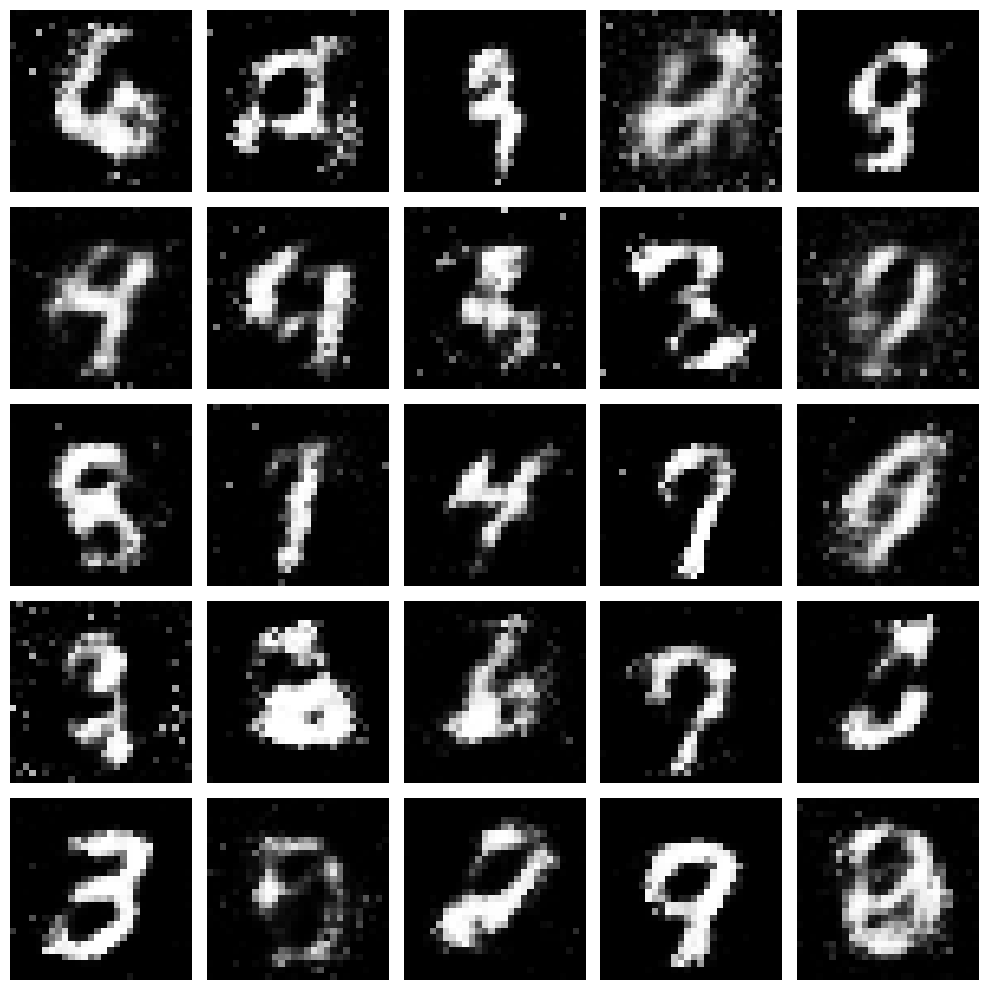

epoch: 56100, d_loss: 0.4581042230129242, g_loss: 1.6253652572631836
epoch: 56200, d_loss: 0.45833373069763184, g_loss: 1.624657154083252
epoch: 56300, d_loss: 0.45858532190322876, g_loss: 1.6239038705825806
epoch: 56400, d_loss: 0.4587966799736023, g_loss: 1.6232216358184814
epoch: 56500, d_loss: 0.459049254655838, g_loss: 1.6224381923675537
epoch: 56600, d_loss: 0.45926421880722046, g_loss: 1.6217193603515625
epoch: 56700, d_loss: 0.4594900906085968, g_loss: 1.62100350856781
epoch: 56800, d_loss: 0.4597281813621521, g_loss: 1.6202771663665771
epoch: 56900, d_loss: 0.45995986461639404, g_loss: 1.6196004152297974
epoch: 57000, d_loss: 0.46015965938568115, g_loss: 1.6189243793487549


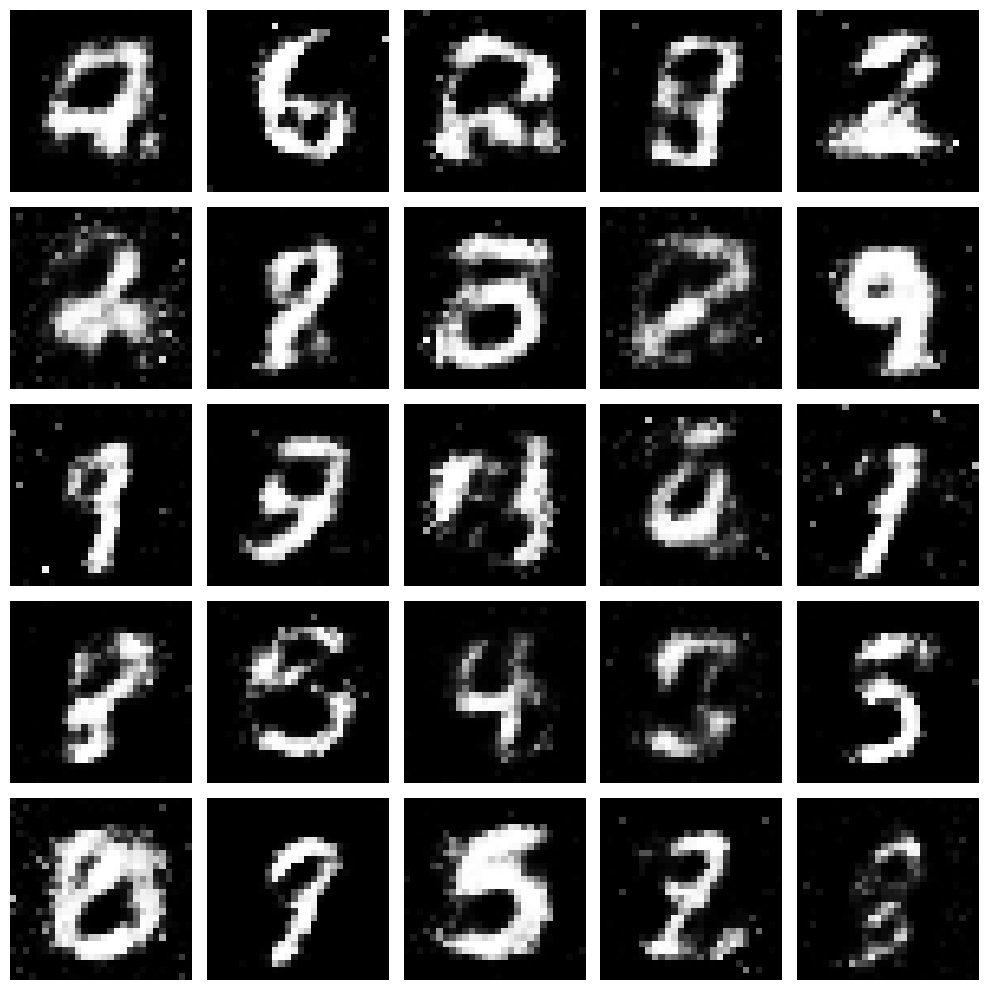

epoch: 57100, d_loss: 0.4604164958000183, g_loss: 1.6181635856628418
epoch: 57200, d_loss: 0.4606153070926666, g_loss: 1.617527723312378
epoch: 57300, d_loss: 0.460871160030365, g_loss: 1.6167776584625244
epoch: 57400, d_loss: 0.46108707785606384, g_loss: 1.6160993576049805
epoch: 57500, d_loss: 0.46130654215812683, g_loss: 1.6153881549835205
epoch: 57600, d_loss: 0.4615158438682556, g_loss: 1.6147369146347046
epoch: 57700, d_loss: 0.4617806673049927, g_loss: 1.613999843597412
epoch: 57800, d_loss: 0.46199384331703186, g_loss: 1.6133135557174683
epoch: 57900, d_loss: 0.4622225761413574, g_loss: 1.6125843524932861
epoch: 58000, d_loss: 0.46249109506607056, g_loss: 1.6118483543395996


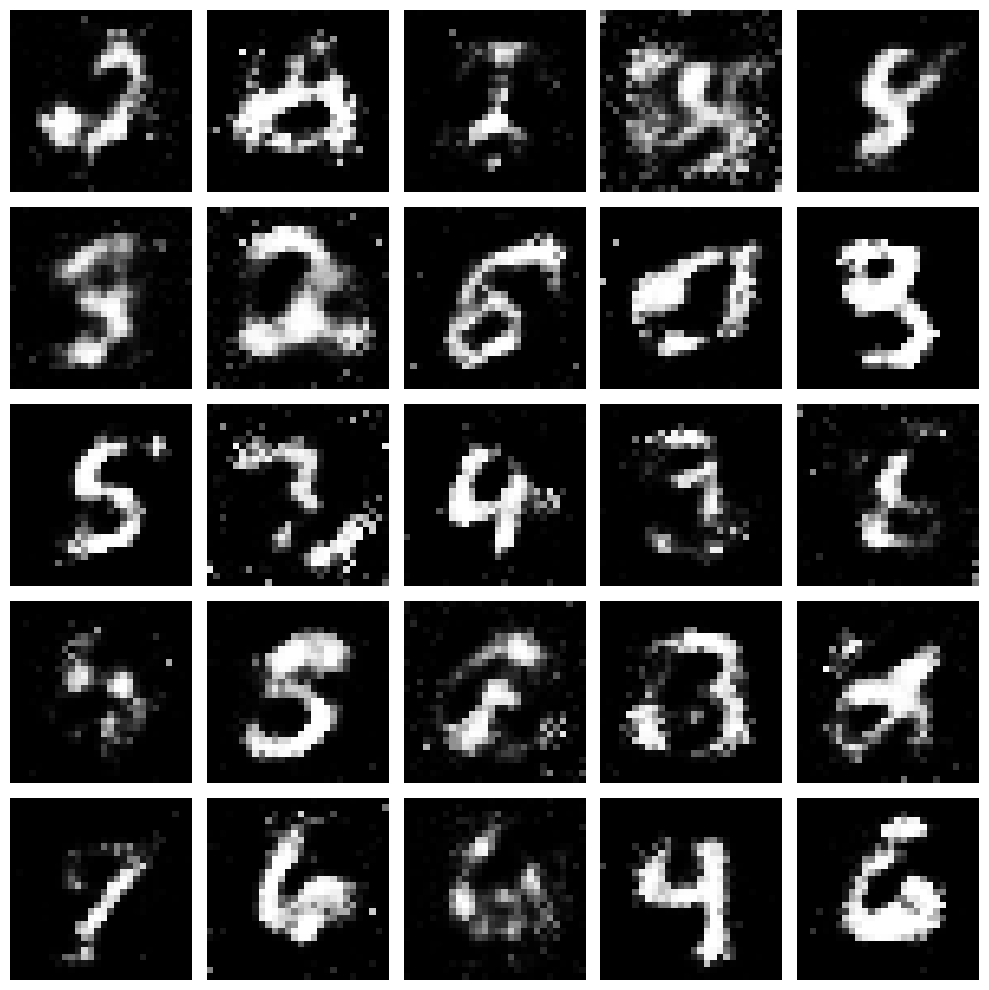

epoch: 58100, d_loss: 0.46264946460723877, g_loss: 1.6112093925476074
epoch: 58200, d_loss: 0.46293216943740845, g_loss: 1.6104168891906738
epoch: 58300, d_loss: 0.46311622858047485, g_loss: 1.6097971200942993
epoch: 58400, d_loss: 0.46337389945983887, g_loss: 1.6090465784072876
epoch: 58500, d_loss: 0.4635764956474304, g_loss: 1.608378529548645
epoch: 58600, d_loss: 0.46381205320358276, g_loss: 1.6076617240905762
epoch: 58700, d_loss: 0.46404457092285156, g_loss: 1.6069440841674805
epoch: 58800, d_loss: 0.464241087436676, g_loss: 1.6062945127487183
epoch: 58900, d_loss: 0.4644594192504883, g_loss: 1.605604648590088
epoch: 59000, d_loss: 0.4646936058998108, g_loss: 1.6048787832260132


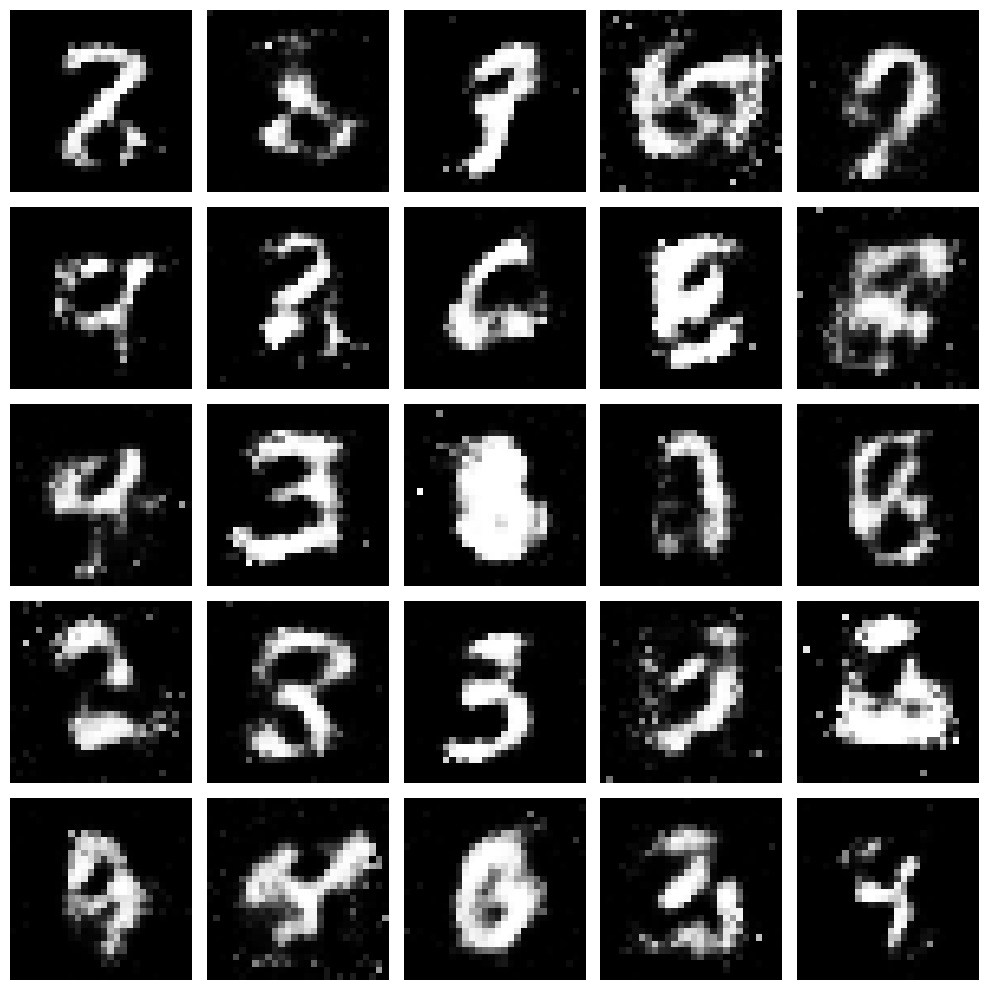

epoch: 59100, d_loss: 0.4649009108543396, g_loss: 1.604233741760254
epoch: 59200, d_loss: 0.46512508392333984, g_loss: 1.603515386581421
epoch: 59300, d_loss: 0.46532338857650757, g_loss: 1.6028525829315186
epoch: 59400, d_loss: 0.46556389331817627, g_loss: 1.6021674871444702
epoch: 59500, d_loss: 0.46575403213500977, g_loss: 1.601531744003296
epoch: 59600, d_loss: 0.46599245071411133, g_loss: 1.600809931755066
epoch: 59700, d_loss: 0.46617743372917175, g_loss: 1.6001994609832764
epoch: 59800, d_loss: 0.4664244055747986, g_loss: 1.5994995832443237
epoch: 59900, d_loss: 0.4666031002998352, g_loss: 1.5988935232162476
epoch: 60000, d_loss: 0.46683716773986816, g_loss: 1.5982142686843872


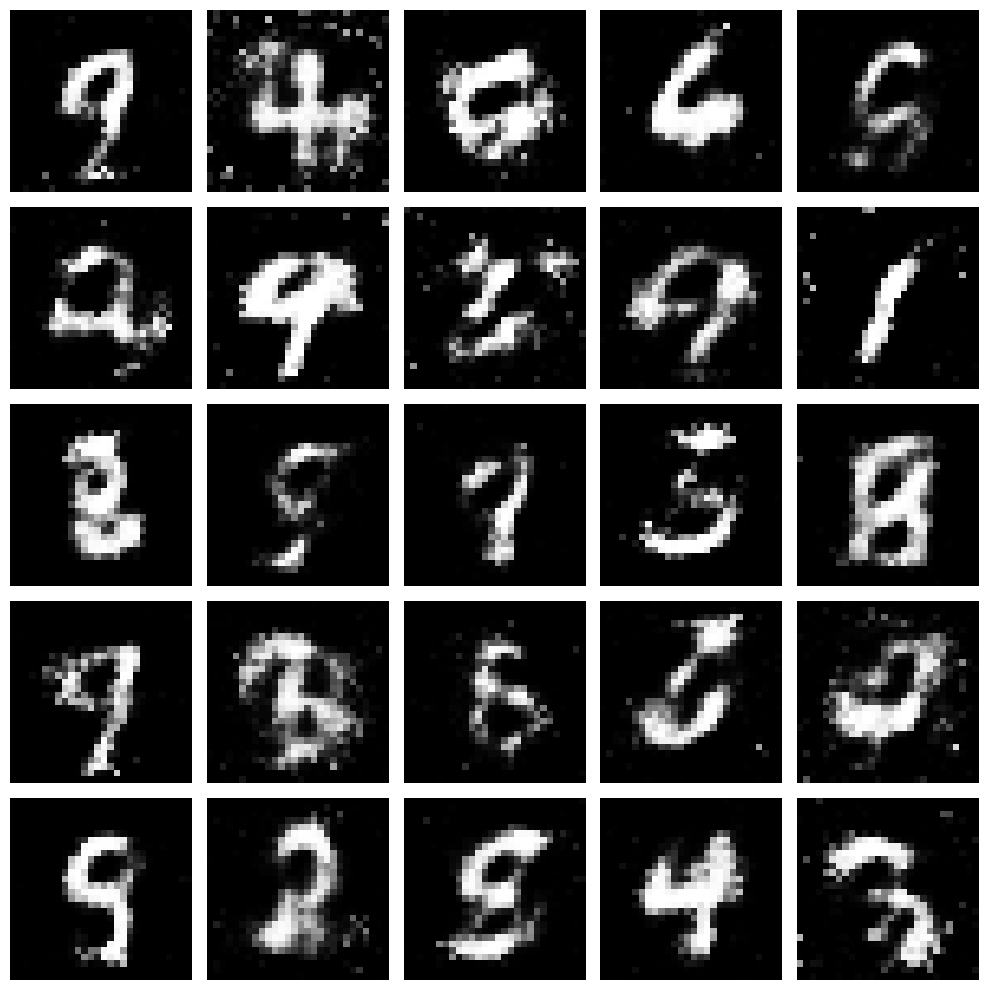

epoch: 60100, d_loss: 0.4670478105545044, g_loss: 1.5975658893585205
epoch: 60200, d_loss: 0.46726852655410767, g_loss: 1.5969070196151733
epoch: 60300, d_loss: 0.4674638509750366, g_loss: 1.5963001251220703
epoch: 60400, d_loss: 0.4676933288574219, g_loss: 1.5956299304962158
epoch: 60500, d_loss: 0.4678904116153717, g_loss: 1.595012903213501
epoch: 60600, d_loss: 0.46810275316238403, g_loss: 1.5943742990493774
epoch: 60700, d_loss: 0.4683225154876709, g_loss: 1.5936826467514038
epoch: 60800, d_loss: 0.46851032972335815, g_loss: 1.5930582284927368
epoch: 60900, d_loss: 0.46874135732650757, g_loss: 1.5923590660095215
epoch: 61000, d_loss: 0.468940794467926, g_loss: 1.591734766960144


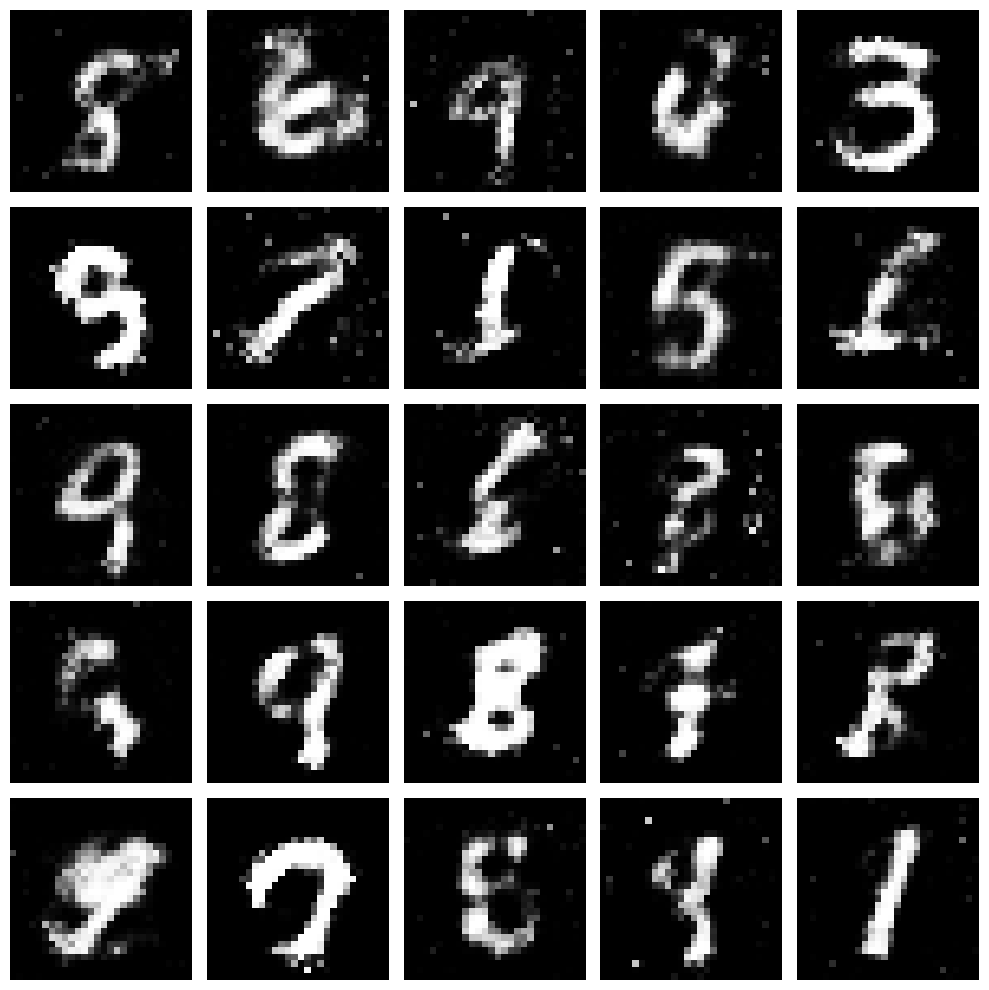

epoch: 61100, d_loss: 0.4691377282142639, g_loss: 1.5910927057266235
epoch: 61200, d_loss: 0.46933722496032715, g_loss: 1.5904672145843506
epoch: 61300, d_loss: 0.46955496072769165, g_loss: 1.5898115634918213
epoch: 61400, d_loss: 0.46975865960121155, g_loss: 1.5891321897506714
epoch: 61500, d_loss: 0.46993815898895264, g_loss: 1.5885167121887207
epoch: 61600, d_loss: 0.4701686501502991, g_loss: 1.5878477096557617
epoch: 61700, d_loss: 0.4703354239463806, g_loss: 1.587247610092163
epoch: 61800, d_loss: 0.4705578088760376, g_loss: 1.586538314819336
epoch: 61900, d_loss: 0.4707537889480591, g_loss: 1.585892677307129
epoch: 62000, d_loss: 0.47095903754234314, g_loss: 1.5852619409561157


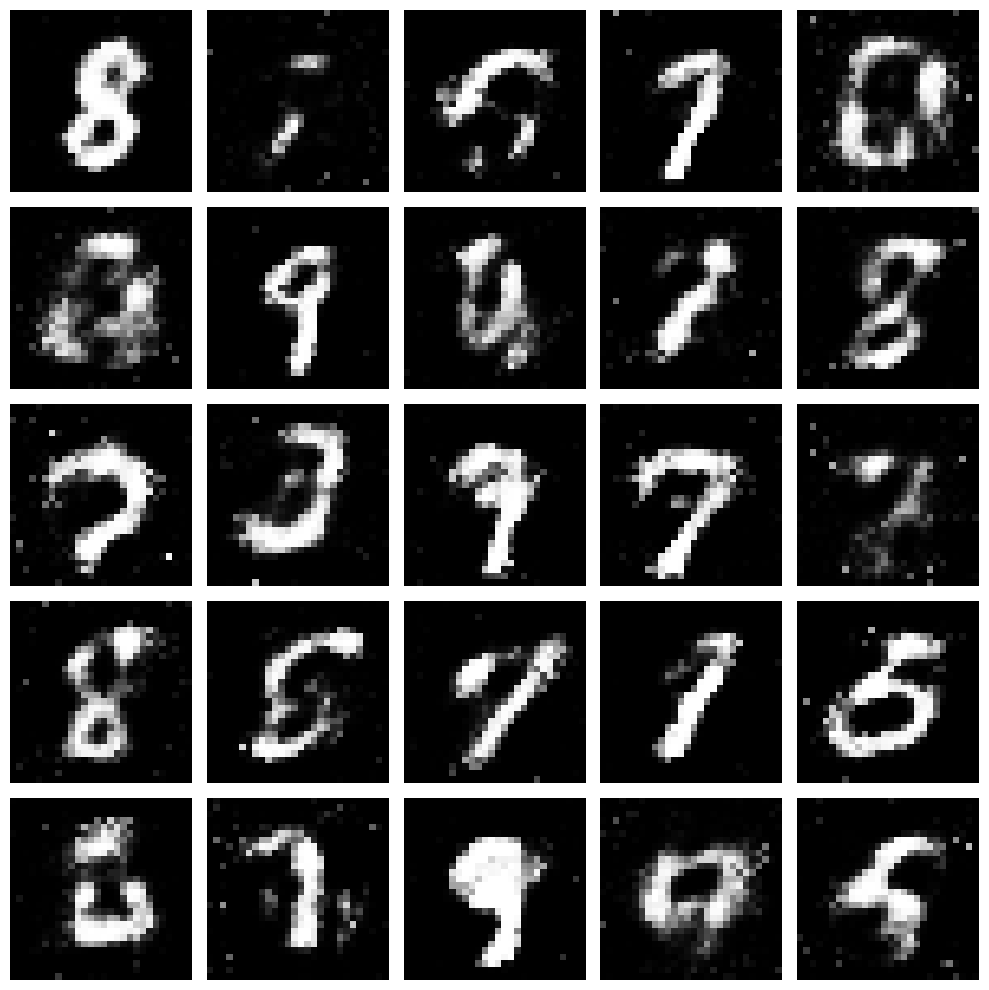

epoch: 62100, d_loss: 0.4711339473724365, g_loss: 1.584654450416565
epoch: 62200, d_loss: 0.47134941816329956, g_loss: 1.583997368812561
epoch: 62300, d_loss: 0.47153240442276, g_loss: 1.5833572149276733
epoch: 62400, d_loss: 0.47171133756637573, g_loss: 1.5827689170837402
epoch: 62500, d_loss: 0.4719349145889282, g_loss: 1.582106113433838
epoch: 62600, d_loss: 0.47211194038391113, g_loss: 1.5815057754516602
epoch: 62700, d_loss: 0.4723215103149414, g_loss: 1.5808815956115723
epoch: 62800, d_loss: 0.47249990701675415, g_loss: 1.5802829265594482
epoch: 62900, d_loss: 0.47271811962127686, g_loss: 1.5796318054199219
epoch: 63000, d_loss: 0.4728880524635315, g_loss: 1.5790419578552246


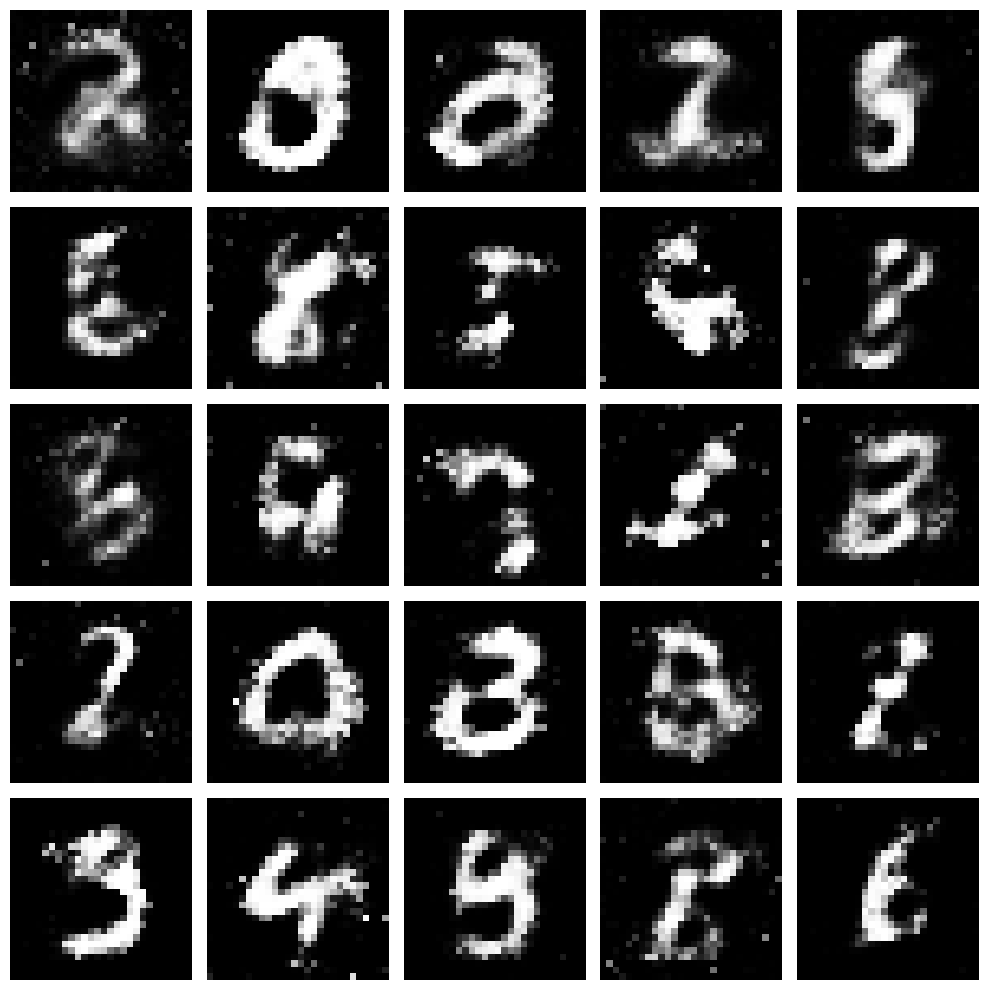

epoch: 63100, d_loss: 0.4730989933013916, g_loss: 1.578378438949585
epoch: 63200, d_loss: 0.473288893699646, g_loss: 1.577751636505127
epoch: 63300, d_loss: 0.4734695553779602, g_loss: 1.57716965675354
epoch: 63400, d_loss: 0.47367191314697266, g_loss: 1.5765483379364014
epoch: 63500, d_loss: 0.47385144233703613, g_loss: 1.575965166091919
epoch: 63600, d_loss: 0.47406524419784546, g_loss: 1.5753099918365479
epoch: 63700, d_loss: 0.4742681384086609, g_loss: 1.5746783018112183
epoch: 63800, d_loss: 0.47443222999572754, g_loss: 1.5741006135940552
epoch: 63900, d_loss: 0.47464698553085327, g_loss: 1.573425054550171
epoch: 64000, d_loss: 0.4748069643974304, g_loss: 1.5728578567504883


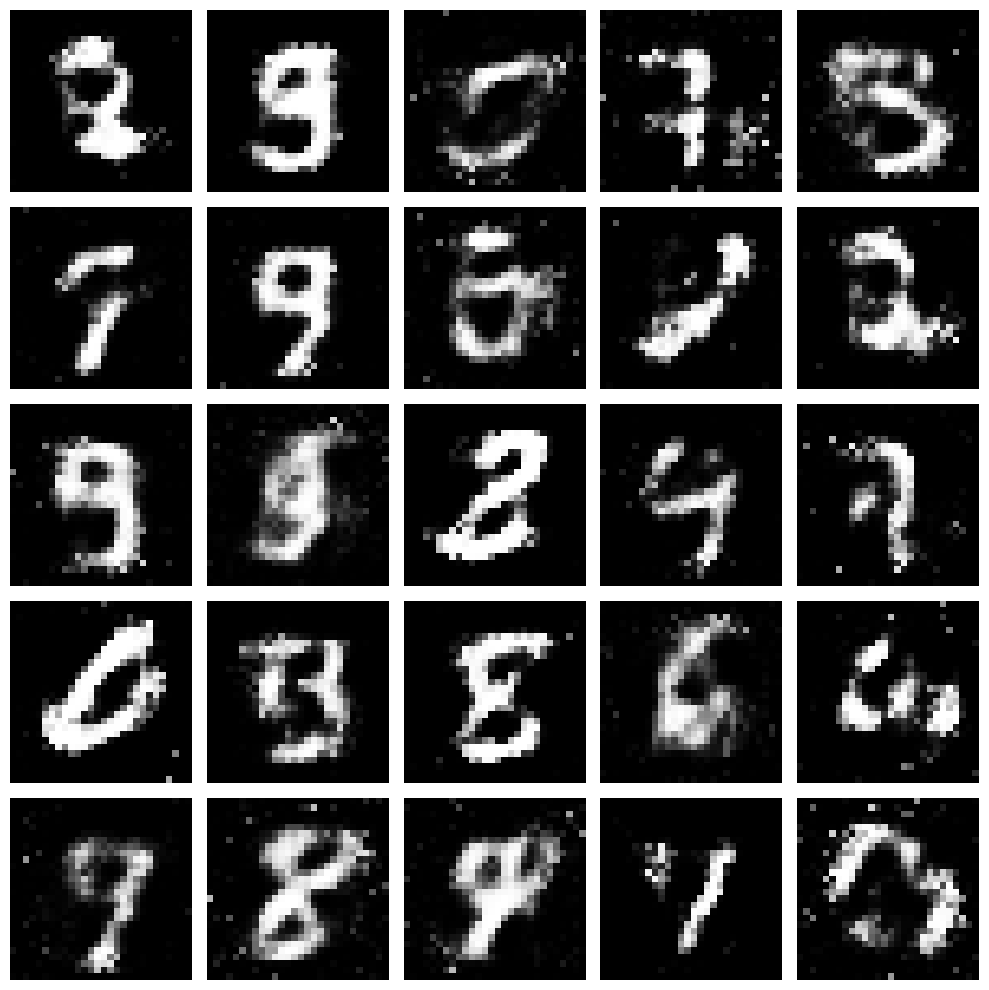

epoch: 64100, d_loss: 0.4749986529350281, g_loss: 1.5722202062606812
epoch: 64200, d_loss: 0.4751823842525482, g_loss: 1.5716403722763062
epoch: 64300, d_loss: 0.47536706924438477, g_loss: 1.5710361003875732
epoch: 64400, d_loss: 0.4755397439002991, g_loss: 1.5704289674758911
epoch: 64500, d_loss: 0.47572797536849976, g_loss: 1.5698453187942505
epoch: 64600, d_loss: 0.4759056866168976, g_loss: 1.5692732334136963
epoch: 64700, d_loss: 0.476098895072937, g_loss: 1.5686655044555664
epoch: 64800, d_loss: 0.47626253962516785, g_loss: 1.5681272745132446
epoch: 64900, d_loss: 0.4764713644981384, g_loss: 1.5674924850463867
epoch: 65000, d_loss: 0.4766225814819336, g_loss: 1.5669646263122559


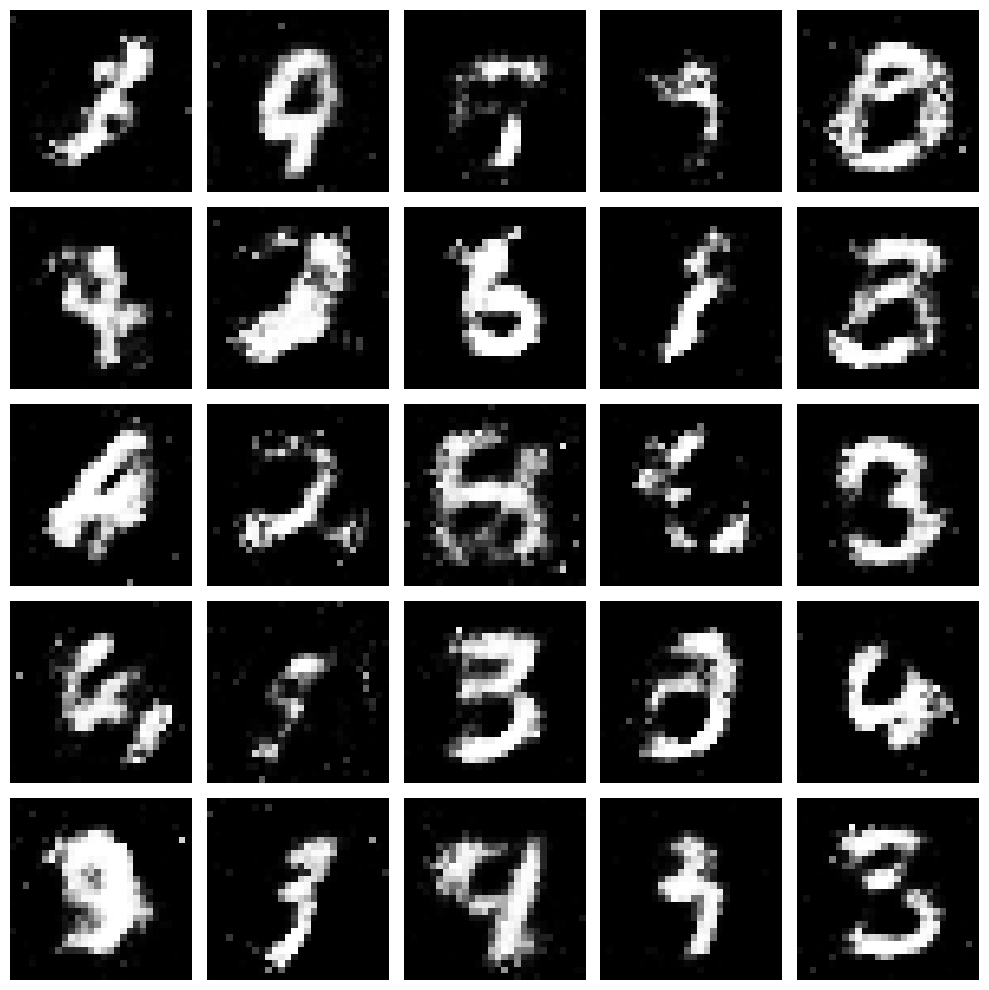

epoch: 65100, d_loss: 0.47681885957717896, g_loss: 1.5663464069366455
epoch: 65200, d_loss: 0.47698795795440674, g_loss: 1.565755844116211
epoch: 65300, d_loss: 0.47715485095977783, g_loss: 1.5651804208755493
epoch: 65400, d_loss: 0.4773581922054291, g_loss: 1.5645854473114014
epoch: 65500, d_loss: 0.477516233921051, g_loss: 1.5640249252319336
epoch: 65600, d_loss: 0.4777003228664398, g_loss: 1.5634238719940186
epoch: 65700, d_loss: 0.4778733253479004, g_loss: 1.5628705024719238
epoch: 65800, d_loss: 0.47805264592170715, g_loss: 1.5622990131378174
epoch: 65900, d_loss: 0.4782218635082245, g_loss: 1.5617408752441406
epoch: 66000, d_loss: 0.47839611768722534, g_loss: 1.5611845254898071


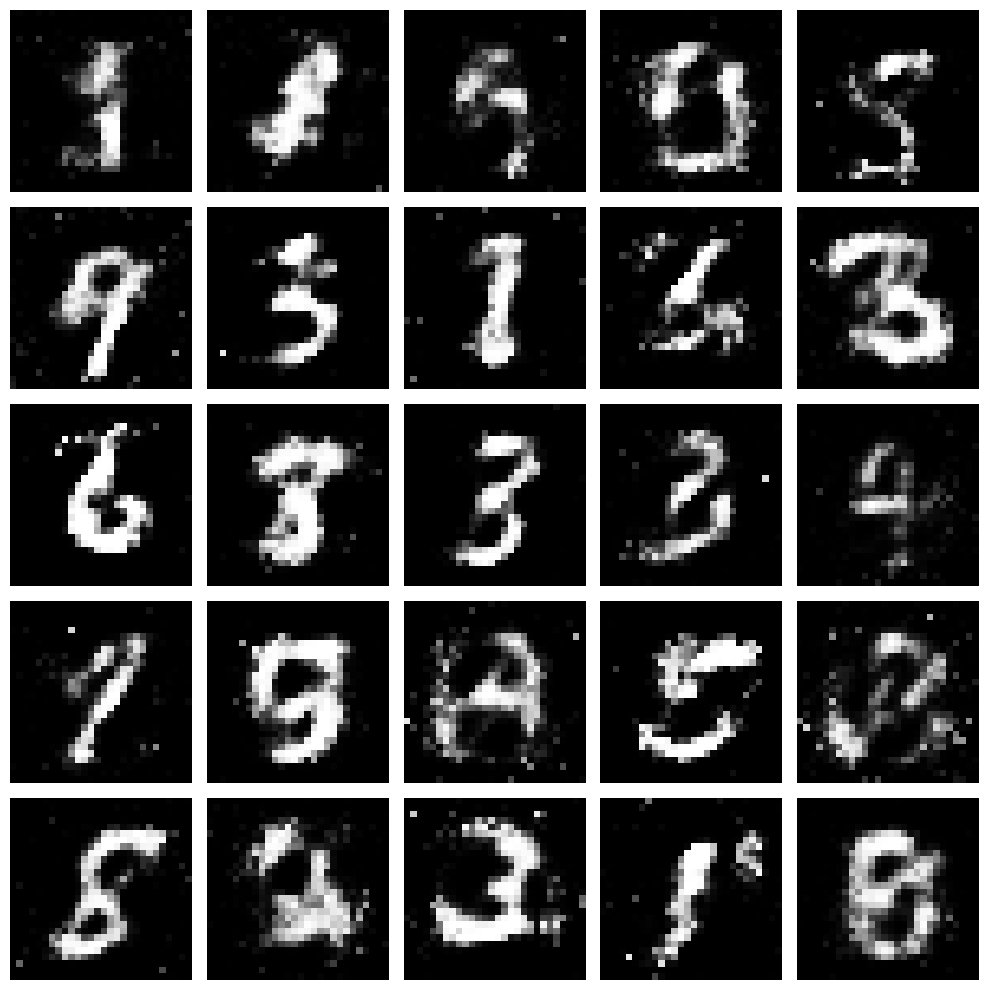

epoch: 66100, d_loss: 0.4785836338996887, g_loss: 1.5605968236923218
epoch: 66200, d_loss: 0.4787580072879791, g_loss: 1.560019612312317
epoch: 66300, d_loss: 0.47893476486206055, g_loss: 1.5594626665115356
epoch: 66400, d_loss: 0.4791070520877838, g_loss: 1.5589067935943604
epoch: 66500, d_loss: 0.47928136587142944, g_loss: 1.5583257675170898
epoch: 66600, d_loss: 0.47945964336395264, g_loss: 1.557741641998291
epoch: 66700, d_loss: 0.47963204979896545, g_loss: 1.557178258895874
epoch: 66800, d_loss: 0.4798157811164856, g_loss: 1.55657160282135
epoch: 66900, d_loss: 0.47999832034111023, g_loss: 1.5559725761413574
epoch: 67000, d_loss: 0.48017269372940063, g_loss: 1.5554218292236328


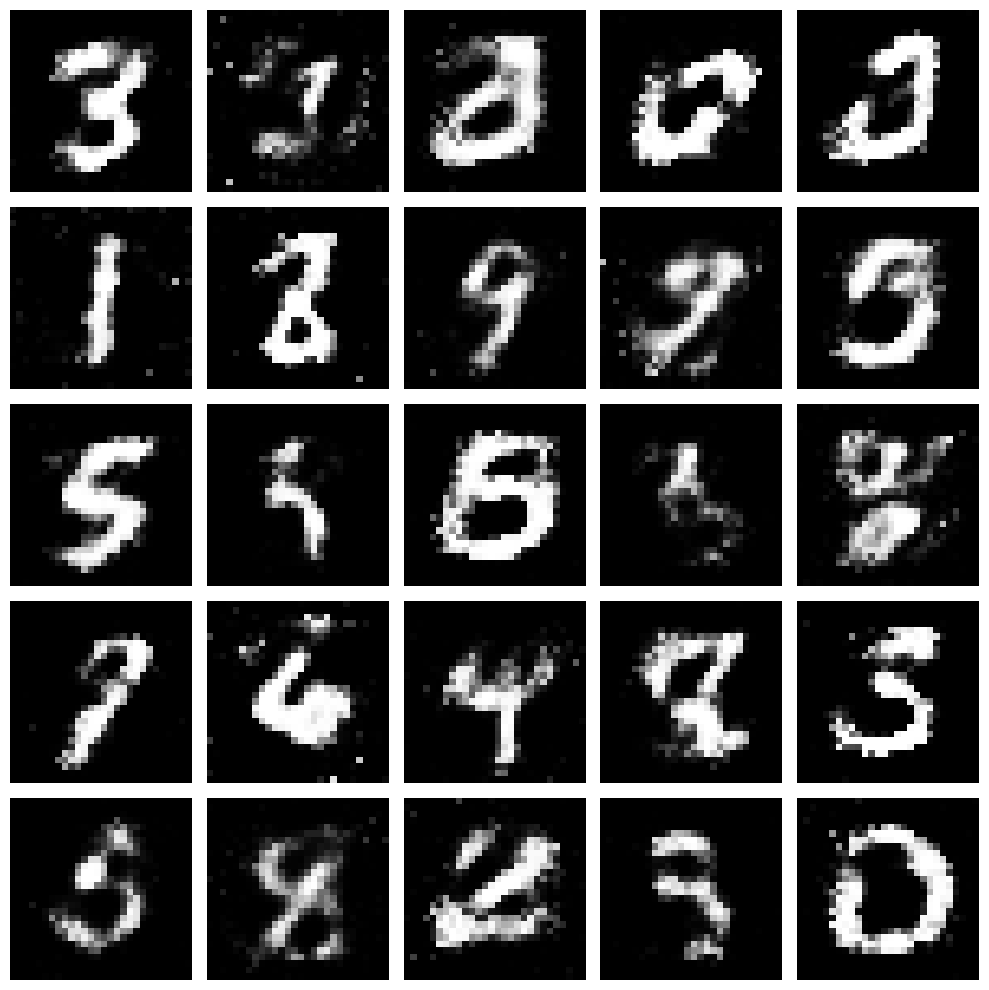

epoch: 67100, d_loss: 0.4803563952445984, g_loss: 1.5548627376556396
epoch: 67200, d_loss: 0.4805147647857666, g_loss: 1.5543015003204346
epoch: 67300, d_loss: 0.4806879162788391, g_loss: 1.5537248849868774
epoch: 67400, d_loss: 0.4808619022369385, g_loss: 1.5531513690948486
epoch: 67500, d_loss: 0.48101407289505005, g_loss: 1.552610993385315
epoch: 67600, d_loss: 0.4811907708644867, g_loss: 1.552017092704773
epoch: 67700, d_loss: 0.48135441541671753, g_loss: 1.5514408349990845
epoch: 67800, d_loss: 0.48152485489845276, g_loss: 1.5508830547332764
epoch: 67900, d_loss: 0.48170238733291626, g_loss: 1.5502930879592896
epoch: 68000, d_loss: 0.48186546564102173, g_loss: 1.5497535467147827


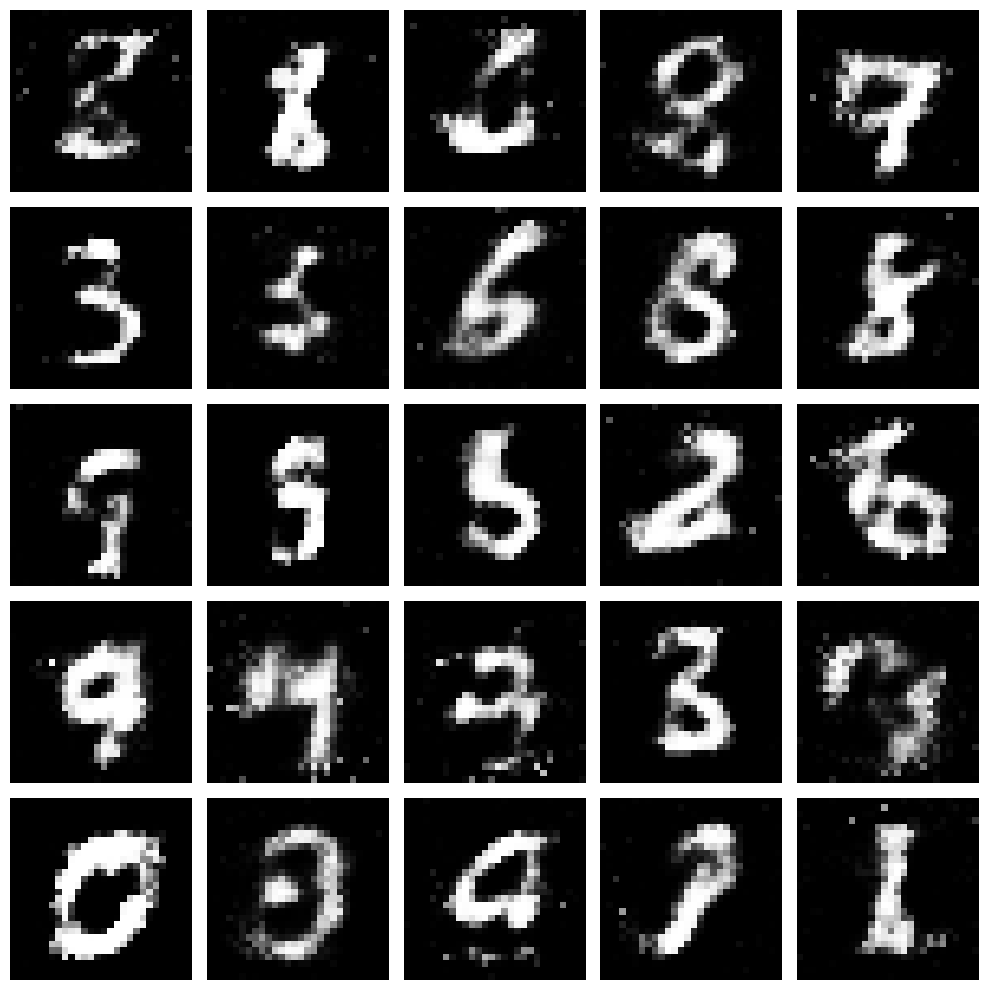

epoch: 68100, d_loss: 0.4820372462272644, g_loss: 1.5491769313812256
epoch: 68200, d_loss: 0.48221057653427124, g_loss: 1.5486127138137817
epoch: 68300, d_loss: 0.4823698401451111, g_loss: 1.5480613708496094
epoch: 68400, d_loss: 0.4825321137905121, g_loss: 1.5475314855575562
epoch: 68500, d_loss: 0.4827030897140503, g_loss: 1.5469865798950195
epoch: 68600, d_loss: 0.48285746574401855, g_loss: 1.5464648008346558
epoch: 68700, d_loss: 0.48300397396087646, g_loss: 1.5459457635879517
epoch: 68800, d_loss: 0.48319798707962036, g_loss: 1.5453566312789917
epoch: 68900, d_loss: 0.4833483397960663, g_loss: 1.5448322296142578
epoch: 69000, d_loss: 0.4835130572319031, g_loss: 1.5443178415298462


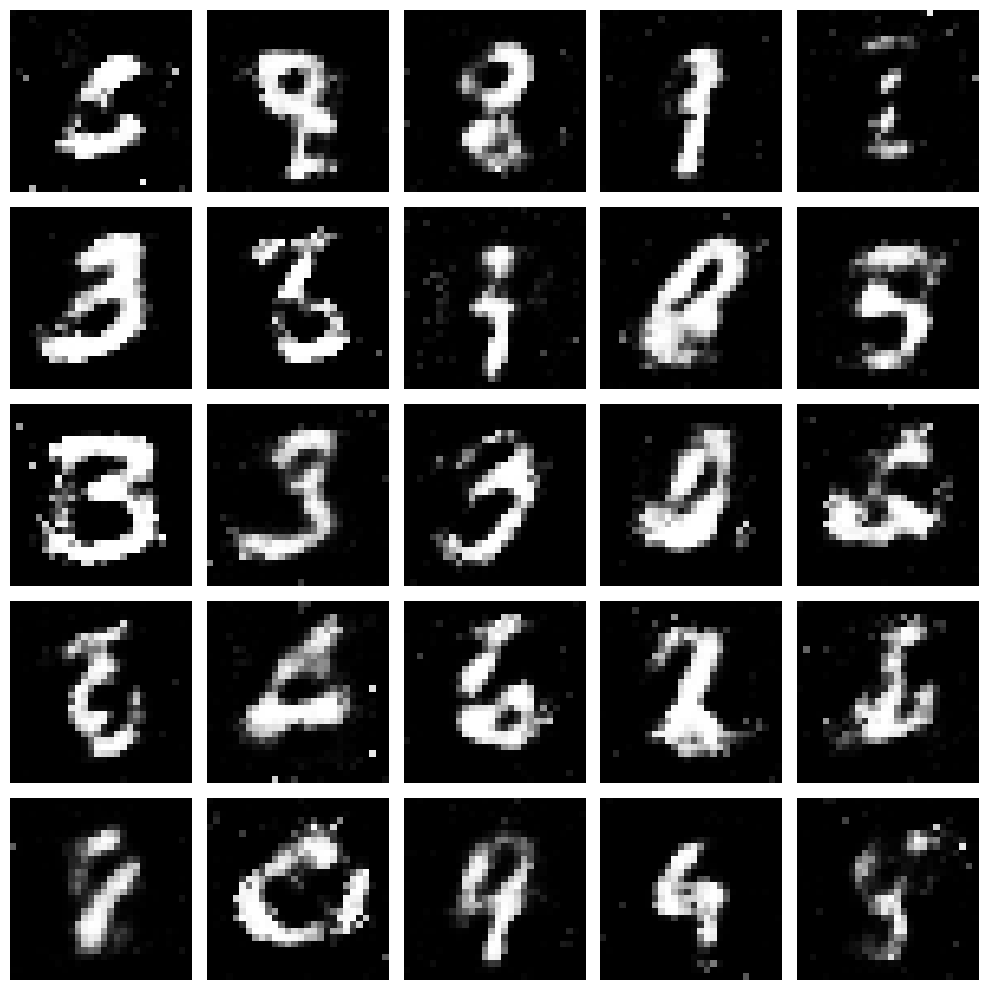

epoch: 69100, d_loss: 0.48368072509765625, g_loss: 1.543778657913208
epoch: 69200, d_loss: 0.4838438630104065, g_loss: 1.5432496070861816
epoch: 69300, d_loss: 0.48400771617889404, g_loss: 1.542714238166809
epoch: 69400, d_loss: 0.4841708540916443, g_loss: 1.542177438735962
epoch: 69500, d_loss: 0.4843246340751648, g_loss: 1.541646957397461
epoch: 69600, d_loss: 0.4844857454299927, g_loss: 1.5411136150360107
epoch: 69700, d_loss: 0.484645277261734, g_loss: 1.5405781269073486
epoch: 69800, d_loss: 0.48479610681533813, g_loss: 1.54005765914917
epoch: 69900, d_loss: 0.4849756956100464, g_loss: 1.539514422416687
epoch: 70000, d_loss: 0.48511531949043274, g_loss: 1.5389964580535889


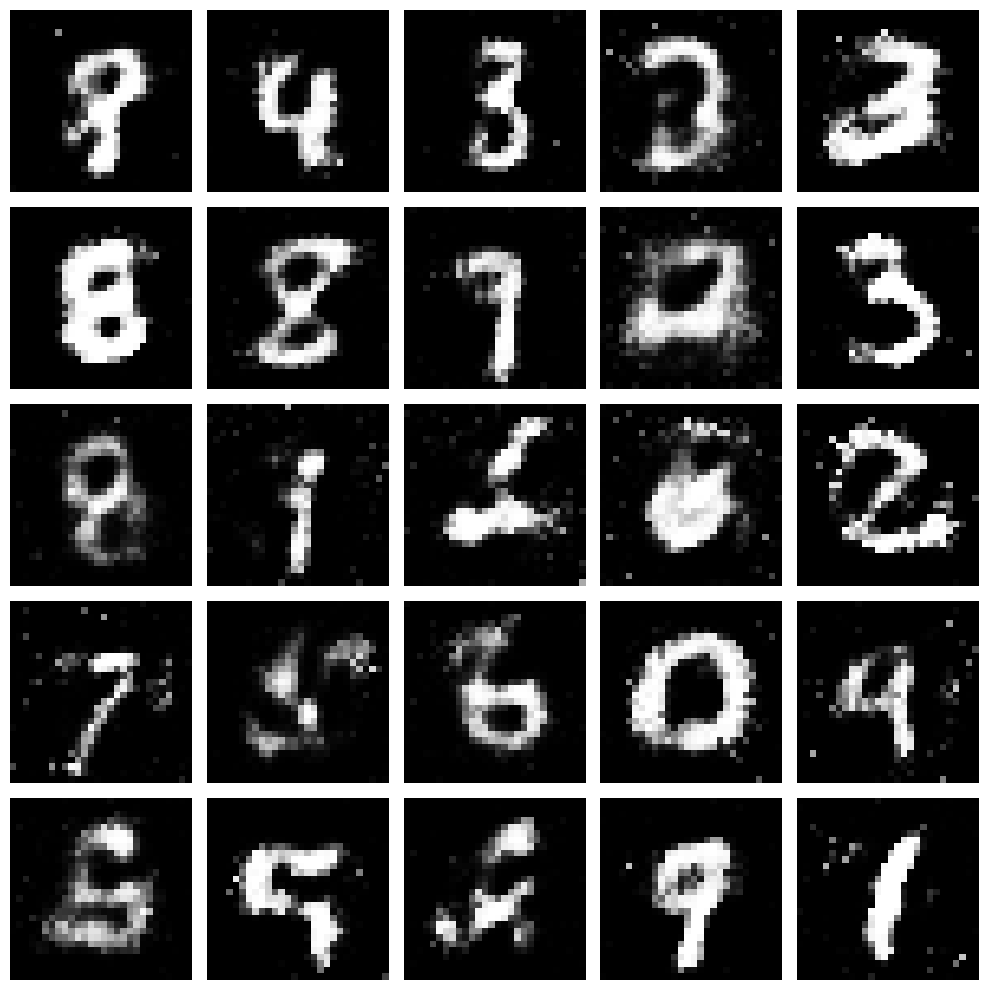

epoch: 70100, d_loss: 0.4852752089500427, g_loss: 1.5384670495986938
epoch: 70200, d_loss: 0.4854503273963928, g_loss: 1.5379259586334229
epoch: 70300, d_loss: 0.4855876863002777, g_loss: 1.537414312362671
epoch: 70400, d_loss: 0.48575884103775024, g_loss: 1.5368876457214355
epoch: 70500, d_loss: 0.4859086871147156, g_loss: 1.5363651514053345
epoch: 70600, d_loss: 0.48607802391052246, g_loss: 1.5358225107192993
epoch: 70700, d_loss: 0.48622527718544006, g_loss: 1.5353134870529175
epoch: 70800, d_loss: 0.4863932728767395, g_loss: 1.5347893238067627
epoch: 70900, d_loss: 0.48652786016464233, g_loss: 1.534281849861145
epoch: 71000, d_loss: 0.48670876026153564, g_loss: 1.533743143081665


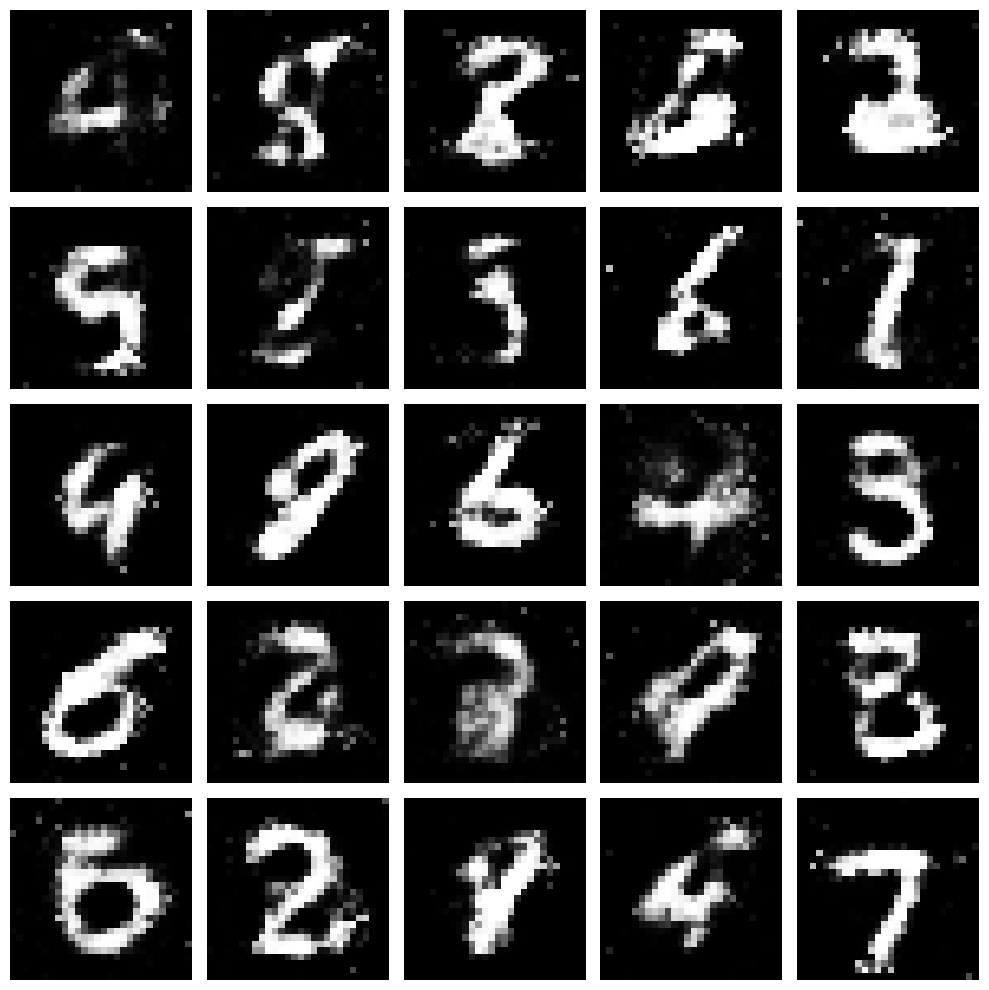

epoch: 71100, d_loss: 0.4868396818637848, g_loss: 1.533265471458435
epoch: 71200, d_loss: 0.48701679706573486, g_loss: 1.532720923423767
epoch: 71300, d_loss: 0.4871659576892853, g_loss: 1.532192349433899
epoch: 71400, d_loss: 0.48732250928878784, g_loss: 1.5316840410232544
epoch: 71500, d_loss: 0.4874724745750427, g_loss: 1.5311931371688843
epoch: 71600, d_loss: 0.487643301486969, g_loss: 1.5306601524353027
epoch: 71700, d_loss: 0.48778870701789856, g_loss: 1.5301462411880493
epoch: 71800, d_loss: 0.4879467785358429, g_loss: 1.5296142101287842
epoch: 71900, d_loss: 0.4880950152873993, g_loss: 1.5291290283203125
epoch: 72000, d_loss: 0.4882414937019348, g_loss: 1.5286363363265991


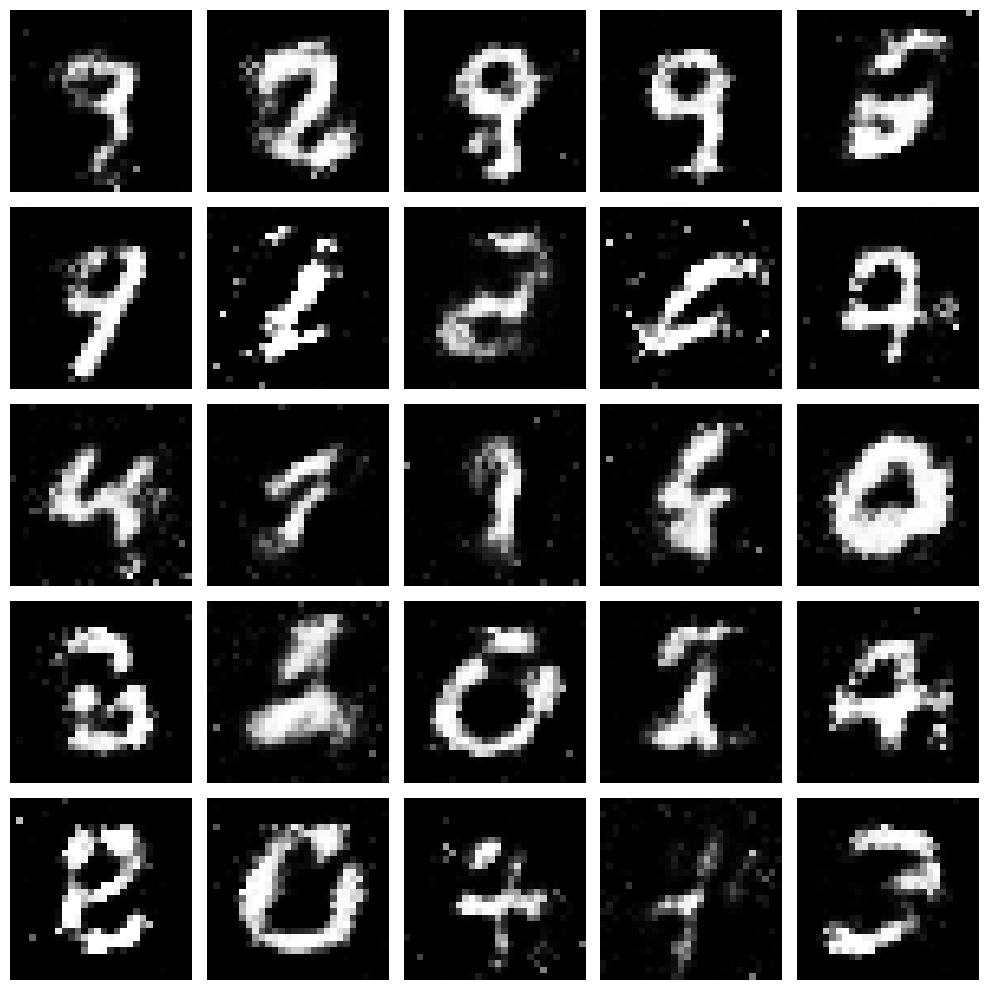

epoch: 72100, d_loss: 0.48840728402137756, g_loss: 1.5281046628952026
epoch: 72200, d_loss: 0.48854419589042664, g_loss: 1.5276308059692383
epoch: 72300, d_loss: 0.48870617151260376, g_loss: 1.5271105766296387
epoch: 72400, d_loss: 0.4888436794281006, g_loss: 1.5266308784484863
epoch: 72500, d_loss: 0.4890120327472687, g_loss: 1.5261013507843018
epoch: 72600, d_loss: 0.48914864659309387, g_loss: 1.5256367921829224
epoch: 72700, d_loss: 0.4893070459365845, g_loss: 1.5251119136810303
epoch: 72800, d_loss: 0.489460289478302, g_loss: 1.5246027708053589
epoch: 72900, d_loss: 0.4896085262298584, g_loss: 1.524087905883789
epoch: 73000, d_loss: 0.4897514581680298, g_loss: 1.523589849472046


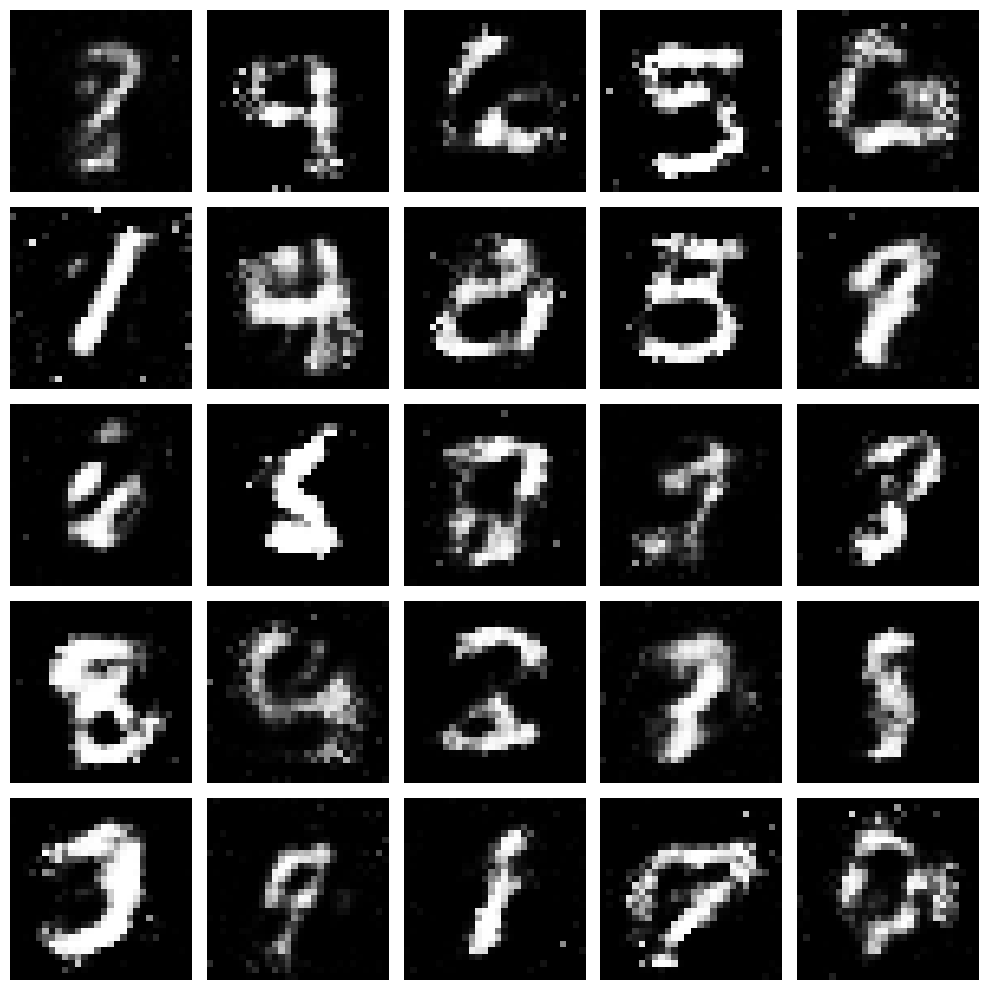

epoch: 73100, d_loss: 0.4899132251739502, g_loss: 1.5230815410614014
epoch: 73200, d_loss: 0.4900586009025574, g_loss: 1.5225800275802612
epoch: 73300, d_loss: 0.4902056157588959, g_loss: 1.5220775604248047
epoch: 73400, d_loss: 0.4903537929058075, g_loss: 1.5215827226638794
epoch: 73500, d_loss: 0.49049919843673706, g_loss: 1.5210740566253662
epoch: 73600, d_loss: 0.49064040184020996, g_loss: 1.5205734968185425
epoch: 73700, d_loss: 0.49078506231307983, g_loss: 1.5200791358947754
epoch: 73800, d_loss: 0.4909230172634125, g_loss: 1.5196024179458618
epoch: 73900, d_loss: 0.49109673500061035, g_loss: 1.5191049575805664
epoch: 74000, d_loss: 0.49121659994125366, g_loss: 1.5186539888381958


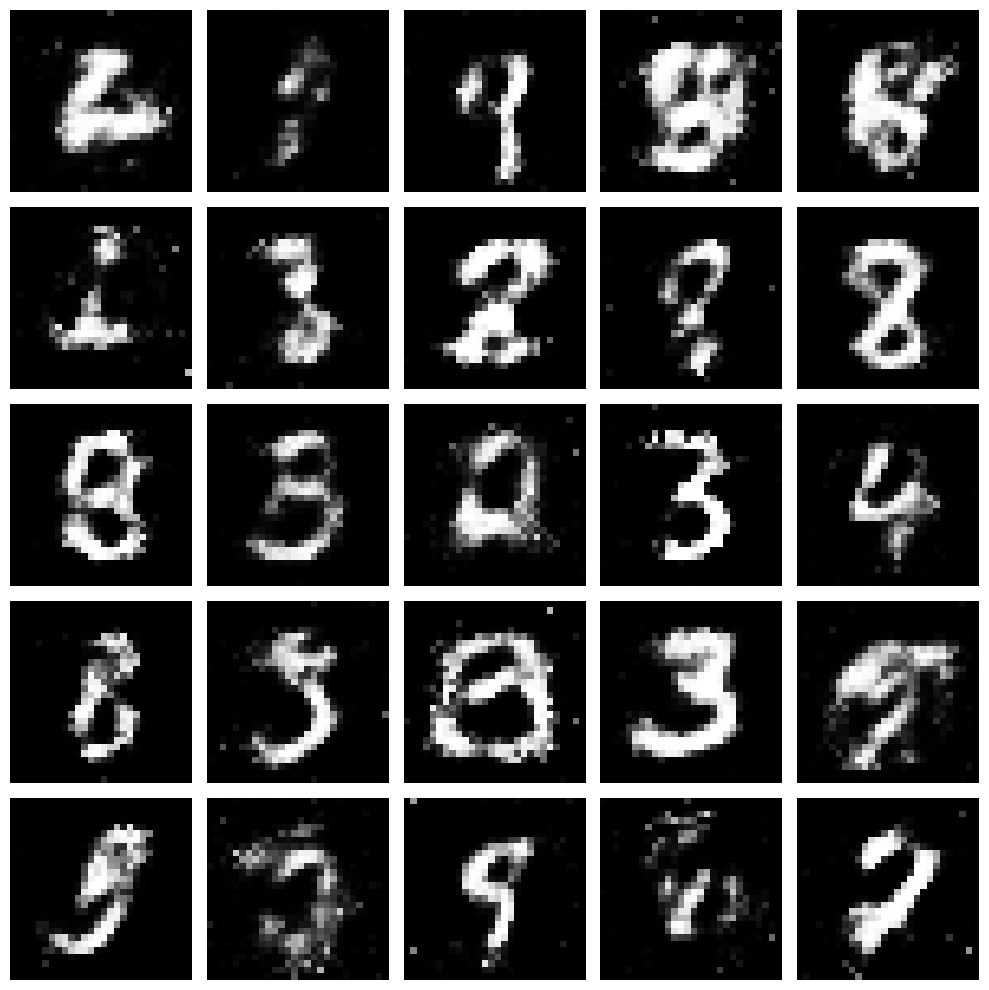

epoch: 74100, d_loss: 0.4913792014122009, g_loss: 1.5181405544281006
epoch: 74200, d_loss: 0.49150586128234863, g_loss: 1.517682671546936
epoch: 74300, d_loss: 0.4916515052318573, g_loss: 1.5171940326690674
epoch: 74400, d_loss: 0.4918086528778076, g_loss: 1.5166945457458496
epoch: 74500, d_loss: 0.4919302463531494, g_loss: 1.5162441730499268
epoch: 74600, d_loss: 0.49208712577819824, g_loss: 1.5157331228256226
epoch: 74700, d_loss: 0.4922255873680115, g_loss: 1.5152579545974731
epoch: 74800, d_loss: 0.4923567473888397, g_loss: 1.5147595405578613
epoch: 74900, d_loss: 0.49249228835105896, g_loss: 1.5142852067947388
epoch: 75000, d_loss: 0.4926329255104065, g_loss: 1.5138025283813477


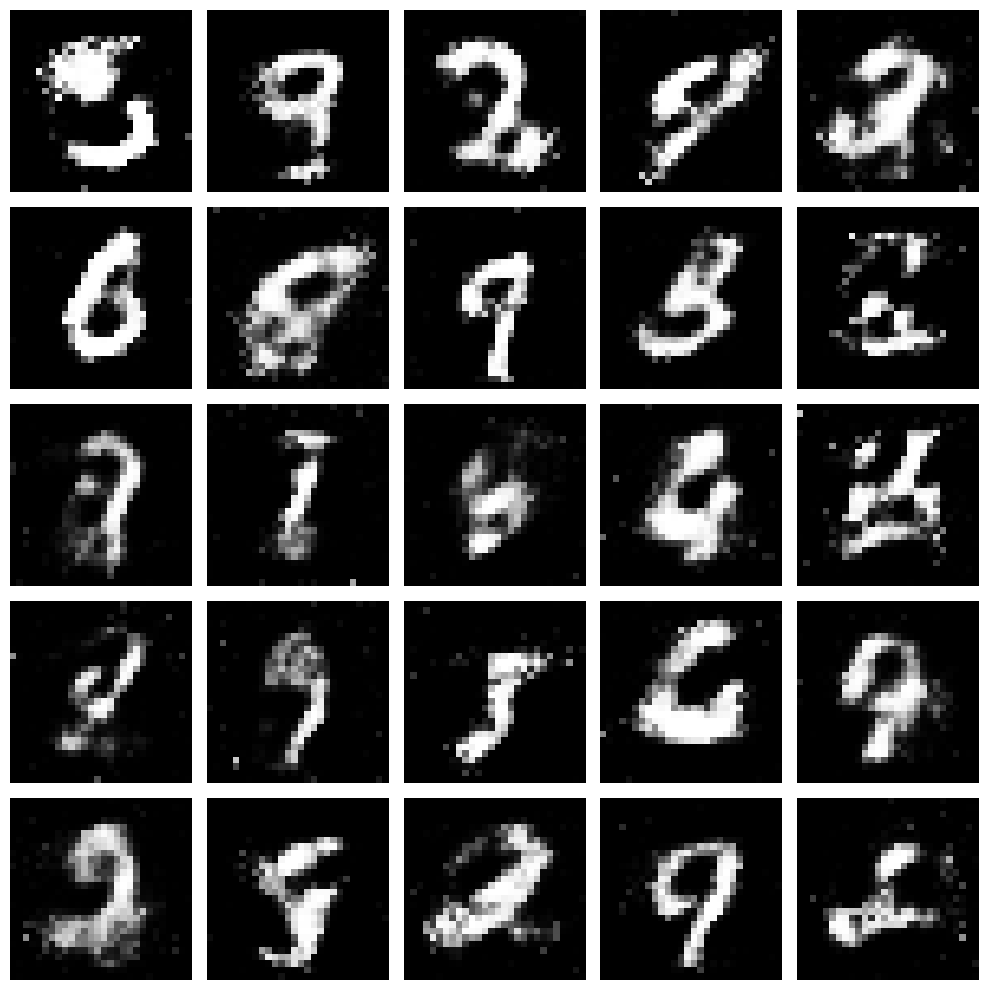

epoch: 75100, d_loss: 0.4927586019039154, g_loss: 1.5133488178253174
epoch: 75200, d_loss: 0.49290215969085693, g_loss: 1.5128687620162964
epoch: 75300, d_loss: 0.4930238127708435, g_loss: 1.5124235153198242
epoch: 75400, d_loss: 0.49317115545272827, g_loss: 1.5119432210922241
epoch: 75500, d_loss: 0.4933144748210907, g_loss: 1.5114625692367554
epoch: 75600, d_loss: 0.49343693256378174, g_loss: 1.5110045671463013
epoch: 75700, d_loss: 0.49357491731643677, g_loss: 1.5105268955230713
epoch: 75800, d_loss: 0.49370747804641724, g_loss: 1.5100655555725098
epoch: 75900, d_loss: 0.49383461475372314, g_loss: 1.509629249572754
epoch: 76000, d_loss: 0.4939703345298767, g_loss: 1.5091807842254639


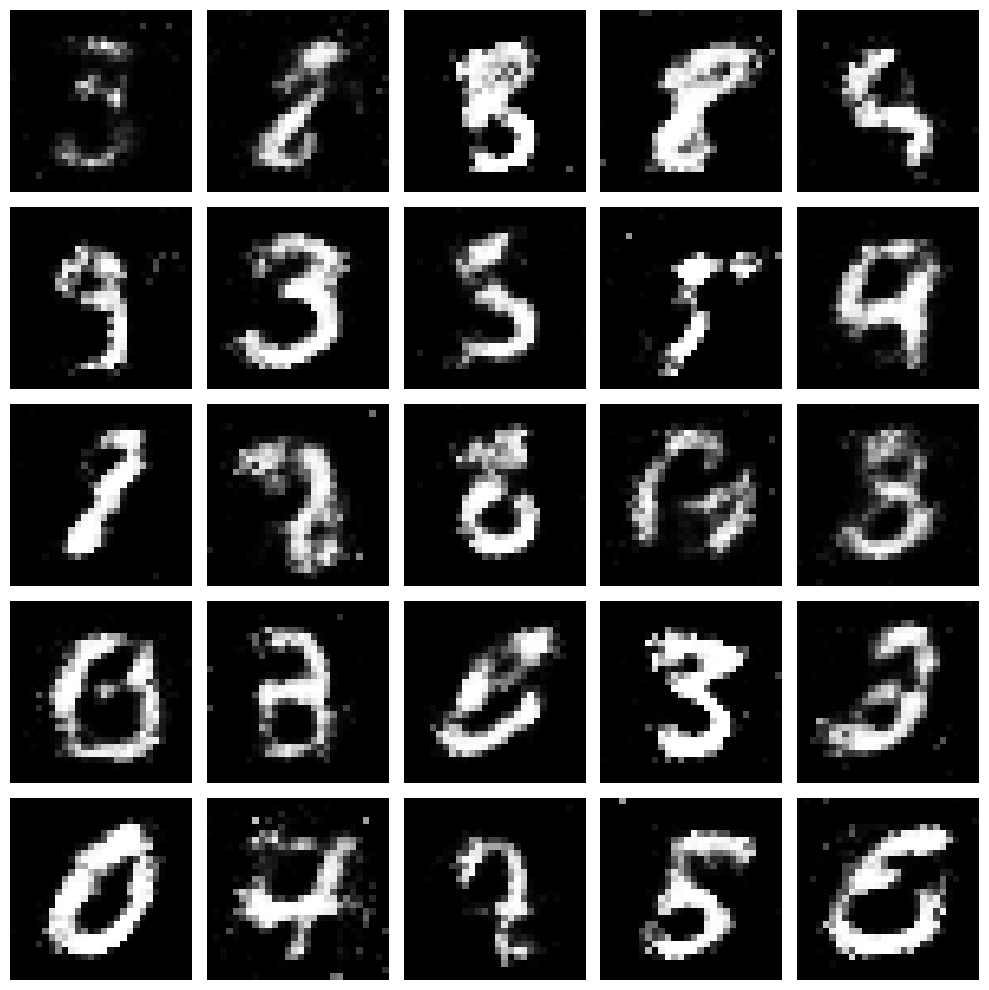

epoch: 76100, d_loss: 0.4940981864929199, g_loss: 1.508729100227356
epoch: 76200, d_loss: 0.4942393898963928, g_loss: 1.5082488059997559
epoch: 76300, d_loss: 0.4943568706512451, g_loss: 1.507818341255188
epoch: 76400, d_loss: 0.49449044466018677, g_loss: 1.5073705911636353
epoch: 76500, d_loss: 0.49463552236557007, g_loss: 1.506899356842041
epoch: 76600, d_loss: 0.4947482943534851, g_loss: 1.506467342376709
epoch: 76700, d_loss: 0.49489128589630127, g_loss: 1.5059823989868164
epoch: 76800, d_loss: 0.4950249195098877, g_loss: 1.505531668663025
epoch: 76900, d_loss: 0.49515098333358765, g_loss: 1.5050715208053589
epoch: 77000, d_loss: 0.4952925741672516, g_loss: 1.5045992136001587


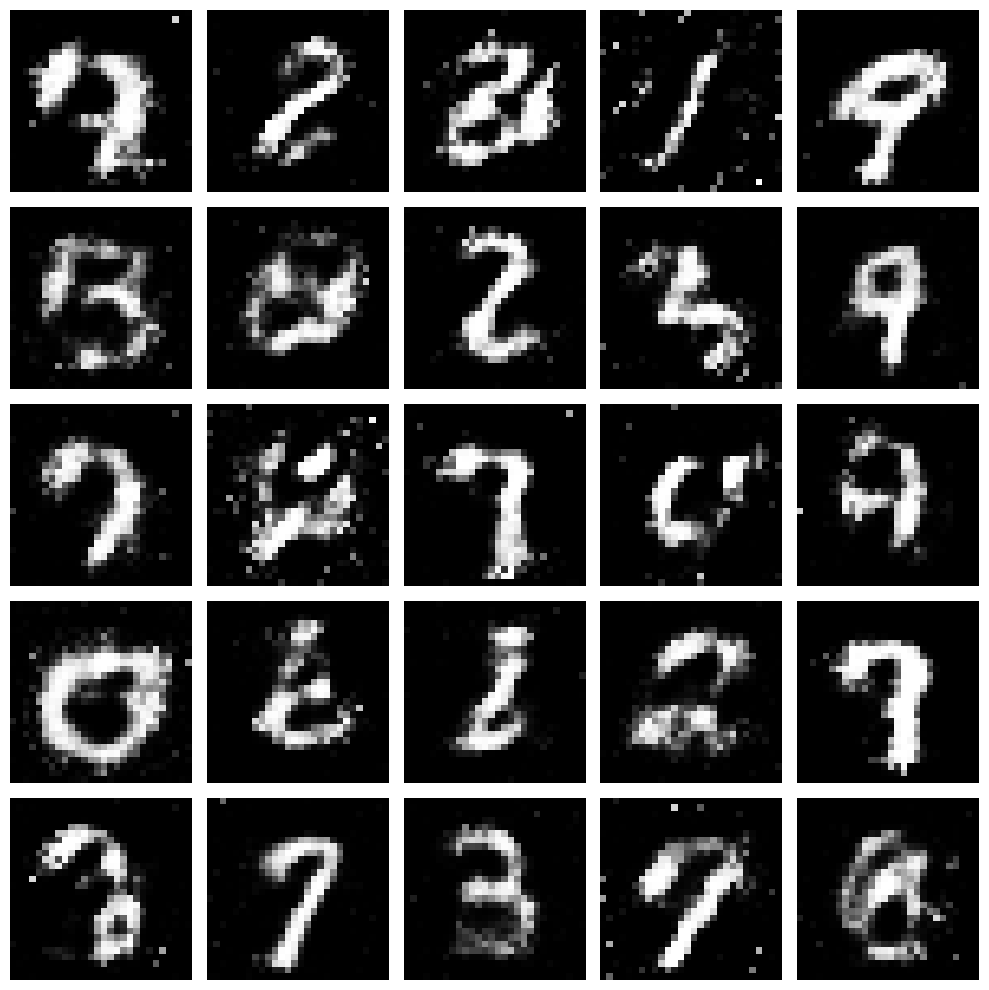

epoch: 77100, d_loss: 0.4953984022140503, g_loss: 1.504203200340271
epoch: 77200, d_loss: 0.49555569887161255, g_loss: 1.5037150382995605
epoch: 77300, d_loss: 0.49564334750175476, g_loss: 1.5033135414123535
epoch: 77400, d_loss: 0.49579519033432007, g_loss: 1.5028553009033203
epoch: 77500, d_loss: 0.49592071771621704, g_loss: 1.5024362802505493
epoch: 77600, d_loss: 0.4960503876209259, g_loss: 1.5019984245300293
epoch: 77700, d_loss: 0.49615752696990967, g_loss: 1.5015912055969238
epoch: 77800, d_loss: 0.4962950348854065, g_loss: 1.5011345148086548
epoch: 77900, d_loss: 0.4964172840118408, g_loss: 1.5007023811340332
epoch: 78000, d_loss: 0.496551513671875, g_loss: 1.5002516508102417


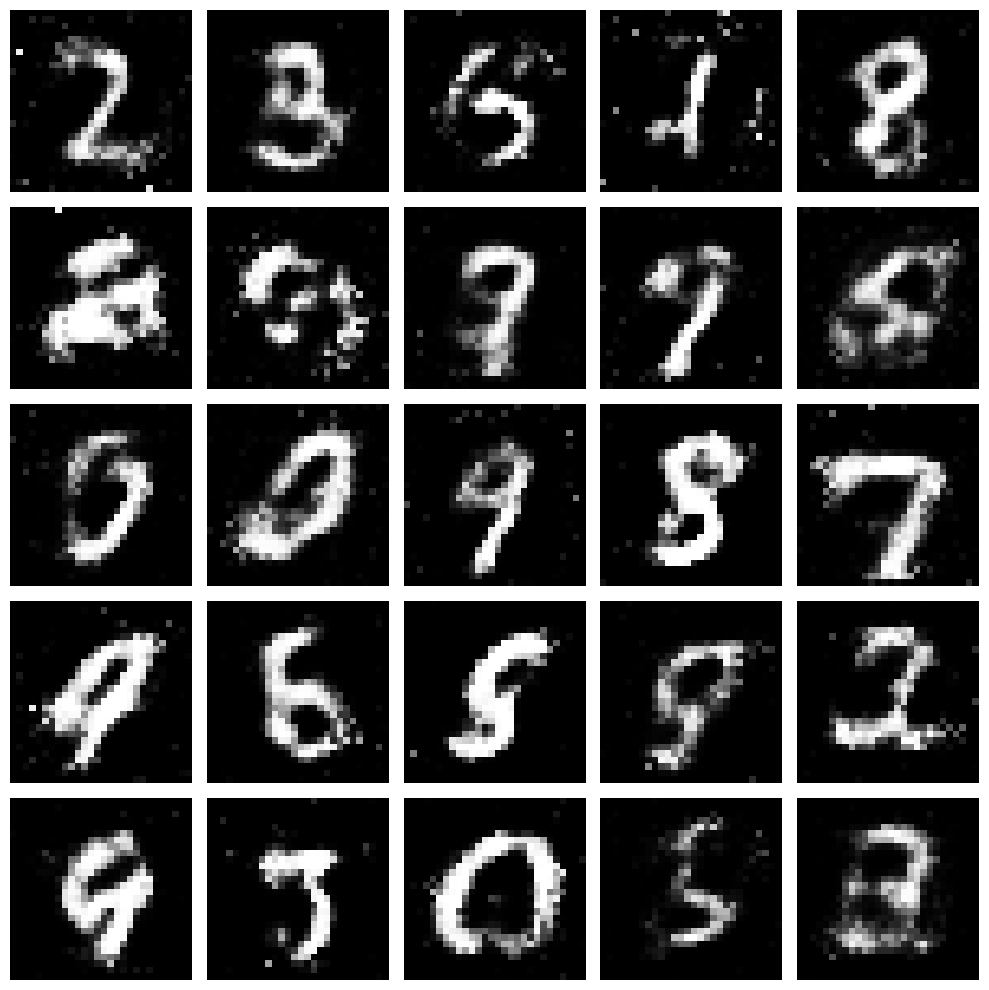

epoch: 78100, d_loss: 0.49666184186935425, g_loss: 1.4998328685760498
epoch: 78200, d_loss: 0.4967929720878601, g_loss: 1.4993976354599
epoch: 78300, d_loss: 0.4969245195388794, g_loss: 1.4989597797393799
epoch: 78400, d_loss: 0.49702584743499756, g_loss: 1.4985462427139282
epoch: 78500, d_loss: 0.49716728925704956, g_loss: 1.4980676174163818
epoch: 78600, d_loss: 0.4972657859325409, g_loss: 1.4976598024368286
epoch: 78700, d_loss: 0.4974031448364258, g_loss: 1.497215747833252
epoch: 78800, d_loss: 0.4975111484527588, g_loss: 1.4968068599700928
epoch: 78900, d_loss: 0.49763569235801697, g_loss: 1.4963847398757935
epoch: 79000, d_loss: 0.49775180220603943, g_loss: 1.495972990989685


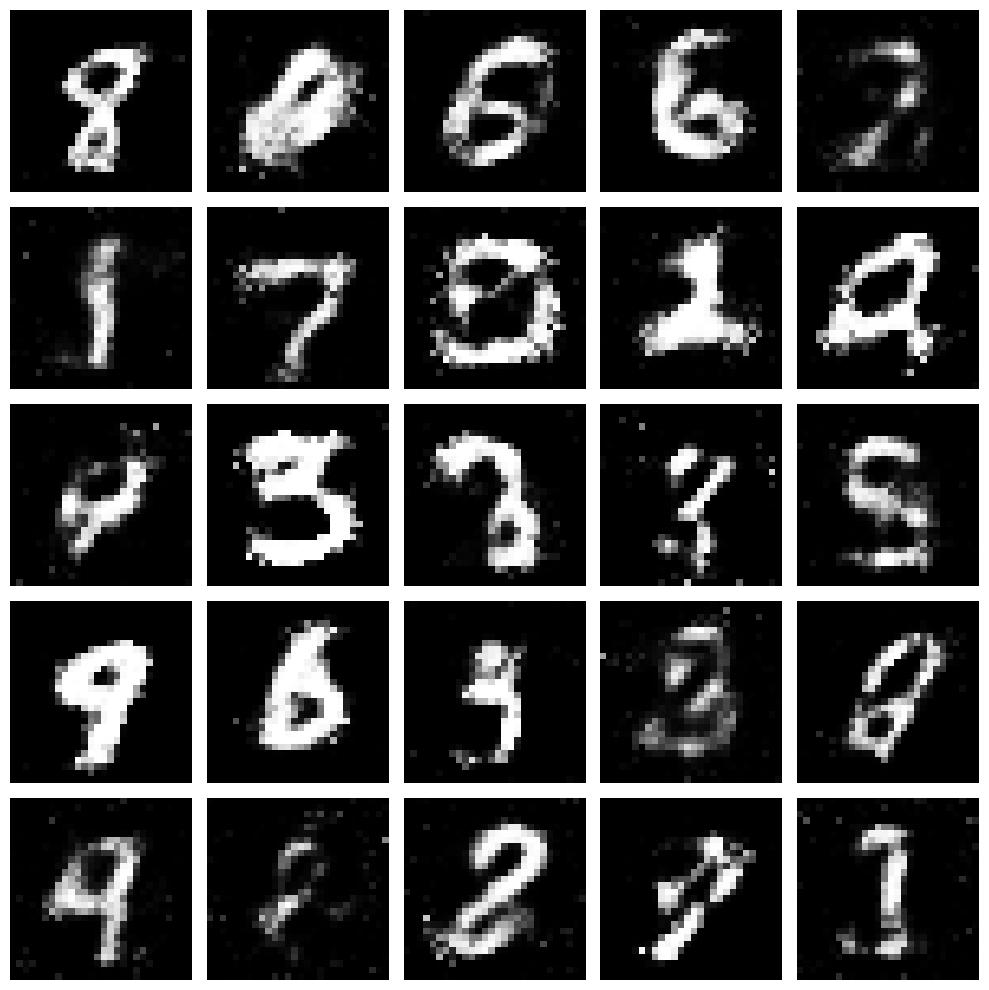

epoch: 79100, d_loss: 0.4978799819946289, g_loss: 1.495551586151123
epoch: 79200, d_loss: 0.4979991614818573, g_loss: 1.4951324462890625
epoch: 79300, d_loss: 0.498130738735199, g_loss: 1.4947056770324707
epoch: 79400, d_loss: 0.4982435405254364, g_loss: 1.4942948818206787
epoch: 79500, d_loss: 0.49836981296539307, g_loss: 1.4938712120056152
epoch: 79600, d_loss: 0.4984741806983948, g_loss: 1.4934518337249756
epoch: 79700, d_loss: 0.49859151244163513, g_loss: 1.4930505752563477
epoch: 79800, d_loss: 0.4987097978591919, g_loss: 1.4926245212554932
epoch: 79900, d_loss: 0.4988222122192383, g_loss: 1.4922024011611938
epoch: 80000, d_loss: 0.4989371597766876, g_loss: 1.4917851686477661


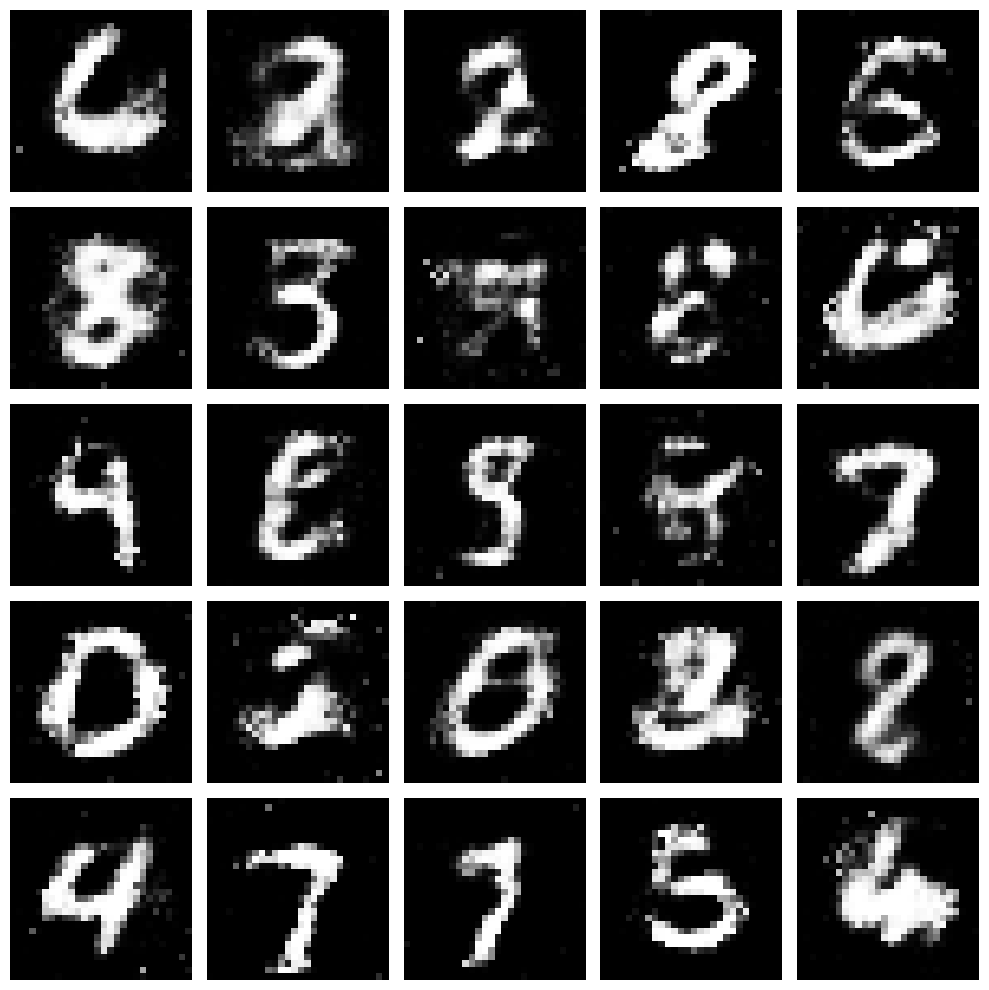

epoch: 80100, d_loss: 0.49905604124069214, g_loss: 1.4913666248321533
epoch: 80200, d_loss: 0.4991791248321533, g_loss: 1.4909378290176392
epoch: 80300, d_loss: 0.49927419424057007, g_loss: 1.4905551671981812
epoch: 80400, d_loss: 0.4994049072265625, g_loss: 1.4901138544082642
epoch: 80500, d_loss: 0.4995088577270508, g_loss: 1.4897375106811523
epoch: 80600, d_loss: 0.4996178150177002, g_loss: 1.489327311515808
epoch: 80700, d_loss: 0.4997256398200989, g_loss: 1.4889367818832397
epoch: 80800, d_loss: 0.4998387098312378, g_loss: 1.4885332584381104
epoch: 80900, d_loss: 0.49995407462120056, g_loss: 1.488113284111023
epoch: 81000, d_loss: 0.5000640153884888, g_loss: 1.487721562385559


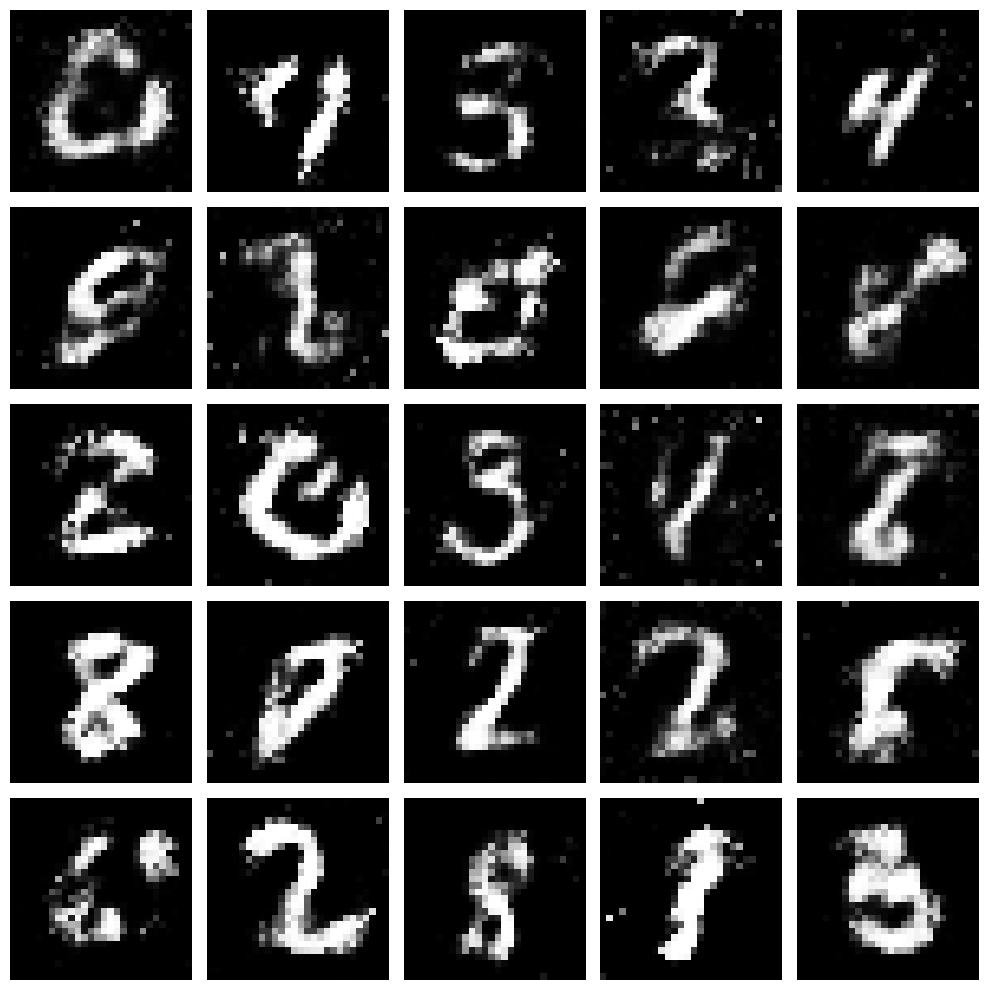

epoch: 81100, d_loss: 0.5001789331436157, g_loss: 1.4873181581497192
epoch: 81200, d_loss: 0.5003092288970947, g_loss: 1.4868913888931274
epoch: 81300, d_loss: 0.5003976225852966, g_loss: 1.4865241050720215
epoch: 81400, d_loss: 0.5005215406417847, g_loss: 1.4860937595367432
epoch: 81500, d_loss: 0.5006246566772461, g_loss: 1.4856891632080078
epoch: 81600, d_loss: 0.5007193684577942, g_loss: 1.4852919578552246
epoch: 81700, d_loss: 0.5008544921875, g_loss: 1.484851360321045
epoch: 81800, d_loss: 0.5009413957595825, g_loss: 1.4844919443130493
epoch: 81900, d_loss: 0.5010595321655273, g_loss: 1.4840842485427856
epoch: 82000, d_loss: 0.5011723041534424, g_loss: 1.4836865663528442


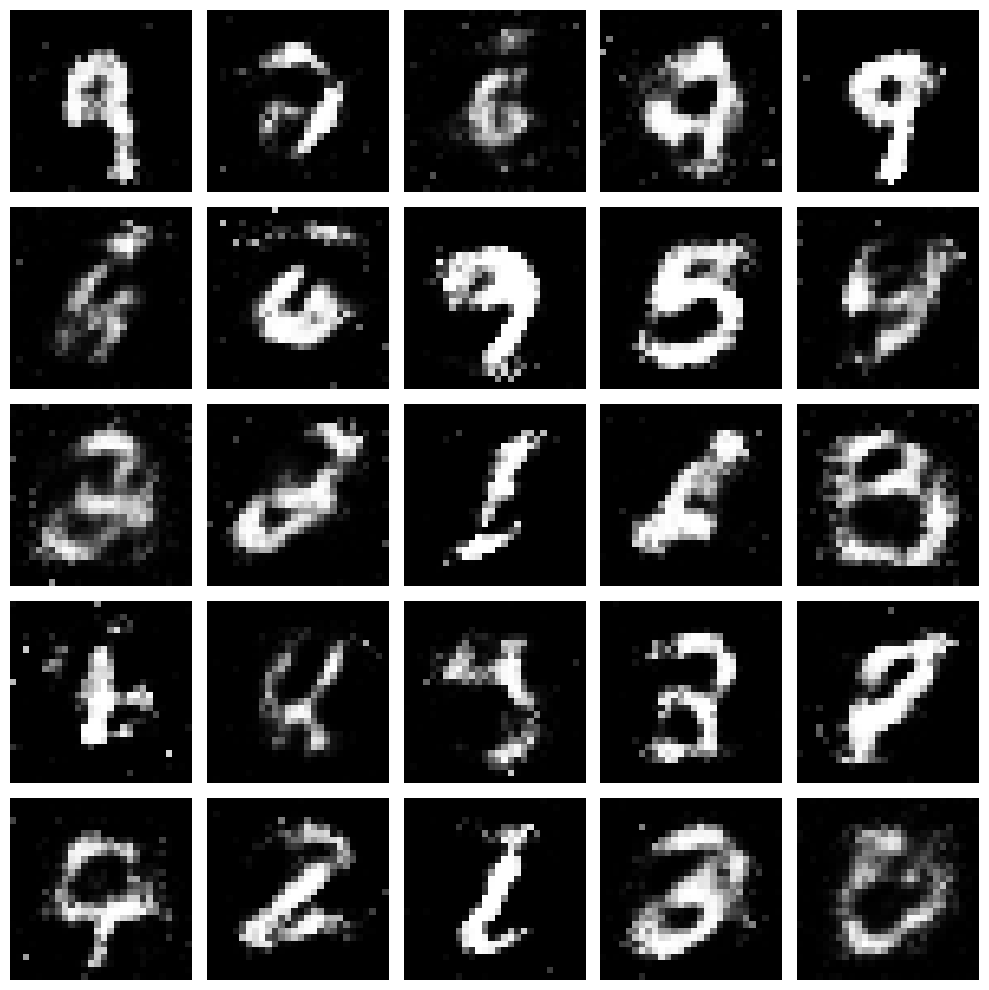

epoch: 82100, d_loss: 0.5012707710266113, g_loss: 1.4833178520202637
epoch: 82200, d_loss: 0.5013940334320068, g_loss: 1.4829130172729492
epoch: 82300, d_loss: 0.5014797449111938, g_loss: 1.4825468063354492
epoch: 82400, d_loss: 0.5016041994094849, g_loss: 1.4821256399154663
epoch: 82500, d_loss: 0.5017035007476807, g_loss: 1.4817423820495605
epoch: 82600, d_loss: 0.5018035769462585, g_loss: 1.4813908338546753
epoch: 82700, d_loss: 0.5019012093544006, g_loss: 1.481003761291504
epoch: 82800, d_loss: 0.502013087272644, g_loss: 1.4806146621704102
epoch: 82900, d_loss: 0.5021058917045593, g_loss: 1.4802486896514893
epoch: 83000, d_loss: 0.5022255182266235, g_loss: 1.4798527956008911


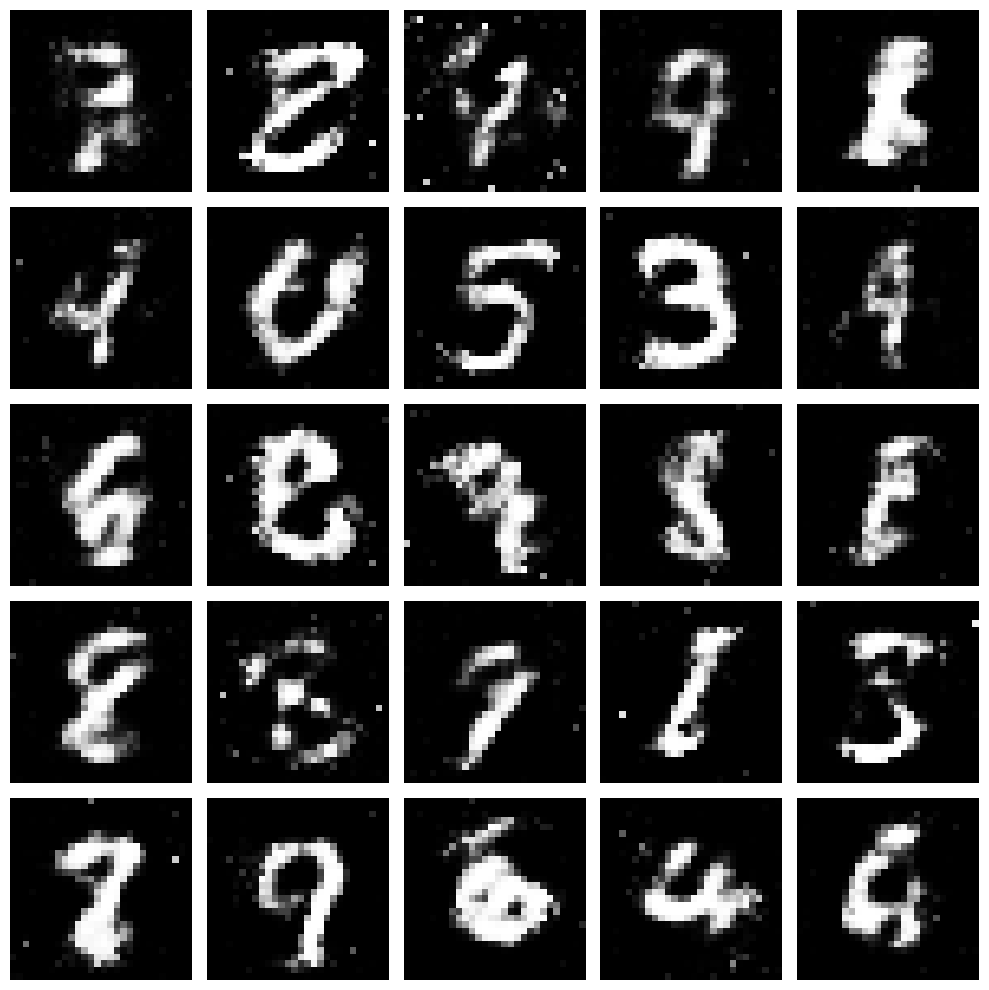

epoch: 83100, d_loss: 0.5023150444030762, g_loss: 1.4794787168502808
epoch: 83200, d_loss: 0.502435564994812, g_loss: 1.4790678024291992
epoch: 83300, d_loss: 0.5025233030319214, g_loss: 1.4787120819091797
epoch: 83400, d_loss: 0.5026288032531738, g_loss: 1.4783260822296143
epoch: 83500, d_loss: 0.502742350101471, g_loss: 1.4779326915740967
epoch: 83600, d_loss: 0.5028363466262817, g_loss: 1.4775742292404175
epoch: 83700, d_loss: 0.5029470920562744, g_loss: 1.4771829843521118
epoch: 83800, d_loss: 0.5030489563941956, g_loss: 1.4767980575561523
epoch: 83900, d_loss: 0.5031625628471375, g_loss: 1.4764001369476318
epoch: 84000, d_loss: 0.5032508373260498, g_loss: 1.4760404825210571


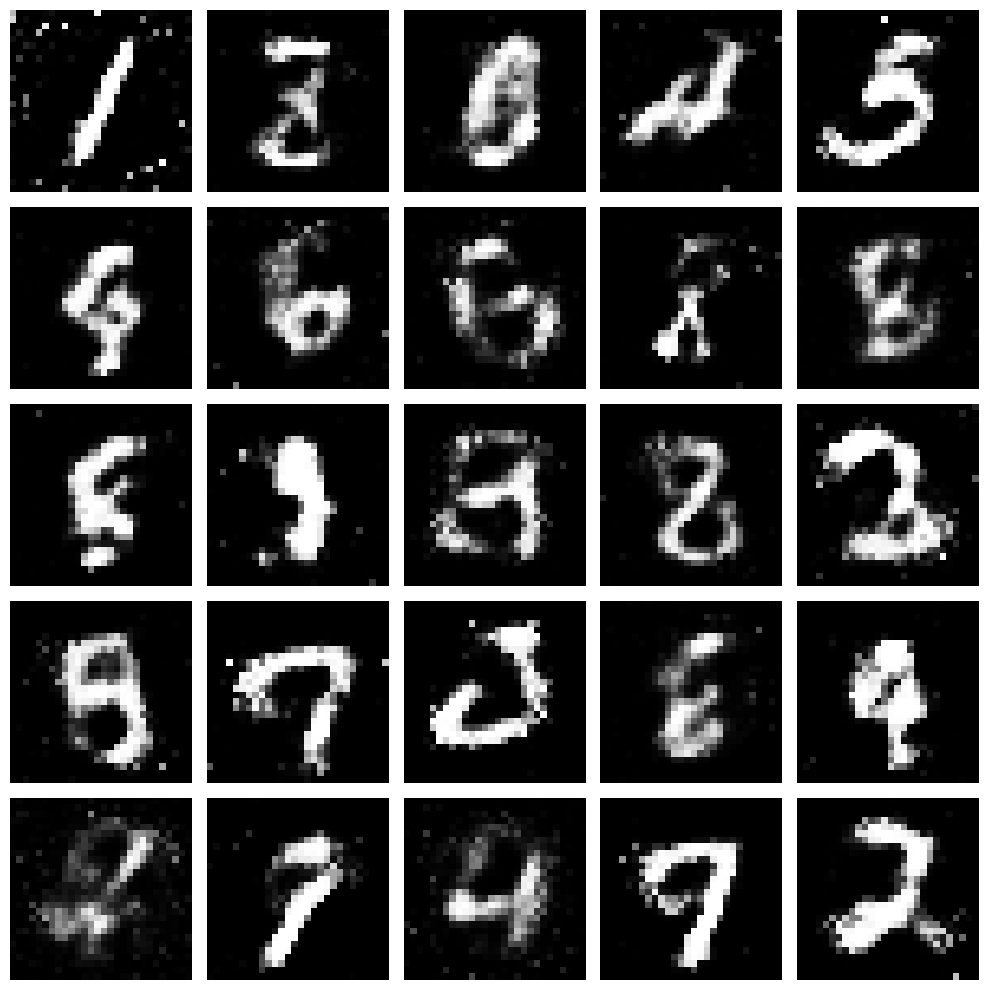

epoch: 84100, d_loss: 0.5033590793609619, g_loss: 1.4756591320037842
epoch: 84200, d_loss: 0.503462553024292, g_loss: 1.4752862453460693
epoch: 84300, d_loss: 0.5035533308982849, g_loss: 1.4749339818954468
epoch: 84400, d_loss: 0.5036613941192627, g_loss: 1.4745506048202515
epoch: 84500, d_loss: 0.5037626028060913, g_loss: 1.47416353225708
epoch: 84600, d_loss: 0.503863513469696, g_loss: 1.4737958908081055
epoch: 84700, d_loss: 0.503974199295044, g_loss: 1.4734325408935547
epoch: 84800, d_loss: 0.5040696859359741, g_loss: 1.4730682373046875
epoch: 84900, d_loss: 0.504177451133728, g_loss: 1.4726711511611938
epoch: 85000, d_loss: 0.5042740106582642, g_loss: 1.472304344177246


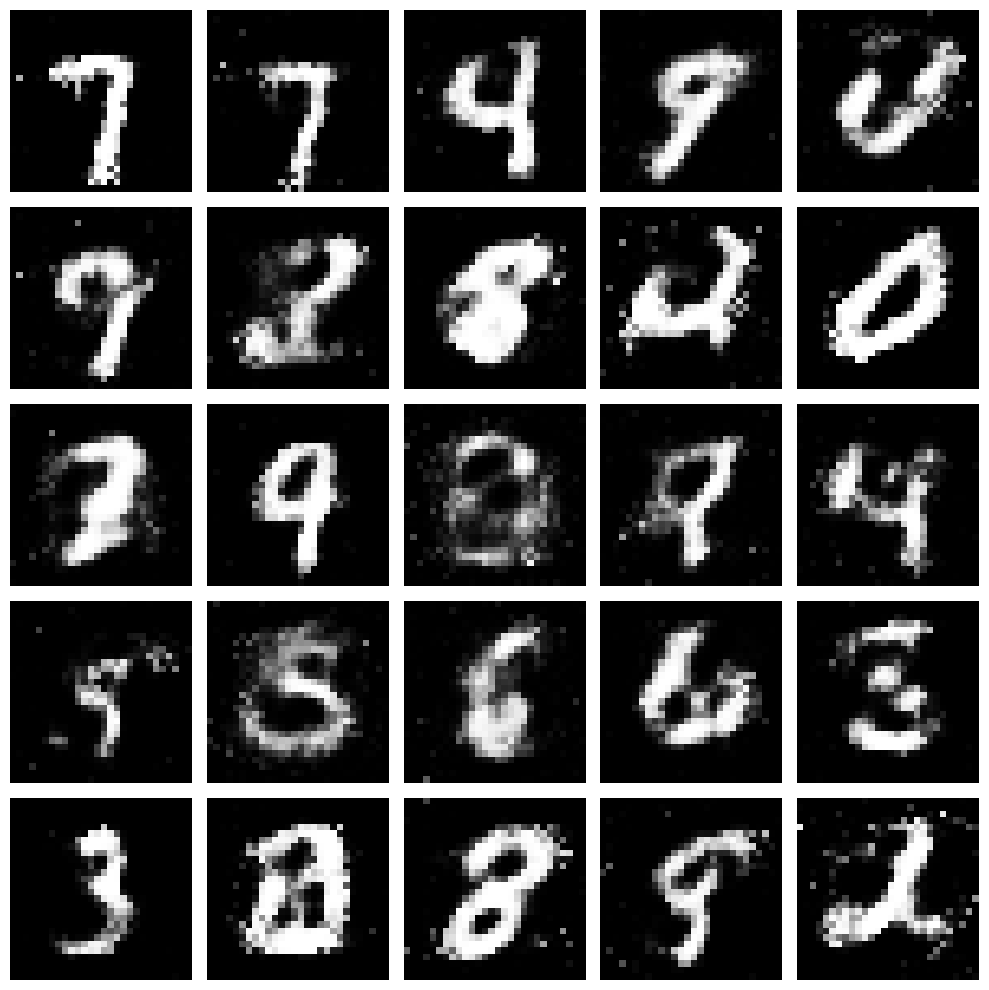

epoch: 85100, d_loss: 0.5043857097625732, g_loss: 1.4719352722167969
epoch: 85200, d_loss: 0.5044776797294617, g_loss: 1.471571683883667
epoch: 85300, d_loss: 0.5045797824859619, g_loss: 1.4712170362472534
epoch: 85400, d_loss: 0.5046800374984741, g_loss: 1.4708479642868042
epoch: 85500, d_loss: 0.5047864317893982, g_loss: 1.4704794883728027
epoch: 85600, d_loss: 0.504879355430603, g_loss: 1.4701220989227295
epoch: 85700, d_loss: 0.504966676235199, g_loss: 1.4697785377502441
epoch: 85800, d_loss: 0.5050783753395081, g_loss: 1.469399333000183
epoch: 85900, d_loss: 0.5051749348640442, g_loss: 1.4690405130386353
epoch: 86000, d_loss: 0.5052669048309326, g_loss: 1.468673825263977


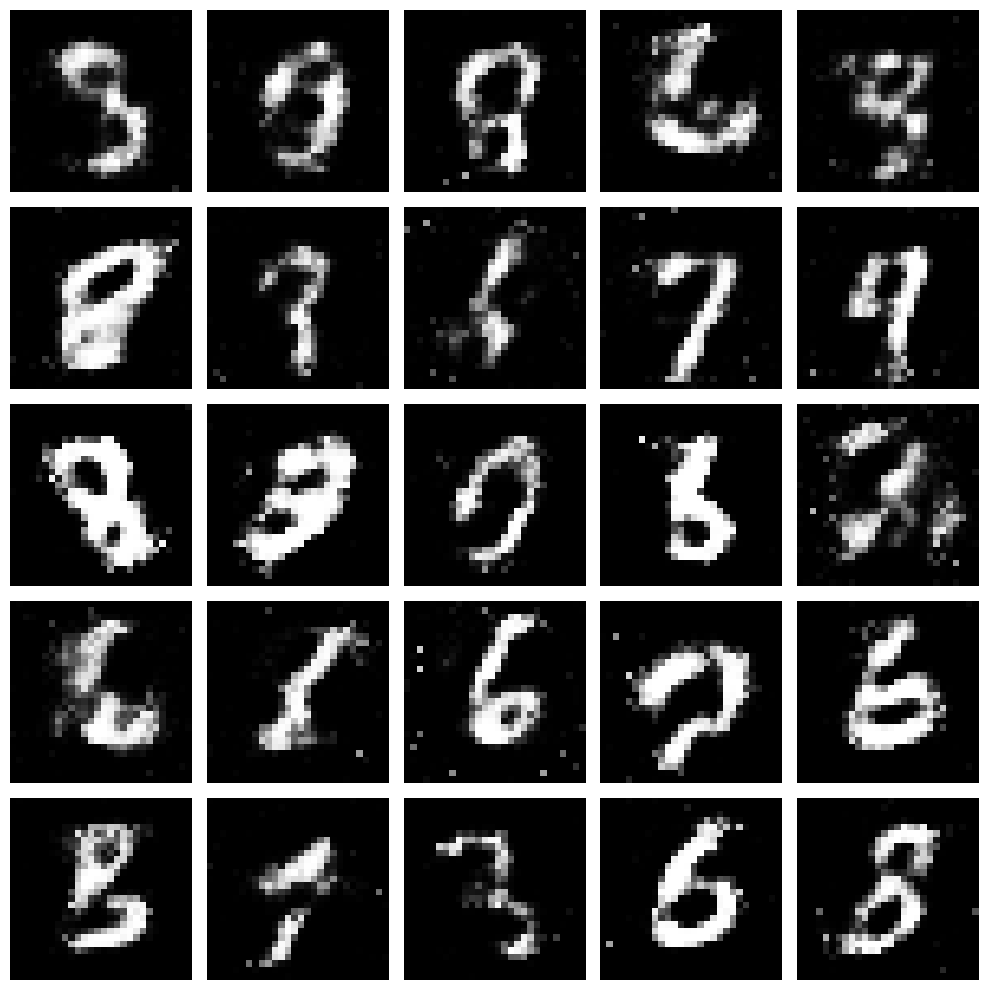

epoch: 86100, d_loss: 0.5053679943084717, g_loss: 1.468311071395874
epoch: 86200, d_loss: 0.5054776668548584, g_loss: 1.4679385423660278
epoch: 86300, d_loss: 0.505565881729126, g_loss: 1.4675898551940918
epoch: 86400, d_loss: 0.5056711435317993, g_loss: 1.4672141075134277
epoch: 86500, d_loss: 0.5057710409164429, g_loss: 1.4668458700180054
epoch: 86600, d_loss: 0.5058703422546387, g_loss: 1.466490626335144
epoch: 86700, d_loss: 0.5059607028961182, g_loss: 1.466145634651184
epoch: 86800, d_loss: 0.5060672163963318, g_loss: 1.4657704830169678
epoch: 86900, d_loss: 0.5061479806900024, g_loss: 1.4654345512390137
epoch: 87000, d_loss: 0.506257176399231, g_loss: 1.4650591611862183


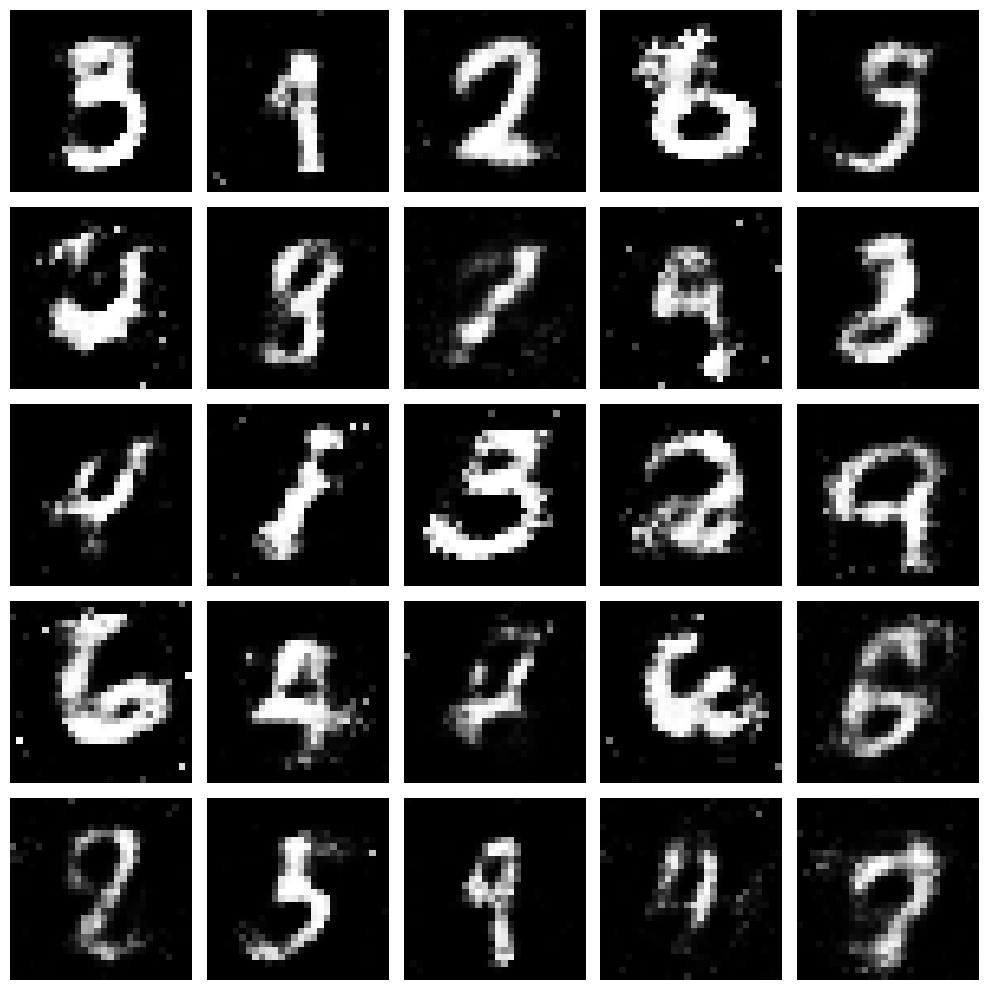

epoch: 87100, d_loss: 0.5063457489013672, g_loss: 1.4647117853164673
epoch: 87200, d_loss: 0.5064476728439331, g_loss: 1.4643527269363403
epoch: 87300, d_loss: 0.5065394639968872, g_loss: 1.4640156030654907
epoch: 87400, d_loss: 0.5066494941711426, g_loss: 1.4636573791503906
epoch: 87500, d_loss: 0.5067301988601685, g_loss: 1.4633162021636963
epoch: 87600, d_loss: 0.5068298578262329, g_loss: 1.4629480838775635
epoch: 87700, d_loss: 0.5069272518157959, g_loss: 1.4626007080078125
epoch: 87800, d_loss: 0.5070080757141113, g_loss: 1.4622900485992432
epoch: 87900, d_loss: 0.5071078538894653, g_loss: 1.461934208869934
epoch: 88000, d_loss: 0.5072005987167358, g_loss: 1.4615914821624756


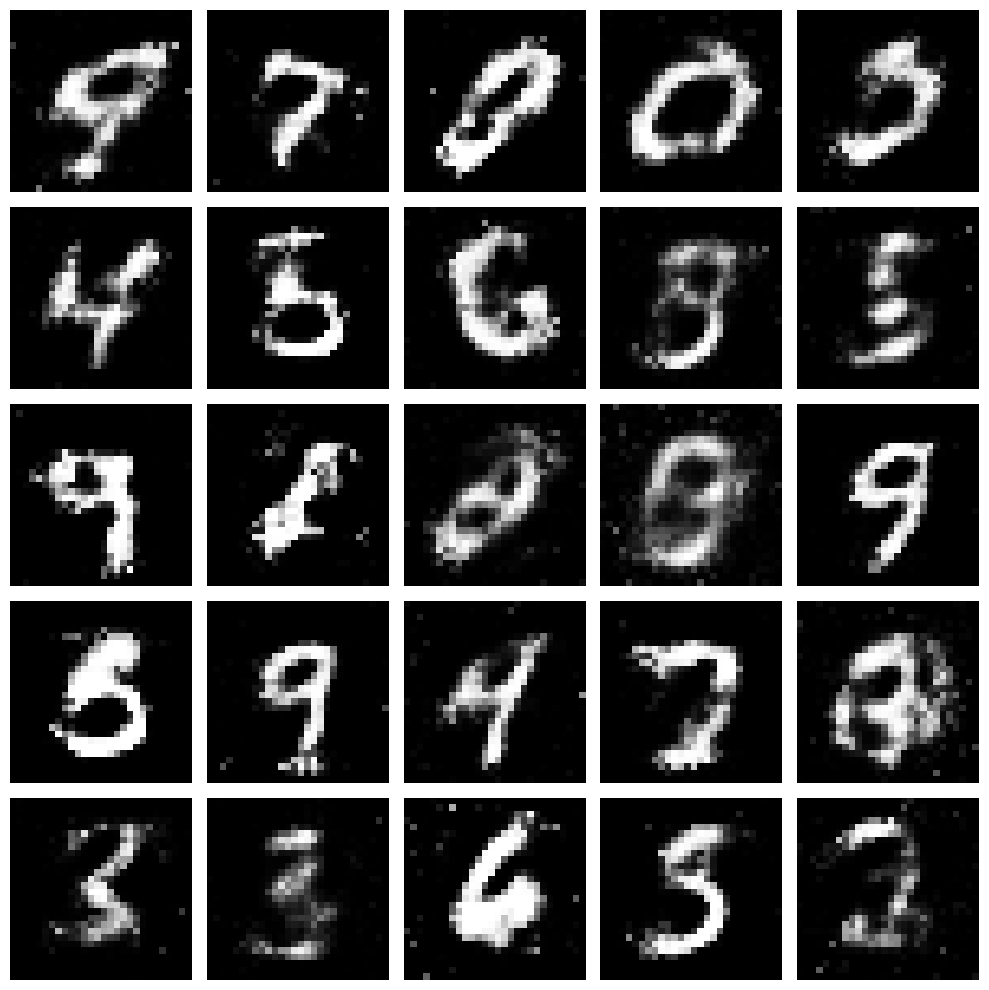

epoch: 88100, d_loss: 0.5072934031486511, g_loss: 1.4612534046173096
epoch: 88200, d_loss: 0.5073868632316589, g_loss: 1.4609042406082153
epoch: 88300, d_loss: 0.5074821710586548, g_loss: 1.4605542421340942
epoch: 88400, d_loss: 0.5075676441192627, g_loss: 1.460231065750122
epoch: 88500, d_loss: 0.5076608657836914, g_loss: 1.4598850011825562
epoch: 88600, d_loss: 0.5077536106109619, g_loss: 1.4595197439193726
epoch: 88700, d_loss: 0.507841944694519, g_loss: 1.4591748714447021
epoch: 88800, d_loss: 0.5079352855682373, g_loss: 1.4588475227355957
epoch: 88900, d_loss: 0.5080373287200928, g_loss: 1.4584918022155762
epoch: 89000, d_loss: 0.5081146359443665, g_loss: 1.4581494331359863


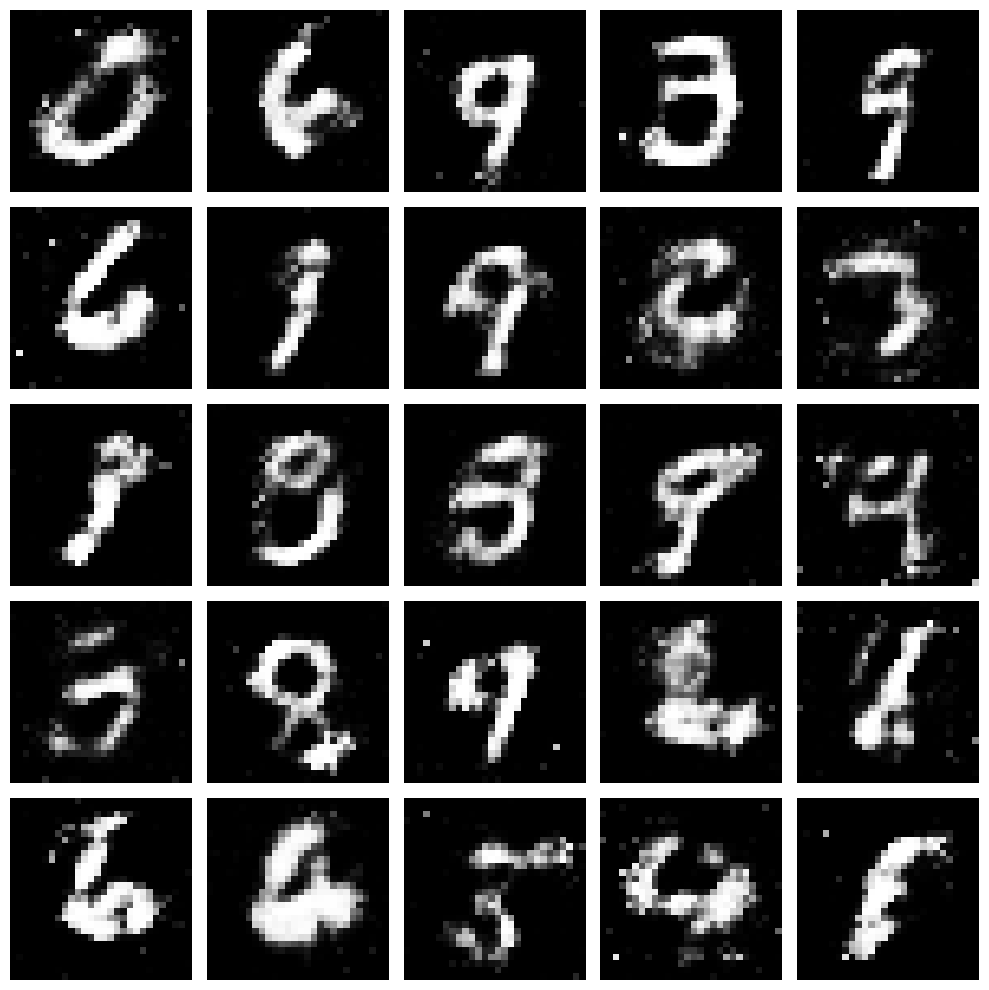

epoch: 89100, d_loss: 0.5082181692123413, g_loss: 1.4577908515930176
epoch: 89200, d_loss: 0.508295476436615, g_loss: 1.4574729204177856
epoch: 89300, d_loss: 0.5083936452865601, g_loss: 1.4571024179458618
epoch: 89400, d_loss: 0.5084993839263916, g_loss: 1.4567574262619019
epoch: 89500, d_loss: 0.5085767507553101, g_loss: 1.456433892250061
epoch: 89600, d_loss: 0.5086771249771118, g_loss: 1.4560707807540894
epoch: 89700, d_loss: 0.5087727904319763, g_loss: 1.4557315111160278
epoch: 89800, d_loss: 0.5088605880737305, g_loss: 1.4554160833358765
epoch: 89900, d_loss: 0.5089535117149353, g_loss: 1.455079197883606
epoch: 90000, d_loss: 0.5090506076812744, g_loss: 1.4547337293624878


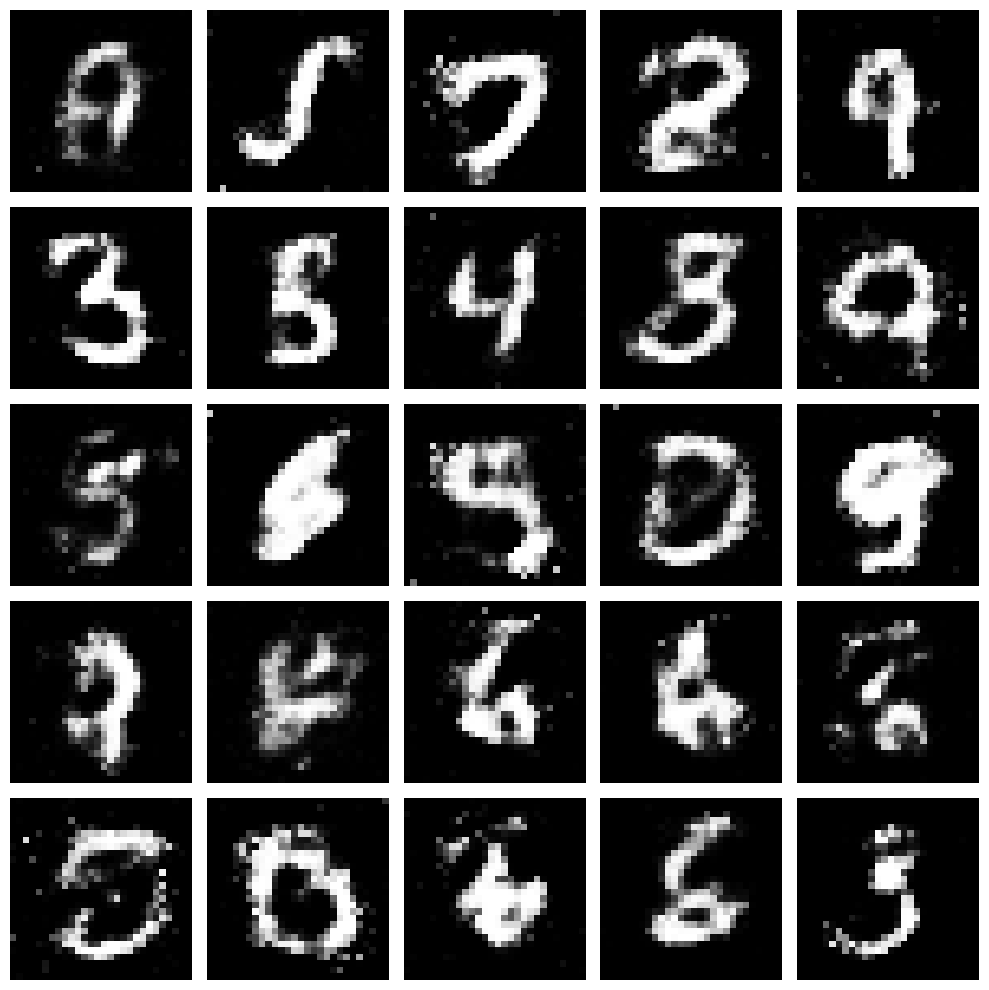

epoch: 90100, d_loss: 0.5091267824172974, g_loss: 1.454426884651184
epoch: 90200, d_loss: 0.5092279314994812, g_loss: 1.4540871381759644
epoch: 90300, d_loss: 0.5093066692352295, g_loss: 1.4537723064422607
epoch: 90400, d_loss: 0.5093988180160522, g_loss: 1.453434944152832
epoch: 90500, d_loss: 0.5094784498214722, g_loss: 1.4531126022338867
epoch: 90600, d_loss: 0.5095633864402771, g_loss: 1.4527899026870728
epoch: 90700, d_loss: 0.5096578598022461, g_loss: 1.4524558782577515
epoch: 90800, d_loss: 0.5097348690032959, g_loss: 1.4521538019180298
epoch: 90900, d_loss: 0.5098364353179932, g_loss: 1.4518224000930786
epoch: 91000, d_loss: 0.5099045038223267, g_loss: 1.4515235424041748


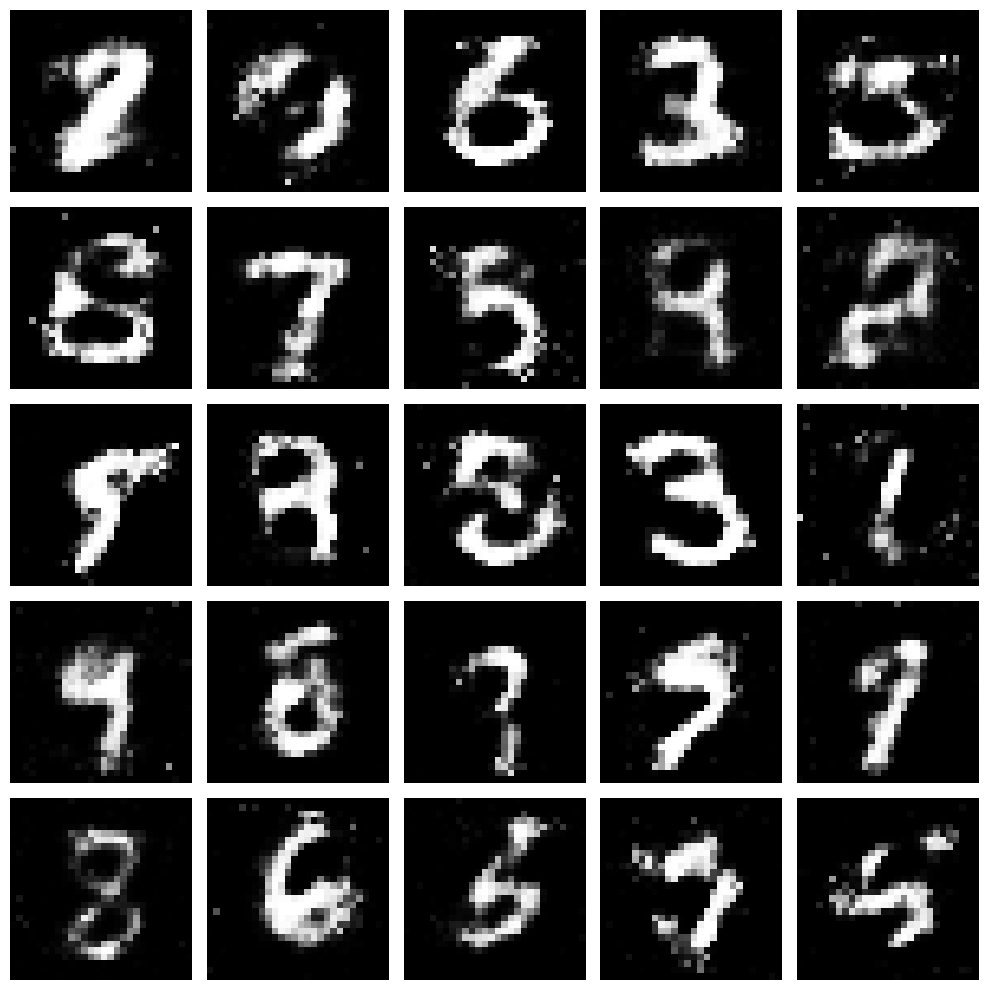

epoch: 91100, d_loss: 0.5100083351135254, g_loss: 1.4511849880218506
epoch: 91200, d_loss: 0.5100835561752319, g_loss: 1.4508825540542603
epoch: 91300, d_loss: 0.5101697444915771, g_loss: 1.450577974319458
epoch: 91400, d_loss: 0.5102524757385254, g_loss: 1.4502625465393066
epoch: 91500, d_loss: 0.5103389024734497, g_loss: 1.4499424695968628
epoch: 91600, d_loss: 0.5104069113731384, g_loss: 1.4496313333511353
epoch: 91700, d_loss: 0.5105023980140686, g_loss: 1.449310541152954
epoch: 91800, d_loss: 0.5105798244476318, g_loss: 1.4490042924880981
epoch: 91900, d_loss: 0.5106617212295532, g_loss: 1.4486818313598633
epoch: 92000, d_loss: 0.510757327079773, g_loss: 1.4483461380004883


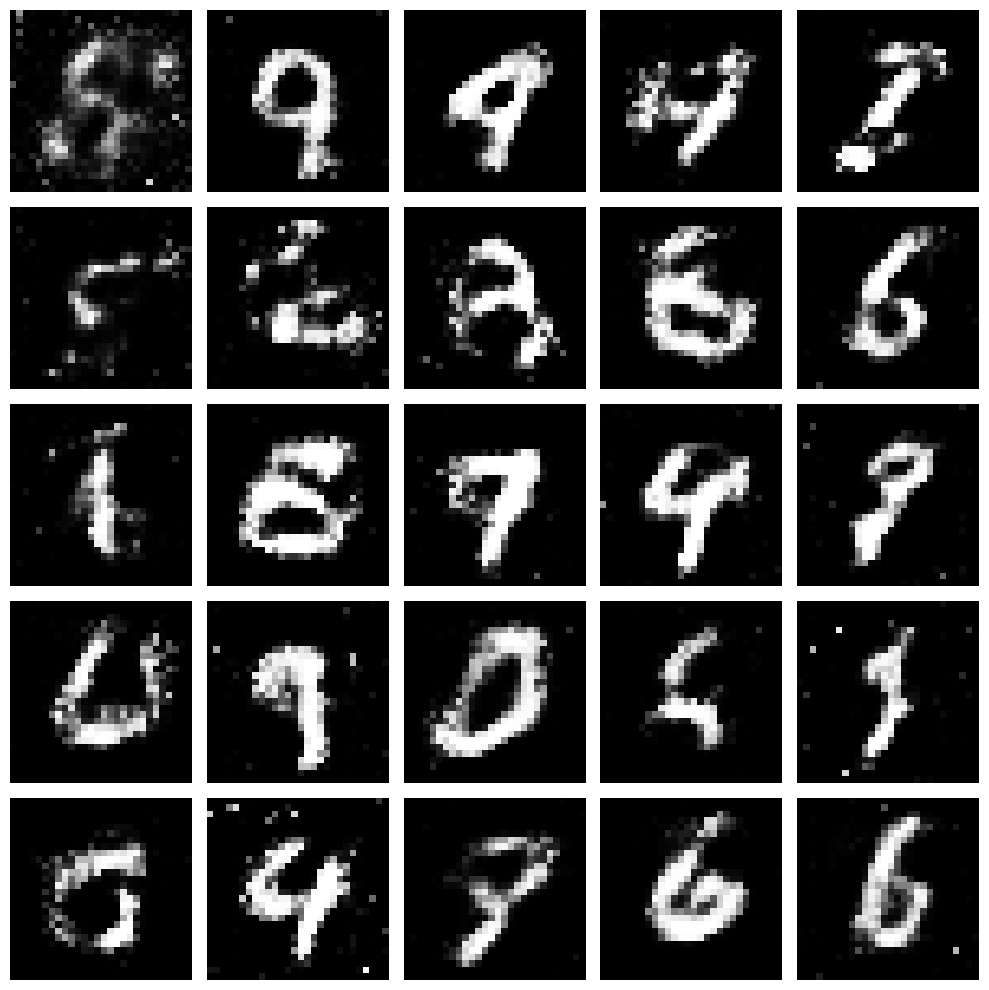

epoch: 92100, d_loss: 0.5108290910720825, g_loss: 1.4480547904968262
epoch: 92200, d_loss: 0.5109337568283081, g_loss: 1.4477142095565796
epoch: 92300, d_loss: 0.5110023021697998, g_loss: 1.4474271535873413
epoch: 92400, d_loss: 0.5111008882522583, g_loss: 1.4471083879470825
epoch: 92500, d_loss: 0.5111753940582275, g_loss: 1.4468040466308594
epoch: 92600, d_loss: 0.5112646818161011, g_loss: 1.4464712142944336
epoch: 92700, d_loss: 0.5113421678543091, g_loss: 1.4461606740951538
epoch: 92800, d_loss: 0.5114247798919678, g_loss: 1.4458694458007812
epoch: 92900, d_loss: 0.5115175247192383, g_loss: 1.4455540180206299
epoch: 93000, d_loss: 0.5115892291069031, g_loss: 1.4452565908432007


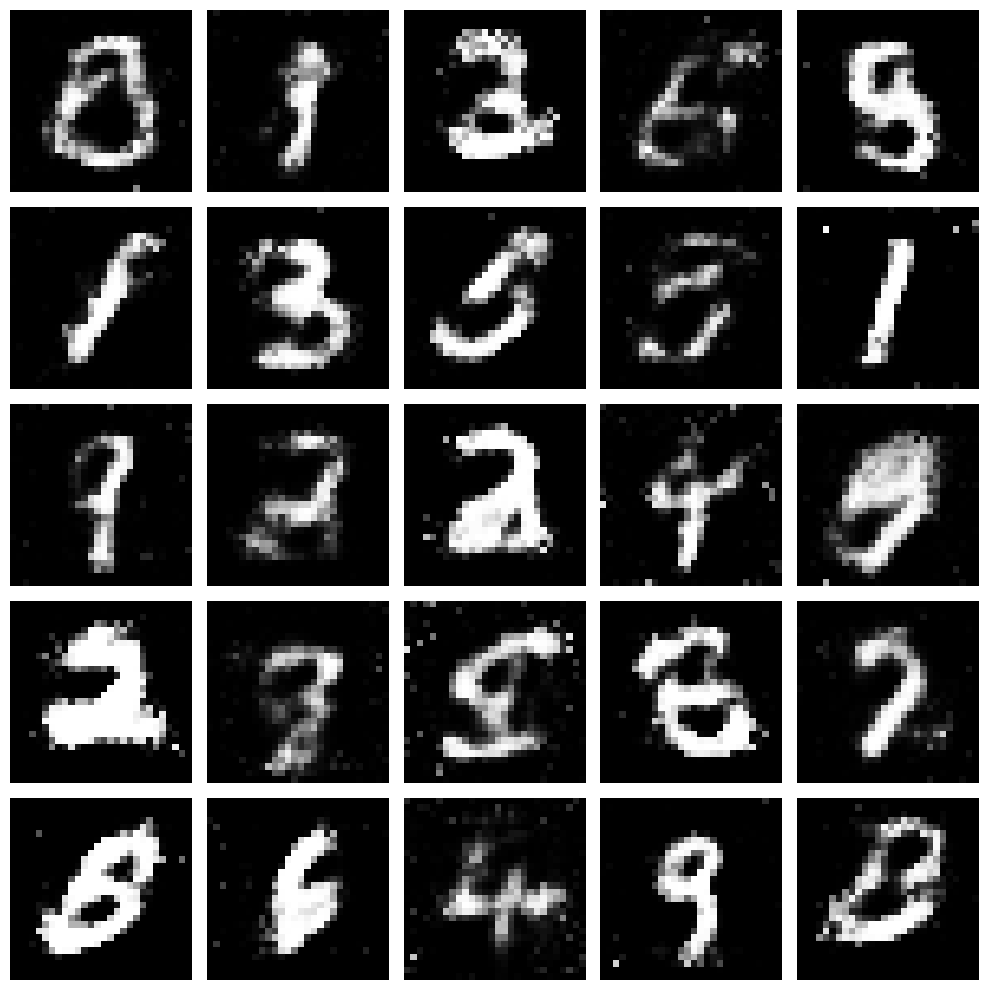

epoch: 93100, d_loss: 0.5116775035858154, g_loss: 1.444934368133545
epoch: 93200, d_loss: 0.5117571353912354, g_loss: 1.4446266889572144
epoch: 93300, d_loss: 0.5118356347084045, g_loss: 1.4443305730819702
epoch: 93400, d_loss: 0.5119142532348633, g_loss: 1.4440370798110962
epoch: 93500, d_loss: 0.5119978785514832, g_loss: 1.4437309503555298
epoch: 93600, d_loss: 0.5120686292648315, g_loss: 1.443453311920166
epoch: 93700, d_loss: 0.512161135673523, g_loss: 1.4431289434432983
epoch: 93800, d_loss: 0.5122344493865967, g_loss: 1.442838430404663
epoch: 93900, d_loss: 0.5123156309127808, g_loss: 1.4425411224365234
epoch: 94000, d_loss: 0.5123944282531738, g_loss: 1.442241907119751


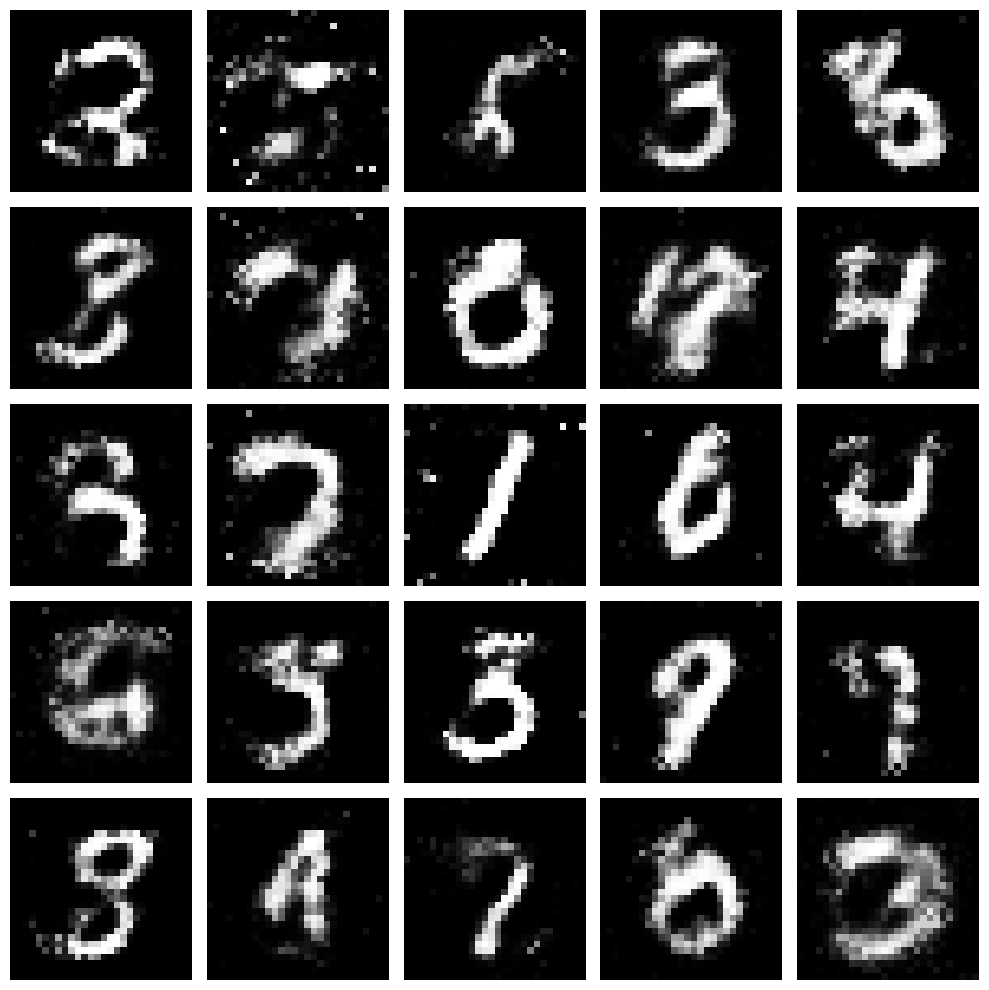

epoch: 94100, d_loss: 0.5124674439430237, g_loss: 1.4419493675231934
epoch: 94200, d_loss: 0.5125440359115601, g_loss: 1.4416519403457642
epoch: 94300, d_loss: 0.5126287341117859, g_loss: 1.4413492679595947
epoch: 94400, d_loss: 0.5127093195915222, g_loss: 1.4410696029663086
epoch: 94500, d_loss: 0.5127830505371094, g_loss: 1.4407633543014526
epoch: 94600, d_loss: 0.5128692388534546, g_loss: 1.440458059310913
epoch: 94700, d_loss: 0.5129475593566895, g_loss: 1.4401618242263794
epoch: 94800, d_loss: 0.5130190849304199, g_loss: 1.439870834350586
epoch: 94900, d_loss: 0.5131078958511353, g_loss: 1.439550518989563
epoch: 95000, d_loss: 0.5131744742393494, g_loss: 1.439274787902832


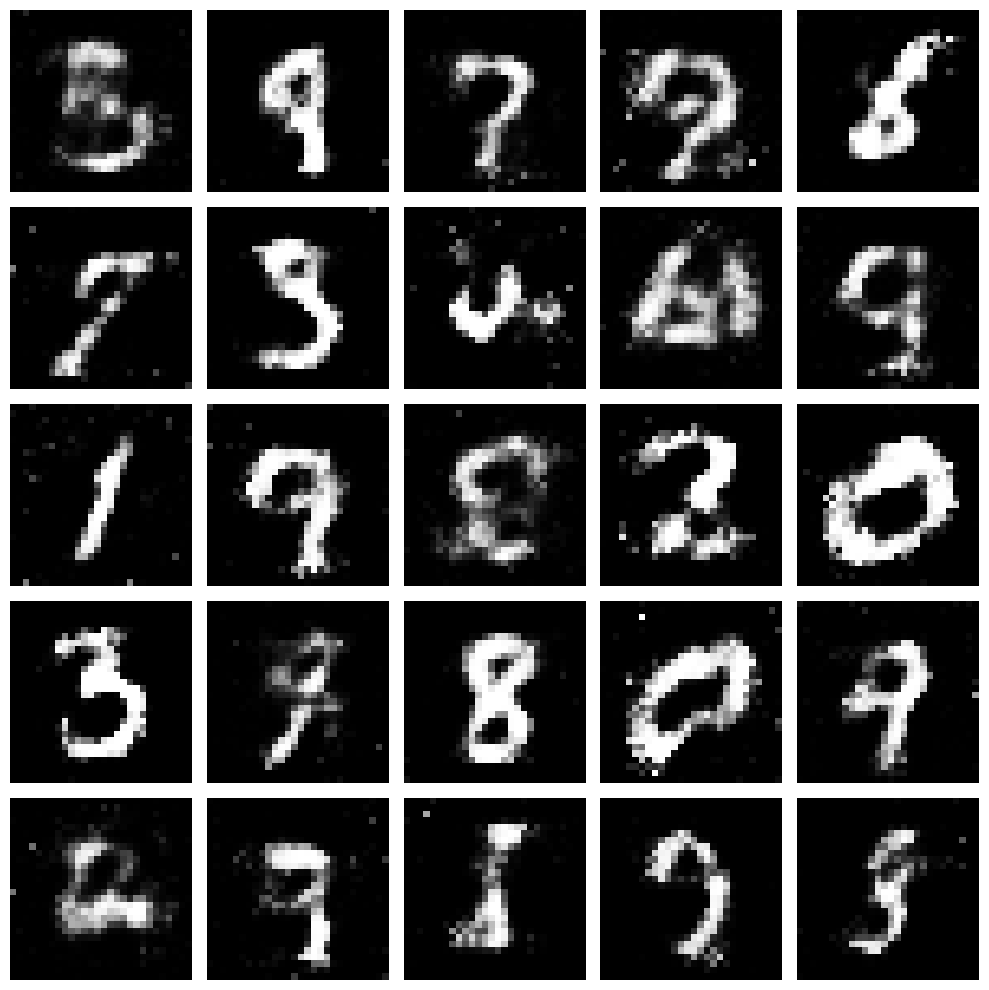

epoch: 95100, d_loss: 0.513253927230835, g_loss: 1.4389911890029907
epoch: 95200, d_loss: 0.5133366584777832, g_loss: 1.4387012720108032
epoch: 95300, d_loss: 0.513405442237854, g_loss: 1.4384238719940186
epoch: 95400, d_loss: 0.5134996175765991, g_loss: 1.4381048679351807
epoch: 95500, d_loss: 0.513563871383667, g_loss: 1.43782639503479
epoch: 95600, d_loss: 0.513643741607666, g_loss: 1.4375228881835938
epoch: 95700, d_loss: 0.5137181878089905, g_loss: 1.437233567237854
epoch: 95800, d_loss: 0.5137972831726074, g_loss: 1.4369409084320068
epoch: 95900, d_loss: 0.5138686895370483, g_loss: 1.436660885810852
epoch: 96000, d_loss: 0.5139521956443787, g_loss: 1.4363538026809692


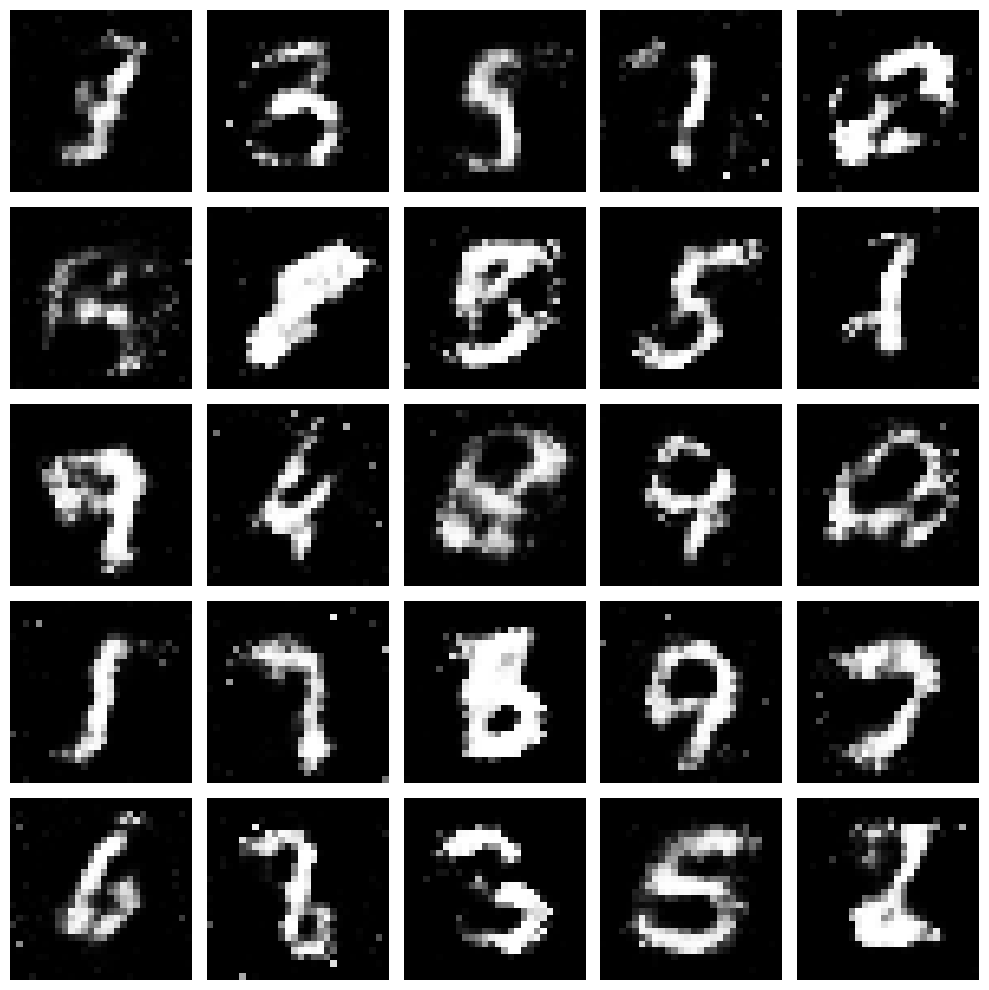

epoch: 96100, d_loss: 0.514011561870575, g_loss: 1.436071515083313
epoch: 96200, d_loss: 0.5140938758850098, g_loss: 1.4357571601867676
epoch: 96300, d_loss: 0.5141524076461792, g_loss: 1.4354827404022217
epoch: 96400, d_loss: 0.5142419338226318, g_loss: 1.4351564645767212
epoch: 96500, d_loss: 0.5143008232116699, g_loss: 1.4348899126052856
epoch: 96600, d_loss: 0.5143877267837524, g_loss: 1.434591293334961
epoch: 96700, d_loss: 0.5144519805908203, g_loss: 1.4343161582946777
epoch: 96800, d_loss: 0.5145294666290283, g_loss: 1.4340200424194336
epoch: 96900, d_loss: 0.5145915746688843, g_loss: 1.4337551593780518
epoch: 97000, d_loss: 0.5146690607070923, g_loss: 1.4334663152694702


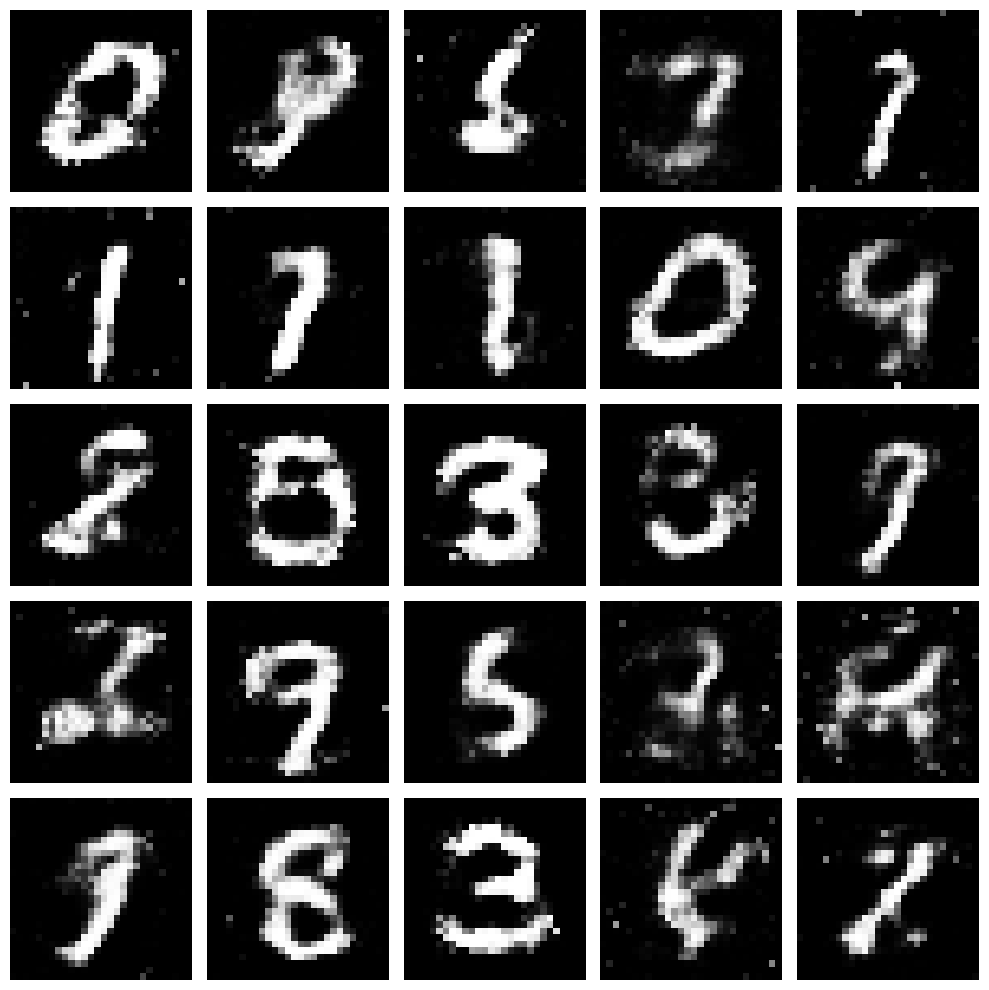

epoch: 97100, d_loss: 0.5147358179092407, g_loss: 1.433191180229187
epoch: 97200, d_loss: 0.514815092086792, g_loss: 1.4329040050506592
epoch: 97300, d_loss: 0.5148810148239136, g_loss: 1.4326403141021729
epoch: 97400, d_loss: 0.5149509310722351, g_loss: 1.4323574304580688
epoch: 97500, d_loss: 0.5150163173675537, g_loss: 1.432084560394287
epoch: 97600, d_loss: 0.5150907635688782, g_loss: 1.4318114519119263
epoch: 97700, d_loss: 0.5151543617248535, g_loss: 1.4315346479415894
epoch: 97800, d_loss: 0.515225887298584, g_loss: 1.431265950202942
epoch: 97900, d_loss: 0.5152934789657593, g_loss: 1.4309853315353394
epoch: 98000, d_loss: 0.5153665542602539, g_loss: 1.4307094812393188


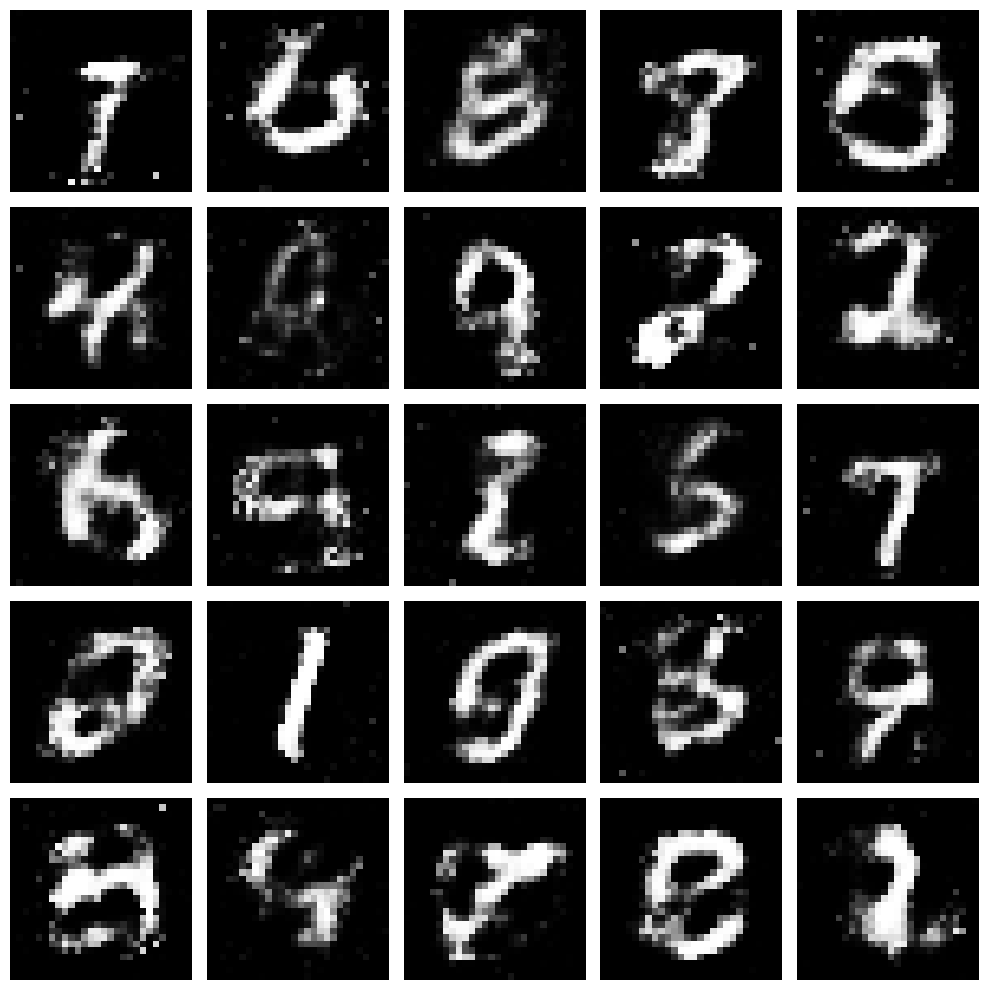

epoch: 98100, d_loss: 0.5154291391372681, g_loss: 1.4304518699645996
epoch: 98200, d_loss: 0.515495777130127, g_loss: 1.430187463760376
epoch: 98300, d_loss: 0.5155645608901978, g_loss: 1.4299111366271973
epoch: 98400, d_loss: 0.5156314373016357, g_loss: 1.4296455383300781
epoch: 98500, d_loss: 0.5157095193862915, g_loss: 1.4293724298477173
epoch: 98600, d_loss: 0.5157742500305176, g_loss: 1.4291155338287354
epoch: 98700, d_loss: 0.515846312046051, g_loss: 1.4288418292999268
epoch: 98800, d_loss: 0.5159206986427307, g_loss: 1.4285563230514526
epoch: 98900, d_loss: 0.5159876346588135, g_loss: 1.4282957315444946
epoch: 99000, d_loss: 0.5160558819770813, g_loss: 1.428023099899292


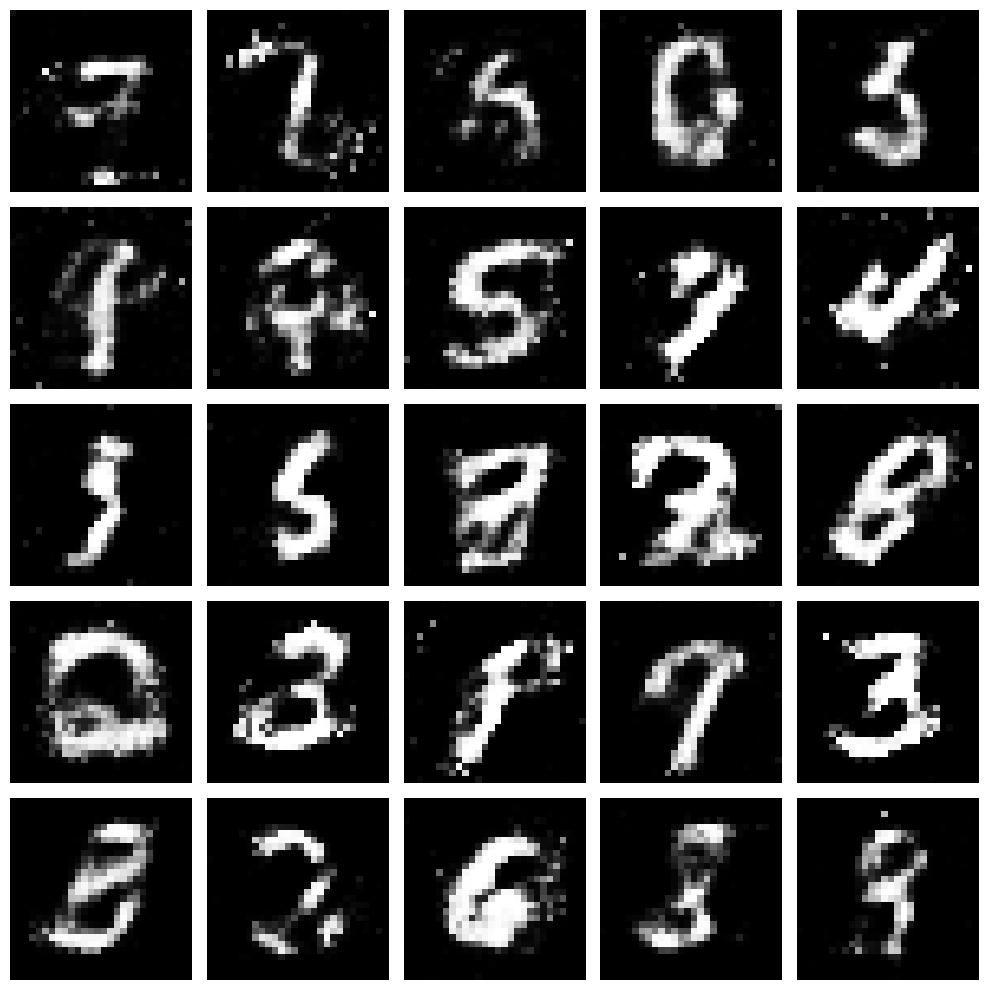

epoch: 99100, d_loss: 0.5161258578300476, g_loss: 1.4277492761611938
epoch: 99200, d_loss: 0.5161957740783691, g_loss: 1.4274749755859375
epoch: 99300, d_loss: 0.5162663459777832, g_loss: 1.4272092580795288
epoch: 99400, d_loss: 0.5163277387619019, g_loss: 1.4269421100616455
epoch: 99500, d_loss: 0.5163960456848145, g_loss: 1.4266769886016846
epoch: 99600, d_loss: 0.5164628624916077, g_loss: 1.426413893699646
epoch: 99700, d_loss: 0.5165207386016846, g_loss: 1.426159381866455
epoch: 99800, d_loss: 0.516592264175415, g_loss: 1.4258981943130493
epoch: 99900, d_loss: 0.5166467428207397, g_loss: 1.4256517887115479
epoch: 100000, d_loss: 0.5167147517204285, g_loss: 1.425392985343933


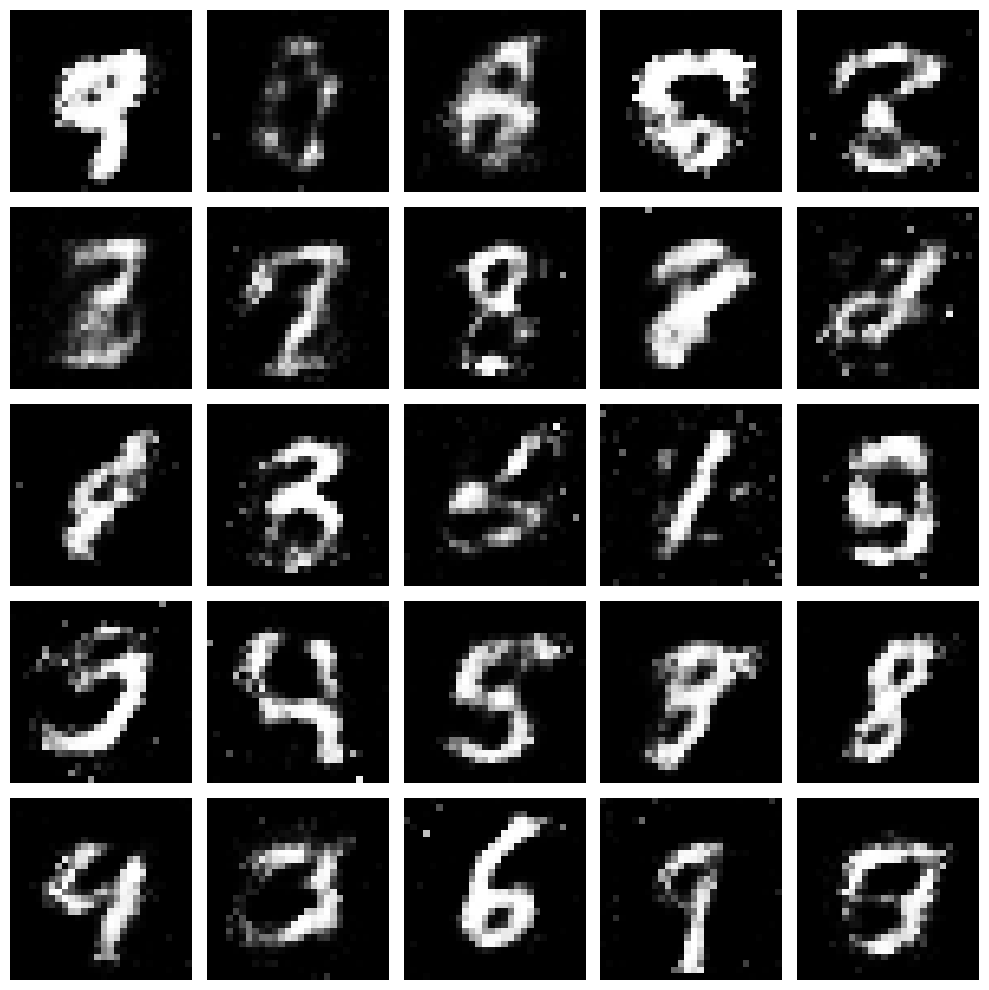

In [22]:
for epoch in range(1, epochs+1):
  # code for training the discriminator
  discriminator.trainable=True
  idx=np.random.randint(0,xtrain.shape[0],batch_size)
  real_imgs=xtrain[idx].reshape(-1,28,28)
  noise=np.random.normal(0,1,(batch_size,latent_dim))
  fake_imgs=generator.predict(noise, verbose=0)
  real_y=np.ones((batch_size,1)) # labelling real images
  fake_y=np.zeros((batch_size,1)) # labelling fake images
  d_loss_real=discriminator.train_on_batch(real_imgs,real_y) # loss value for real image
  d_loss_fake=discriminator.train_on_batch(fake_imgs,fake_y) # loss value for fake image
  d_loss=0.5*np.add(d_loss_real,d_loss_fake) # average of loss values
  discriminator.trainable=False
  # code for training the generator
  # we have to adjust the weights of generator acc. to the loss of discriminator
  noise=np.random.normal(0,1,(batch_size,latent_dim))
  valid_y=np.ones((batch_size,1)) # to bluff the discriminator, we will deliberately label this as real image
  g_loss=gan.train_on_batch(noise,valid_y)
  if epoch % 100 == 0:
    print(f"epoch: {epoch}, d_loss: {d_loss[0]}, g_loss: {g_loss}")
  if epoch % sample_interval == 0:
    r,c=5,5
    noise=np.random.normal(0,1,(r*c,latent_dim))
    gen_imgs=generator.predict(noise, verbose=0)
    gen_imgs=0.5*gen_imgs+0.5
    fig,axs=plt.subplots(r,c,figsize=(10,10))
    count=0
    for i in range(r):
      for j in range(c):
        axs[i,j].imshow(gen_imgs[count,:,:],cmap='gray')
        axs[i,j].axis('off')
        count+=1
    plt.tight_layout()
    plt.show()